# **Linear Models - Multiple Linear Regressions and Logistic Regression**

## _Machine Learning Modelling Workflow Notebook 1_

## Content:
1. Splitting the dataframe into train and test subsets;
2. Retrieving the list of classes used for training the classification models;
3. Ordinary Least Squares (OLS) Linear Regression;
4. Ridge Linear Regression;
5. Lasso Linear Regression;
6. Elastic Net Linear Regression;
7. Logistic Regression (binary classification);
8. Getting a general feature ranking;
9. Calculating metrics for regression models;
10. Calculating metrics for classification models;
11. Making predictions with the models;
12. Calculating probabilities associated to each class;
13. Performing the SHAP feature importance analysis;
14. Time series visualization.

Marco Cesar Prado Soares, Data Scientist Specialist - Bayer Crop Science LATAM
- marcosoares.feq@gmail.com
- marco.soares@bayer.com

Install statsmodels library

In [ ]:
! pip install statsmodels

Install tensorflow library

In [ ]:
! pip install tensorflow

Install Keras library

In [ ]:
! pip install keras

Install SHAP library

In [ ]:
! pip install shap

In [ ]:
#check the version of the package
! pip show shap

In [ ]:
# Upgrade to the most recent library versions, if a given module is not present and analysis cannot be
# executed.
! pip install pip --upgrade
! pip install tensorflow --upgrade
! pip install keras --upgrade
! pip install shap --upgrade
! pip install sklearn --upgrade
! pip install pandas --upgrade
! pip install numpy --upgrade
! pip install matplotlib --upgrade
! pip install seaborn --upgrade
! pip install scipy --upgrade
! pip install statsmodels --upgrade

## **Load Python Libraries in Global Context**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import tensorflow as tf
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from xgboost import XGBRegressor, XGBClassifier

# **Function for mounting Google Drive or S3 (AWS Simple Storage Service) bucket**

In [23]:
def mount_storage_system (source = 'aws', path_to_store_imported_s3_bucket = '', s3_bucket_name = None, s3_obj_prefix = None):
    
    # source = 'google' for mounting the google drive;
    # source = 'aws' for mounting an AWS S3 bucket.
    
    # THE FOLLOWING PARAMETERS HAVE EFFECT ONLY WHEN source == 'aws'
    
    # path_to_store_imported_s3_bucket: path of the Python environment to which the
    # S3 bucket contents will be imported. If it is None, or if 
    # path_to_store_imported_s3_bucket = '/', bucket will be imported to the root path. 
    # Alternatively, input the path as a string (in quotes). e.g. 
    # path_to_store_imported_s3_bucket = 'copied_s3_bucket'
    
    # s3_bucket_name = None.
    ## This parameter is obbligatory to access an AWS S3 bucket. Substitute it for a string
    # with the bucket's name. e.g. s3_bucket_name = "aws-bucket-1" access a bucket named as
    # "aws-bucket-1"
    
    # s3_obj_prefix = None. Keep it None or as an empty string (s3_obj_key_prefix = '')
    # to import the whole bucket content, instead of a single object from it.
    # Alternatively, set it as a string containing the subfolder from the bucket to import:
    # Suppose that your bucket (admin-created) has four objects with the following object 
    # keys: Development/Projects1.xls; Finance/statement1.pdf; Private/taxdocument.pdf; and
    # s3-dg.pdf. The s3-dg.pdf key does not have a prefix, so its object appears directly 
    # at the root level of the bucket. If you open the Development/ folder, you see 
    # the Projects.xlsx object in it.
    # Check Amazon documentation:
    # https://docs.aws.amazon.com/AmazonS3/latest/userguide/object-keys.html
    
    # In summary, if the path of the file is: 'bucket/my_path/.../file.csv'
    # where 'bucket' is the bucket's name, key_prefix = 'my_path/.../', without the
    # 'file.csv' (file name with extension) last part.
    
    # So, declare the prefix as S3_OBJECT_FOLDER_PREFIX to import only files from
    # a given folder (directory) of the bucket.
    # DO NOT PUT A SLASH before (to the right of) the prefix;
    # DO NOT ADD THE BUCKET'S NAME TO THE right of the prefix:
    # S3_OBJECT_FOLDER_PREFIX = "bucket_directory1/.../bucket_directoryN/"

    # Alternatively, provide the full path of a given file if you want to import only it:
    # S3_OBJECT_FOLDER_PREFIX = "bucket_directory1/.../bucket_directoryN/my_file.ext"
    # where my_file is the file's name, and ext is its extension.


    # Attention: after running this function for fetching AWS Simple Storage System (S3), 
    # your 'AWS Access key ID' and your 'Secret access key' will be requested.
    # The 'Secret access key' will be hidden through dots, so it cannot be visualized or copied by
    # other users. On the other hand, the same is not true for 'Access key ID', the bucket's name 
    # and the prefix. All of these are sensitive information from the organization.
    # Therefore, after importing the information, always remember of cleaning the output of this cell
    # and of removing such information from the strings.
    # Remember that these data may contain privilege for accessing the information, so it should not
    # be used for non-authorized people.

    # Also, remember of deleting the imported files from the workspace after finishing the analysis.
    # The costs for storing the files in S3 is quite inferior than those for storing directly in the
    # workspace. Also, files stored in S3 may be accessed for other users than those with access to
    # the notebook's workspace.
    
    
    if (source == 'google'):
        
        from google.colab import drive
        # Google Colab library must be imported only in case it is
        # going to be used, for avoiding AWS compatibility issues.
        
        print("Associate the Python environment to your Google Drive account, and authorize the access in the opened window.")
        
        drive.mount('/content/drive')
        
        print("Now your Python environment is connected to your Google Drive: the root directory of your environment is now the root of your Google Drive.")
        print("In Google Colab, navigate to the folder icon (\'Files\') of the left navigation menu to find a specific folder or file in your Google Drive.")
        print("Click on the folder or file name and select the elipsis (...) icon on the right of the name to reveal the option \'Copy path\', which will give you the path to use as input for loading objects and files on your Python environment.")
        print("Caution: save your files into different directories of the Google Drive. If files are all saved in a same folder or directory, like the root path, they may not be accessible from your Python environment.")
        print("If you still cannot see the file after moving it to a different folder, reload the environment.")
    
    elif (source == 'aws'):
        
        import os
        import boto3
        # boto3 is AWS S3 Python SDK
        # sagemaker and boto3 libraries must be imported only in case 
        # they are going to be used, for avoiding 
        # Google Colab compatibility issues.
        from getpass import getpass

        # Check if path_to_store_imported_s3_bucket is None. If it is, make it the root directory:
        if ((path_to_store_imported_s3_bucket is None)|(str(path_to_store_imported_s3_bucket) == "/")):
            
            # For the S3 buckets, the path should not start with slash. Assign the empty
            # string instead:
            path_to_store_imported_s3_bucket = ""
            print("Bucket\'s content will be copied to the notebook\'s root directory.")
        
        elif (str(path_to_store_imported_s3_bucket) == ""):
            # Guarantee that the path is the empty string.
            # Avoid accessing the else condition, what would raise an error
            # since the empty string has no character of index 0
            path_to_store_imported_s3_bucket = str(path_to_store_imported_s3_bucket)
            print("Bucket\'s content will be copied to the notebook\'s root directory.")
        
        else:
            # Use the str attribute to guarantee that the path was read as a string:
            path_to_store_imported_s3_bucket = str(path_to_store_imported_s3_bucket)
            
            if(path_to_store_imported_s3_bucket[0] == "/"):
                # the first character is the slash. Let's remove it

                # In AWS, neither the prefix nor the path to which the file will be imported
                # (file from S3 to workspace) or from which the file will be exported to S3
                # (the path in the notebook's workspace) may start with slash, or the operation
                # will not be concluded. Then, we have to remove this character if it is present.

                # The slash is character 0. Then, we want all characters from character 1 (the
                # second) to character len(str(path_to_store_imported_s3_bucket)) - 1, the index
                # of the last character. So, we can slice the string from position 1 to position
                # the slicing syntax is: string[1:] - all string characters from character 1
                # string[:10] - all string characters from character 10-1 = 9 (including 9); or
                # string[1:10] - characters from 1 to 9
                # So, slice the whole string, starting from character 1:
                path_to_store_imported_s3_bucket = path_to_store_imported_s3_bucket[1:]
                # attention: even though strings may be seem as list of characters, that can be
                # sliced, we cannot neither simply assign a character to a given position nor delete
                # a character from a position.

        # Ask the user to provide the credentials:
        ACCESS_KEY = input("Enter your AWS Access Key ID here (in the right). It is the value stored in the field \'Access key ID\' from your AWS user credentials CSV file.")
        print("\n") # line break
        SECRET_KEY = getpass("Enter your password (Secret key) here (in the right). It is the value stored in the field \'Secret access key\' from your AWS user credentials CSV file.")
        
        # The use of 'getpass' instead of 'input' hide the password behind dots.
        # So, the password is not visible by other users and cannot be copied.
        
        print("\n")
        print("WARNING: The bucket\'s name, the prefix, the AWS access key ID, and the AWS Secret access key are all sensitive information, which may grant access to protected information from the organization.\n")
        print("After copying data from S3 to your workspace, remember of removing these information from the notebook, specially if it is going to be shared. Also, remember of removing the files from the workspace.\n")
        print("The cost for storing files in Simple Storage Service is quite inferior than the one for storing directly in SageMaker workspace. Also, files stored in S3 may be accessed for other users than those with access the notebook\'s workspace.\n")

        # Check if the user actually provided the mandatory inputs, instead
        # of putting None or empty string:
        if ((ACCESS_KEY is None) | (ACCESS_KEY == '')):
            print("AWS Access Key ID is missing. It is the value stored in the field \'Access key ID\' from your AWS user credentials CSV file.")
            return "error"
        elif ((SECRET_KEY is None) | (SECRET_KEY == '')):
            print("AWS Secret Access Key is missing. It is the value stored in the field \'Secret access key\' from your AWS user credentials CSV file.")
            return "error"
        elif ((s3_bucket_name is None) | (s3_bucket_name == '')):
            print ("Please, enter a valid S3 Bucket\'s name. Do not add sub-directories or folders (prefixes), only the name of the bucket itself.")
            return "error"
        
        else:
            # Use the str attribute to guarantee that all AWS parameters were properly read as strings, and not as
            # other variables (like integers or floats):
            ACCESS_KEY = str(ACCESS_KEY)
            SECRET_KEY = str(SECRET_KEY)
            s3_bucket_name = str(s3_bucket_name)
        
        if(s3_bucket_name[0] == "/"):
                # the first character is the slash. Let's remove it

                # In AWS, neither the prefix nor the path to which the file will be imported
                # (file from S3 to workspace) or from which the file will be exported to S3
                # (the path in the notebook's workspace) may start with slash, or the operation
                # will not be concluded. Then, we have to remove this character if it is present.

                # So, slice the whole string, starting from character 1 (as did for 
                # path_to_store_imported_s3_bucket):
                s3_bucket_name = s3_bucket_name[1:]

        # Remove any possible trailing (white and tab spaces) spaces
        # That may be present in the string. Use the Python string
        # rstrip method, which is the equivalent to the Trim function:
        # When no arguments are provided, the whitespaces and tabulations
        # are the removed characters
        # https://www.w3schools.com/python/ref_string_rstrip.asp?msclkid=ee2d05c3c56811ecb1d2189d9f803f65
        s3_bucket_name = s3_bucket_name.rstrip()
        ACCESS_KEY = ACCESS_KEY.rstrip()
        SECRET_KEY = SECRET_KEY.rstrip()
        # Since the user manually inputs the parameters ACCESS and SECRET_KEY,
        # it is easy to input whitespaces without noticing that.

        # Now process the non-obbligatory parameter.
        # Check if a prefix was passed as input parameter. If so, we must select only the names that start with
        # The prefix.
        # Example: in the bucket 'my_bucket' we have a directory 'dir1'.
        # In the main (root) directory, we have a file 'file1.json' like: '/file1.json'
        # If we pass the prefix 'dir1', we want only the files that start as '/dir1/'
        # such as: 'dir1/file2.json', excluding the file in the main (root) directory and excluding the files in other
        # directories. Also, we want to eliminate the file names with no extensions, like 'dir1/' or 'dir1/dir2',
        # since these object names represent folders or directories, not files.	

        if (s3_obj_prefix is None):
            print ("No prefix, specific object, or subdirectory provided.") 
            print (f"Then, retrieving all content from the bucket \'{s3_bucket_name}\'.\n")
        elif ((s3_obj_prefix == "/") | (s3_obj_prefix == '')):
            # The root directory in the bucket must not be specified starting with the slash
            # If the root "/" or the empty string '' is provided, make
            # it equivalent to None (no directory)
            s3_obj_prefix = None
            print ("No prefix, specific object, or subdirectory provided.") 
            print (f"Then, retrieving all content from the bucket \'{s3_bucket_name}\'.\n")
    
        else:
            # Since there is a prefix, use the str attribute to guarantee that the path was read as a string:
            s3_obj_prefix = str(s3_obj_prefix)
            
            if(s3_obj_prefix[0] == "/"):
                # the first character is the slash. Let's remove it

                # In AWS, neither the prefix nor the path to which the file will be imported
                # (file from S3 to workspace) or from which the file will be exported to S3
                # (the path in the notebook's workspace) may start with slash, or the operation
                # will not be concluded. Then, we have to remove this character if it is present.

                # So, slice the whole string, starting from character 1 (as did for 
                # path_to_store_imported_s3_bucket):
                s3_obj_prefix = s3_obj_prefix[1:]

            # Remove any possible trailing (white and tab spaces) spaces
            # That may be present in the string. Use the Python string
            # rstrip method, which is the equivalent to the Trim function:
            s3_obj_prefix = s3_obj_prefix.rstrip()
            
            # Store the total characters in the prefix string after removing the initial slash
            # and trailing spaces:
            prefix_len = len(s3_obj_prefix)
            
            print("AWS Access Credentials, and bucket\'s prefix, object or subdirectory provided.\n")	

            
        print ("Starting connection with the S3 bucket.\n")
        
        try:
            # Start S3 client as the object 's3_client'
            s3_client = boto3.resource('s3', aws_access_key_id = ACCESS_KEY, aws_secret_access_key = SECRET_KEY)
        
            print(f"Credentials accepted by AWS. S3 client successfully started.\n")
            # An object 'data_table.xlsx' in the main (root) directory of the s3_bucket is stored in Python environment as:
            # s3.ObjectSummary(bucket_name='bucket_name', key='data_table.xlsx')
            # The name of each object is stored as the attribute 'key' of the object.
        
        except:
            
            print("Failed to connect to AWS Simple Storage Service (S3). Review if your credentials are correct.")
            print("The variable \'access_key\' must be set as the value (string) stored as \'Access key ID\' in your user security credentials CSV file.")
            print("The variable \'secret_key\' must be set as the value (string) stored as \'Secret access key\' in your user security credentials CSV file.")
        
        try:
            # Connect to the bucket specified as 'bucket_name'.
            # The bucket is started as the object 's3_bucket':
            s3_bucket = s3_client.Bucket(s3_bucket_name)
            print(f"Connection with bucket \'{s3_bucket_name}\' stablished.\n")
            
        except:
            
            print("Failed to connect with the bucket, which usually happens when declaring a wrong bucket\'s name.") 
            print("Check the spelling of your bucket_name string and remember that it must be all in lower-case.\n")
                

        # Then, let's obtain a list of all objects in the bucket (list bucket_objects):
        
        bucket_objects_list = []

        # Loop through all objects of the bucket:
        for stored_obj in s3_bucket.objects.all():
            
            # Loop through all elements 'stored_obj' from s3_bucket.objects.all()
            # Which stores the ObjectSummary for all objects in the bucket s3_bucket:
            # Let's store only the key attribute and use the str function
            # to guarantee that all values were stored as strings.
            bucket_objects_list.append(str(stored_obj.key))
        
        # Now start a support list to store only the elements from
        # bucket_objects_list that are not folders or directories
        # (objects with extensions).
        # If a prefix was provided, only files with that prefix should
        # be added:
        support_list = []
        
        for stored_obj in bucket_objects_list:
            
            # Loop through all elements 'stored_obj' from the list
            # bucket_objects_list

            # Check the file extension.
            file_extension = os.path.splitext(stored_obj)[1][1:]
            
            # The os.path.splitext method splits the string into its FIRST dot (".") to
            # separate the file extension from the full path. Example:
            # "C:/dir1/dir2/data_table.csv" is split into:
            # "C:/dir1/dir2/data_table" (root part) and '.csv' (extension part)
            # https://www.geeksforgeeks.org/python-os-path-splitext-method/?msclkid=2d56198fc5d311ec820530cfa4c6d574

            # os.path.splitext(stored_obj) is a tuple of strings: the first is the complete file
            # root with no extension; the second is the extension starting with a point: '.txt'
            # When we set os.path.splitext(stored_obj)[1], we are selecting the second element of
            # the tuple. By selecting os.path.splitext(stored_obj)[1][1:], we are taking this string
            # from the second character (index 1), eliminating the dot: 'txt'


            # Check if the file extension is not an empty string '' (i.e., that it is different from != the empty
            # string:
            if (file_extension != ''):
                    
                    # The extension is different from the empty string, so it is not neither a folder nor a directory
                    # The object is actually a file and may be copied if it satisfies the prefix condition. If there
                    # is no prefix to check, we may simply copy the object to the list.

                    # If there is a prefix, the first characters of the stored_obj must be the prefix:
                    if not (s3_obj_prefix is None):
                        
                        # Check the characters from the position 0 (1st character) to the position
                        # prefix_len - 1. Since a prefix was declared, we want only the objects that this first portion
                        # corresponds to the prefix. string[i:j] slices the string from index i to index j-1
                        # Then, the 1st portion of the string to check is: string[0:(prefix_len)]

                        # Slice the string stored_obj from position 0 (1st character) to position prefix_len - 1,
                        # The position that the prefix should end.
                        obj_name_first_part = (stored_obj)[0:(prefix_len)]
                        
                        # If this first part is the prefix, then append the object to 
                        # support list:
                        if (obj_name_first_part == (s3_obj_prefix)):

                                support_list.append(stored_obj)

                    else:
                        # There is no prefix, so we can simply append the object to the list:
                        support_list.append(stored_obj)

            
        # Make the objects list the support list itself:
        bucket_objects_list = support_list
            
        # Now, bucket_objects_list contains the names of all objects from the bucket that must be copied.

        print("Finished mapping objects to fetch. Now, all these objects from S3 bucket will be copied to the notebook\'s workspace, in the specified directory.\n")
        print(f"A total of {len(bucket_objects_list)} files were found in the specified bucket\'s prefix (\'{s3_obj_prefix}\').")
        print(f"The first file found is \'{bucket_objects_list[0]}\'; whereas the last file found is \'{bucket_objects_list[len(bucket_objects_list) - 1]}\'.")
            
        # Now, let's try copying the files:
            
        try:
            
            # Loop through all objects in the list bucket_objects and copy them to the workspace:
            for copied_object in bucket_objects_list:

                # Select the object in the bucket previously started as 's3_bucket':
                selected_object = s3_bucket.Object(copied_object)
            
                # Now, copy this object to the workspace:
                # Set the new file_path. Notice that by now, copied_object may be a string like:
                # 'dir1/.../dirN/file_name.ext', where dirN is the n-th directory and ext is the file extension.
                # We want only the file_name to joing with the path to store the imported bucket. So, we can use the
                # str.split method specifying the separator sep = '/' to break the string into a list of substrings.
                # The last element from this list will be 'file_name.ext'
                # https://www.w3schools.com/python/ref_string_split.asp?msclkid=135399b6c63111ecada75d7d91add056

                # 1. Break the copied_object full path into the list object_path_list, using the .split method:
                object_path_list = copied_object.split(sep = "/")

                # 2. Get the last element from this list. Since it has length len(object_path_list) and indexing starts from
                # zero, the index of the last element is (len(object_path_list) - 1):
                fetched_object = object_path_list[(len(object_path_list) - 1)]

                # 3. Finally, join the string fetched_object with the new path (path on the notebook's workspace) to finish
                # The new object's file_path:

                file_path = os.path.join(path_to_store_imported_s3_bucket, fetched_object)

                # Download the selected object to the workspace in the specified file_path
                # The parameter Filename must be input with the path of the copied file, including its name and
                # extension. Example Filename = "/my_table.xlsx" copies a xlsx file named 'my_table' to the notebook's main (root)
                # directory
                selected_object.download_file(Filename = file_path)

                print(f"The file \'{fetched_object}\' was successfully copied to notebook\'s workspace.\n")

                
            print("Finished copying the files from the bucket to the notebook\'s workspace. It may take a couple of minutes untill they be shown in SageMaker environment.\n") 
            print("Do not forget to delete these copies after finishing the analysis. They will remain stored in the bucket.\n")


        except:

            # Run this code for any other exception that may happen (no exception error
            # specified, so any exception runs the following code).
            # Check: https://pythonbasics.org/try-except/?msclkid=4f6b4540c5d011ecb1fe8a4566f632a6
            # for seeing how to handle successive exceptions

            print("Attention! The function raised an exception error, which is probably due to the AWS Simple Storage Service (S3) permissions.")
            print("Before running again this function, check this quick guide for configuring the permission roles in AWS.\n")
            print("It is necessary to create an user with full access permissions to interact with S3 from SageMaker. To configure the User, go to the upper ribbon of AWS, click on Services, and select IAM – Identity and Access Management.")
            print("1. In IAM\'s lateral panel, search for \'Users\' in the group of Access Management.")
            print("2. Click on the \'Add users\' button.")
            print("3. Set an user name in the text box \'User name\'.")
            print("Attention: users and S3 buckets cannot be written in upper case. Also, selecting a name already used by an Amazon user or bucket will raise an error message.\n")
            print("4. In the field \'Select type of Access to AWS\'-\'Select type of AWS credentials\' select the option \'Access key - Programmatic access\'. After that, click on the button \'Next: Permissions\'.")
            print("5. In the field \'Set Permissions\', keep the \'Add user to a group\' button marked.")
            print("6. In the field \'Add user to a group\', click on \'Create group\' (alternatively, you can be added to a group already configured or copy the permissions of another user.")
            print("7. In the text box \'Group\'s name\', set a name for the new group of permissions.")
            print("8. In the search bar below (\'Filter politics\'), search for a politics that fill your needs, and check the option button on the left of this politic. The politics \'AmazonS3FullAccess\' grants full access to the S3 content.")
            print("9. Finally, click on \'Create a group\'.")
            print("10. After the group is created, it will appear with a check box marked, over the previous groups. Keep it marked and click on the button \'Next: Tags\'.")
            print("11. Create and note down the Access key ID and Secret access key. You can also download a comma separated values (CSV) file containing the credentials for future use.")
            print("ATTENTION: These parameters are required for accessing the bucket\'s content from any application, including AWS SageMaker.")
            print("12. Click on \'Next: Review\' and review the user credentials information and permissions.")
            print("13. Click on \'Create user\' and click on the download button to download the CSV file containing the user credentials information.")
            print("The headers of the CSV file (the stored fields) is: \'User name, Password, Access key ID, Secret access key, Console login link\'.")
            print("You need both the values indicated as \'Access key ID\' and as \'Secret access key\' to fetch the S3 bucket.")
            print("\n") # line break
            print("After acquiring the necessary user privileges, use the boto3 library to fetch the bucket from the Python code. boto3 is AWS S3 Python SDK.")
            print("For fetching a specific bucket\'s file use the following code:\n")
            print("1. Set a variable \'access_key\' as the value (string) stored as \'Access key ID\' in your user security credentials CSV file.")
            print("2. Set a variable \'secret_key\' as the value (string) stored as \'Secret access key\' in your user security credentials CSV file.")
            print("3. Set a variable \'bucket_name\' as a string containing only the name of the bucket. Do not add subdirectories, folders (prefixes), or file names.")
            print("Example: if your bucket is named \'my_bucket\' and its main directory contains folders like \'folder1\', \'folder2\', etc, do not declare bucket_name = \'my_bucket/folder1\', even if you only want files from folder1.")
            print("ALWAYS declare only the bucket\'s name: bucket_name = \'my_bucket\'.")
            print("4. Set a variable \'file_path\' containing the path from the bucket\'s subdirectories to the file you want to fetch. Include the file name and its extension.")
            print("If the file is stored in the bucket\'s root (main) directory: file_path = \"my_file.ext\".")
            print("If the path of the file in the bucket is: \'dir1/…/dirN/my_file.ext\', where dirN is the N-th subdirectory, and dir1 is a folder or directory of the main (root) bucket\'s directory: file_path = \"dir1/…/dirN/my_file.ext\".")
            print("Also, we say that \'dir1/…/dirN/\' is the file\'s prefix. Notice that the name of the bucket is never declared here as the path for fetching its content from the Python code.")
            print("5. Set a variable named \'new_path\' to store the path of the file copied to the notebook’s workspace. This path must contain the file name and its extension.")
            print("Example: if you want to copy \'my_file.ext\' to the root directory of the notebook’s workspace, set: new_path = \"/my_file.ext\".")
            print("6. Finally, declare the following code, which refers to the defined variables:\n")

            # Let's use triple quotes to declare a formated string
            example_code = """
                import boto3
                # Start S3 client as the object 's3_client'
                s3_client = boto3.resource('s3', aws_access_key_id = access_key, aws_secret_access_key = secret_key)
                # Connect to the bucket specified as 'bucket_name'.
                # The bucket is started as the object 's3_bucket':
                s3_bucket = s3_client.Bucket(bucket_name)
                # Select the object in the bucket previously started as 's3_bucket':
                selected_object = s3_bucket.Object(file_path)
                # Download the selected object to the workspace in the specified file_path
                # The parameter Filename must be input with the path of the copied file, including its name and
                # extension. Example Filename = "/my_table.xlsx" copies a xlsx file named 'my_table' to the notebook's main (root)
                # directory
                selected_object.download_file(Filename = new_path)
                """

            print(example_code)

            print("An object \'my_file.ext\' in the main (root) directory of the s3_bucket is stored in Python environment as:")
            print("""s3.ObjectSummary(bucket_name='bucket_name', key='my_file.ext'""") 
            # triple quotes to keep the internal quotes without using too much backslashes "\" (the ignore next character)
            print("Then, the name of each object is stored as the attribute \'key\' of the object. To view all objects, we can loop through their \'key\' attributes:\n")
            example_code = """
                # Loop through all objects of the bucket:
                for stored_obj in s3_bucket.objects.all():		
                    # Loop through all elements 'stored_obj' from s3_bucket.objects.all()
                    # Which stores the ObjectSummary for all objects in the bucket s3_bucket:
                    # Print the object’s names:
                    print(stored_obj.key)
                    """

            print(example_code)

                
    else:
        
        print("Select a valid source: \'google\' for mounting Google Drive; or \'aws\' for accessing AWS S3 Bucket.")

# **Function for loading the dataframe**

In [ ]:
def load_pandas_dataframe (file_directory_path, file_name_with_extension, load_txt_file_with_json_format = False, how_missing_values_are_registered = None, has_header = True, decimal_separator = '.', txt_csv_col_sep = "comma", sheet_to_load = None, json_record_path = None, json_field_separator = "_", json_metadata_prefix_list = None):
    
    # Pandas documentation:
    # pd.read_csv: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
    # pd.read_excel: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html
    # pd.json_normalize: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.json_normalize.html
    # Python JSON documentation:
    # https://docs.python.org/3/library/json.html
    
    import os
    import json
    import numpy as np
    import pandas as pd
    from pandas import json_normalize
    
    ## WARNING: Use this function to load dataframes stored on Excel (xls, xlsx, xlsm, xlsb, odf, ods and odt), 
    ## JSON, txt, or CSV (comma separated values) files.
    
    # file_directory_path - (string, in quotes): input the path of the directory (e.g. folder path) 
    # where the file is stored. e.g. file_directory_path = "/" or file_directory_path = "/folder"
    
    # FILE_NAME_WITH_EXTENSION - (string, in quotes): input the name of the file with the 
    # extension. e.g. FILE_NAME_WITH_EXTENSION = "file.xlsx", or, 
    # FILE_NAME_WITH_EXTENSION = "file.csv", "file.txt", or "file.json"
    # Again, the extensions may be: xls, xlsx, xlsm, xlsb, odf, ods, odt, json, txt or csv.
    
    # load_txt_file_with_json_format = False. Set load_txt_file_with_json_format = True 
    # if you want to read a file with txt extension containing a text formatted as JSON 
    # (but not saved as JSON).
    # WARNING: if load_txt_file_with_json_format = True, all the JSON file parameters of the 
    # function (below) must be set. If not, an error message will be raised.
    
    # HOW_MISSING_VALUES_ARE_REGISTERED = None: keep it None if missing values are registered as None,
    # empty or np.nan. Pandas automatically converts None to NumPy np.nan objects (floats).
    # This parameter manipulates the argument na_values (default: None) from Pandas functions.
    # By default the following values are interpreted as NaN: ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, 
    #‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘<NA>’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, 
    # ‘n/a’, ‘nan’, ‘null’.

    # If a different denomination is used, indicate it as a string. e.g.
    # HOW_MISSING_VALUES_ARE_REGISTERED = '.' will convert all strings '.' to missing values;
    # HOW_MISSING_VALUES_ARE_REGISTERED = 0 will convert zeros to missing values.

    # If dict passed, specific per-column NA values. For example, if zero is the missing value
    # only in column 'numeric_col', you can specify the following dictionary:
    # how_missing_values_are_registered = {'numeric-col': 0}
    
    
    # has_header = True if the the imported table has headers (row with columns names).
    # Alternatively, has_header = False if the dataframe does not have header.
    
    # DECIMAL_SEPARATOR = '.' - String. Keep it '.' or None to use the period ('.') as
    # the decimal separator. Alternatively, specify here the separator.
    # e.g. DECIMAL_SEPARATOR = ',' will set the comma as the separator.
    # It manipulates the argument 'decimal' from Pandas functions.
    
    # txt_csv_col_sep = "comma" - This parameter has effect only when the file is a 'txt'
    # or 'csv'. It informs how the different columns are separated.
    # Alternatively, txt_csv_col_sep = "comma", or txt_csv_col_sep = "," 
    # for columns separated by comma;
    # txt_csv_col_sep = "whitespace", or txt_csv_col_sep = " " 
    # for columns separated by simple spaces.
    # You can also set a specific separator as string. For example:
    # txt_csv_col_sep = '\s+'; or txt_csv_col_sep = '\t' (in this last example, the tabulation
    # is used as separator for the columns - '\t' represents the tab character).
    
    # sheet_to_load - This parameter has effect only when for Excel files.
    # keep sheet_to_load = None not to specify a sheet of the file, so that the first sheet
    # will be loaded.
    # sheet_to_load may be an integer or an string (inside quotes). sheet_to_load = 0
    # loads the first sheet (sheet with index 0); sheet_to_load = 1 loads the second sheet
    # of the file (index 1); sheet_to_load = "Sheet1" loads a sheet named as "Sheet1".
    # Declare a number to load the sheet with that index, starting from 0; or declare a
    # name to load the sheet with that name.
    
    ## Parameters for loading JSON files:
    
    # json_record_path (string): manipulate parameter 'record_path' from json_normalize method.
    # Path in each object to list of records. If not passed, data will be assumed to 
    # be an array of records. If a given field from the JSON stores a nested JSON (or a nested
    # dictionary) declare it here to decompose the content of the nested data. e.g. if the field
    # 'books' stores a nested JSON, declare, json_record_path = 'books'
    
    # json_field_separator = "_" (string). Manipulates the parameter 'sep' from json_normalize method.
    # Nested records will generate names separated by sep. 
    # e.g., for json_field_separator = ".", {‘foo’: {‘bar’: 0}} -> foo.bar.
    # Then, if a given field 'main_field' stores a nested JSON with fields 'field1', 'field2', ...
    # the name of the columns of the dataframe will be formed by concatenating 'main_field', the
    # separator, and the names of the nested fields: 'main_field_field1', 'main_field_field2',...
    
    # json_metadata_prefix_list: list of strings (in quotes). Manipulates the parameter 
    # 'meta' from json_normalize method. Fields to use as metadata for each record in resulting 
    # table. Declare here the non-nested fields, i.e., the fields in the principal JSON. They
    # will be repeated in the rows of the dataframe to give the metadata (context) of the rows.
    
    # e.g. Suppose a JSON with the following structure: {'name': 'Mary', 'last': 'Shelley',
    # 'books': [{'title': 'Frankestein', 'year': 1818}, {'title': 'Mathilda ', 'year': 1819},{'title': 'The Last Man', 'year': 1826}]},
    # Here, there are nested JSONs in the field 'books'. The fields that are not nested
    # are 'name' and 'last'.
    # Then, json_record_path = 'books'
    # json_metadata_prefix_list = ['name', 'last']
    
    
    # Create the complete file path:
    file_path = os.path.join(file_directory_path, file_name_with_extension)
    # Extract the file extension
    file_extension = os.path.splitext(file_path)[1][1:]
    # os.path.splitext(file_path) is a tuple of strings: the first is the complete file
    # root with no extension; the second is the extension starting with a point: '.txt'
    # When we set os.path.splitext(file_path)[1], we are selecting the second element of
    # the tuple. By selecting os.path.splitext(file_path)[1][1:], we are taking this string
    # from the second character (index 1), eliminating the dot: 'txt'
    
    # Check if the decimal separator is None. If it is, set it as '.' (period):
    if (decimal_separator is None):
        decimal_separator = '.'
    
    if ((file_extension == 'txt') | (file_extension == 'csv')): 
        # The operator & is equivalent to 'And' (intersection).
        # The operator | is equivalent to 'Or' (union).
        # pandas.read_csv method must be used.
        if (load_txt_file_with_json_format == True):
            
            print("Reading a txt file containing JSON parsed data. A reading error will be raised if you did not set the JSON parameters.")
            
            with open(file_path, 'r') as opened_file:
                # 'r' stands for read mode; 'w' stands for write mode
                # read the whole file as a string named 'file_full_text'
                file_full_text = opened_file.read()
                # if we used the readlines() method, we would be reading the
                # file by line, not the whole text at once.
                # https://stackoverflow.com/questions/8369219/how-to-read-a-text-file-into-a-string-variable-and-strip-newlines?msclkid=a772c37bbfe811ec9a314e3629df4e1e
                # https://www.tutorialkart.com/python/python-read-file-as-string/#:~:text=example.py%20%E2%80%93%20Python%20Program.%20%23open%20text%20file%20in,and%20prints%20it%20to%20the%20standard%20output.%20Output.?msclkid=a7723a1abfe811ecb68bba01a2b85bd8
                
            #Now, file_full_text is a string containing the full content of the txt file.
            json_file = json.loads(file_full_text)
            # json.load() : This method is used to parse JSON from URL or file.
            # json.loads(): This method is used to parse string with JSON content.
            # e.g. .json.loads() must be used to read a string with JSON and convert it to a flat file
            # like a dataframe.
            # check: https://www.pythonpip.com/python-tutorials/how-to-load-json-file-using-python/#:~:text=The%20json.load%20%28%29%20is%20used%20to%20read%20the,and%20alter%20data%20in%20our%20application%20or%20system.
            dataset = json_normalize(json_file, record_path = json_record_path, sep = json_field_separator, meta = json_metadata_prefix_list)
        
        else:
            # Not a JSON txt
        
            if (has_header == True):

                if ((txt_csv_col_sep == "comma") | (txt_csv_col_sep == ",")):

                    dataset = pd.read_csv(file_path, na_values = how_missing_values_are_registered, verbose = True, parse_dates = True, infer_datetime_format = True, decimal = decimal_separator)
                    # verbose = True for showing number of NA values placed in non-numeric columns.
                    #  parse_dates = True: try parsing the index; infer_datetime_format = True : If True and parse_dates is enabled, pandas will attempt to infer the format of the datetime strings in 
                    # the columns, and if it can be inferred, switch to a faster method of parsing them. In some cases this can increase the 
                    # parsing speed by 5-10x.

                elif ((txt_csv_col_sep == "whitespace") | (txt_csv_col_sep == " ")):

                    dataset = pd.read_csv(file_path, delim_whitespace = True, na_values = how_missing_values_are_registered, verbose = True, parse_dates = True, infer_datetime_format = True, decimal = decimal_separator)
                    # verbose = True for showing number of NA values placed in non-numeric columns.
                    #  parse_dates = True: try parsing the index; infer_datetime_format = True : If True and parse_dates is enabled, pandas will attempt to infer the format of the datetime strings in 
                    # the columns, and if it can be inferred, switch to a faster method of parsing them. In some cases this can increase the 
                    # parsing speed by 5-10x.
                    
                else:
                    
                    try:
                        
                        # Try using the character specified as the argument txt_csv_col_sep:
                        dataset = pd.read_csv(file_path, sep = txt_csv_col_sep, na_values = how_missing_values_are_registered, verbose = True, parse_dates = True, infer_datetime_format = True, decimal = decimal_separator)
                        # verbose = True for showing number of NA values placed in non-numeric columns.
                        #  parse_dates = True: try parsing the index; infer_datetime_format = True : If True and parse_dates is enabled, pandas will attempt to infer the format of the datetime strings in 
                        # the columns, and if it can be inferred, switch to a faster method of parsing them. In some cases this can increase the 
                        # parsing speed by 5-10x.
                    
                    except:
                        # An error was raised, the separator is not valid
                        print(f"Enter a valid column separator for the {file_extension} file, like: \'comma\' or \'whitespace\'.")


            else:
                # has_header == False

                if ((txt_csv_col_sep == "comma") | (txt_csv_col_sep == ",")):

                    dataset = pd.read_csv(file_path, header = None, na_values = how_missing_values_are_registered, verbose = True, parse_dates = True, infer_datetime_format = True, decimal = decimal_separator)
                    # verbose = True for showing number of NA values placed in non-numeric columns.
                    #  parse_dates = True: try parsing the index; infer_datetime_format = True : If True and parse_dates is enabled, pandas will attempt to infer the format of the datetime strings in 
                    # the columns, and if it can be inferred, switch to a faster method of parsing them. In some cases this can increase the 
                    # parsing speed by 5-10x.
                    
                elif ((txt_csv_col_sep == "whitespace") | (txt_csv_col_sep == " ")):

                    dataset = pd.read_csv(file_path, delim_whitespace = True, header = None, na_values = how_missing_values_are_registered, verbose = True, parse_dates = True, infer_datetime_format = True, decimal = decimal_separator)
                    # verbose = True for showing number of NA values placed in non-numeric columns.
                    #  parse_dates = True: try parsing the index; infer_datetime_format = True : If True and parse_dates is enabled, pandas will attempt to infer the format of the datetime strings in 
                    # the columns, and if it can be inferred, switch to a faster method of parsing them. In some cases this can increase the 
                    # parsing speed by 5-10x.
                    
                else:
                    
                    try:
                        
                        # Try using the character specified as the argument txt_csv_col_sep:
                        dataset = pd.read_csv(file_path, sep = txt_csv_col_sep, header = None, na_values = how_missing_values_are_registered, verbose = True, parse_dates = True, infer_datetime_format = True, decimal = decimal_separator)
                        # verbose = True for showing number of NA values placed in non-numeric columns.
                        #  parse_dates = True: try parsing the index; infer_datetime_format = True : If True and parse_dates is enabled, pandas will attempt to infer the format of the datetime strings in 
                        # the columns, and if it can be inferred, switch to a faster method of parsing them. In some cases this can increase the 
                        # parsing speed by 5-10x.
                    
                    except:
                        # An error was raised, the separator is not valid
                        print(f"Enter a valid column separator for the {file_extension} file, like: \'comma\' or \'whitespace\'.")

    elif (file_extension == 'json'):
        
        with open(file_path, 'r') as opened_file:
            
            json_file = json.load(opened_file)
            # The structure json_file = json.load(open(file_path)) relies on the GC to close the file. That's not a 
            # good idea: If someone doesn't use CPython the garbage collector might not be using refcounting (which 
            # collects unreferenced objects immediately) but e.g. collect garbage only after some time.
            # Since file handles are closed when the associated object is garbage collected or closed 
            # explicitly (.close() or .__exit__() from a context manager) the file will remain open until 
            # the GC kicks in.
            # Using 'with' ensures the file is closed as soon as the block is left - even if an exception 
            # happens inside that block, so it should always be preferred for any real application.
            # source: https://stackoverflow.com/questions/39447362/equivalent-ways-to-json-load-a-file-in-python
            
        # json.load() : This method is used to parse JSON from URL or file.
        # json.loads(): This method is used to parse string with JSON content.
        # Then, json.load for a .json file
        # and json.loads for text file containing json
        # check: https://www.pythonpip.com/python-tutorials/how-to-load-json-file-using-python/#:~:text=The%20json.load%20%28%29%20is%20used%20to%20read%20the,and%20alter%20data%20in%20our%20application%20or%20system.   
        dataset = json_normalize(json_file, record_path = json_record_path, sep = json_field_separator, meta = json_metadata_prefix_list)
    
    else:
        # If it is not neither a csv nor a txt file, let's assume it is one of different
        # possible Excel files.
        print("Excel file inferred. If an error message is shown, check if a valid file extension was used: \'xlsx\', \'xls\', etc.")
            
        if (sheet_to_load is not None):        
        #Case where the user specifies which sheet of the Excel file should be loaded.
            
            if (has_header == True):
                
                dataset = pd.read_excel(file_path, sheet_name = sheet_to_load, na_values = how_missing_values_are_registered, verbose = True, parse_dates = True, infer_datetime_format = True, decimal = decimal_separator)
                # verbose = True for showing number of NA values placed in non-numeric columns.
                #  parse_dates = True: try parsing the index; infer_datetime_format = True : If True and parse_dates is enabled, pandas will attempt to infer the format of the datetime strings in 
                # the columns, and if it can be inferred, switch to a faster method of parsing them. In some cases this can increase the 
                # parsing speed by 5-10x.
                
            else:
                #No header
                dataset = pd.read_excel(file_path, sheet_name = sheet_to_load, header = None, na_values = how_missing_values_are_registered, verbose = True, parse_dates = True, infer_datetime_format = True, decimal = decimal_separator)
                # verbose = True for showing number of NA values placed in non-numeric columns.
                #  parse_dates = True: try parsing the index; infer_datetime_format = True : If True and parse_dates is enabled, pandas will attempt to infer the format of the datetime strings in 
                # the columns, and if it can be inferred, switch to a faster method of parsing them. In some cases this can increase the 
                # parsing speed by 5-10x.
        else:
            #No sheet specified
            if (has_header == True):
                
                dataset = pd.read_excel(file_path, na_values = how_missing_values_are_registered, verbose = True, parse_dates = True, infer_datetime_format = True, decimal = decimal_separator)
                # verbose = True for showing number of NA values placed in non-numeric columns.
                #  parse_dates = True: try parsing the index; infer_datetime_format = True : If True and parse_dates is enabled, pandas will attempt to infer the format of the datetime strings in 
                # the columns, and if it can be inferred, switch to a faster method of parsing them. In some cases this can increase the 
                # parsing speed by 5-10x.
                
            else:
                #No header
                dataset = pd.read_excel(file_path, header = None, na_values = how_missing_values_are_registered, verbose = True, parse_dates = True, infer_datetime_format = True, decimal = decimal_separator)
                # verbose = True for showing number of NA values placed in non-numeric columns.
                #  parse_dates = True: try parsing the index; infer_datetime_format = True : If True and parse_dates is enabled, pandas will attempt to infer the format of the datetime strings in 
                # the columns, and if it can be inferred, switch to a faster method of parsing them. In some cases this can increase the 
                # parsing speed by 5-10x.
                
    print(f"Dataset extracted from {file_path}. Check the 10 first rows of this dataframe:\n")
    print(dataset.head(10))
    
    return dataset

# **Function for converting JSON object to dataframe**
- Objects may be:
    - String with JSON formatted text;
    - List with nested dictionaries (JSON formatted);
    - Each dictionary may contain nested dictionaries, or nested lists of dictionaries (nested JSON).

In [ ]:
def json_obj_to_pandas_dataframe (json_obj_to_convert, json_obj_type = 'list', json_record_path = None, json_field_separator = "_", json_metadata_prefix_list = None):
    
    import json
    import pandas as pd
    from pandas import json_normalize
    
    # JSON object in terms of Python structure: list of dictionaries, where each value of a
    # dictionary may be a dictionary or a list of dictionaries (nested structures).
    # example of highly nested structure saved as a list 'json_formatted_list'. Note that the same
    # structure could be declared and stored into a string variable. For instance, if you have a txt
    # file containing JSON, you could read the txt and save its content as a string.
    # json_formatted_list = [{'field1': val1, 'field2': {'dict_val': dict_val}, 'field3': [{
    # 'nest1': nest_val1}, {'nest2': nestval2}]}, {'field1': val1, 'field2': {'dict_val': dict_val}, 
    # 'field3': [{'nest1': nest_val1}, {'nest2': nestval2}]}]    

    # json_obj_type = 'list', in case the object was saved as a list of dictionaries (JSON format)
    # json_obj_type = 'string', in case it was saved as a string (text) containing JSON.

    # json_obj_to_convert: object containing JSON, or string with JSON content to parse.
    # Objects may be: string with JSON formatted text;
    # list with nested dictionaries (JSON formatted);
    # dictionaries, possibly with nested dictionaries (JSON formatted).
    
    # https://docs.python.org/3/library/json.html
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.json_normalize.html#pandas.json_normalize
    
    # json_record_path (string): manipulate parameter 'record_path' from json_normalize method.
    # Path in each object to list of records. If not passed, data will be assumed to 
    # be an array of records. If a given field from the JSON stores a nested JSON (or a nested
    # dictionary) declare it here to decompose the content of the nested data. e.g. if the field
    # 'books' stores a nested JSON, declare, json_record_path = 'books'
    
    # json_field_separator = "_" (string). Manipulates the parameter 'sep' from json_normalize method.
    # Nested records will generate names separated by sep. 
    # e.g., for json_field_separator = ".", {‘foo’: {‘bar’: 0}} -> foo.bar.
    # Then, if a given field 'main_field' stores a nested JSON with fields 'field1', 'field2', ...
    # the name of the columns of the dataframe will be formed by concatenating 'main_field', the
    # separator, and the names of the nested fields: 'main_field_field1', 'main_field_field2',...
    
    # json_metadata_prefix_list: list of strings (in quotes). Manipulates the parameter 
    # 'meta' from json_normalize method. Fields to use as metadata for each record in resulting 
    # table. Declare here the non-nested fields, i.e., the fields in the principal JSON. They
    # will be repeated in the rows of the dataframe to give the metadata (context) of the rows.
    
    # e.g. Suppose a JSON with the following structure: {'name': 'Mary', 'last': 'Shelley',
    # 'books': [{'title': 'Frankestein', 'year': 1818}, {'title': 'Mathilda ', 'year': 1819},{'title': 'The Last Man', 'year': 1826}]},
    # Here, there are nested JSONs in the field 'books'. The fields that are not nested
    # are 'name' and 'last'.
    # Then, json_record_path = 'books'
    # json_metadata_prefix_list = ['name', 'last']

    
    if (json_obj_type == 'string'):
        # Use the json.loads method to convert the string to json
        json_file = json.loads(json_obj_to_convert)
        # json.load() : This method is used to parse JSON from URL or file.
        # json.loads(): This method is used to parse string with JSON content.
        # e.g. .json.loads() must be used to read a string with JSON and convert it to a flat file
        # like a dataframe.
        # check: https://www.pythonpip.com/python-tutorials/how-to-load-json-file-using-python/#:~:text=The%20json.load%20%28%29%20is%20used%20to%20read%20the,and%20alter%20data%20in%20our%20application%20or%20system.
    
    elif (json_obj_type == 'list'):
        
        # make the json_file the object itself:
        json_file = json_obj_to_convert
    
    else:
        print ("Enter a valid JSON object type: \'list\', in case the JSON object is a list of dictionaries in JSON format; or \'string\', if the JSON is stored as a text (string variable).")
        return "error"
    
    dataset = json_normalize(json_file, record_path = json_record_path, sep = json_field_separator, meta = json_metadata_prefix_list)
    
    print(f"JSON object {json_obj_to_convert} converted to a flat dataframe object. Check the 10 first rows of this dataframe:\n")
    print(dataset.head(10))
    
    return dataset

# **Function for concatenating (SQL UNION) multiple dataframes**
- Vertical concatenation of the dataframes.
- Equivalent to SQL Union: vertical stack/append of the tables.

In [50]:
def UNION_DATAFRAMES (list_of_dataframes, what_to_append = 'rows', ignore_index_on_union = True, sort_values_on_union = True, union_join_type = None):
    
    import pandas as pd
    #JOIN can be 'inner' to perform an inner join, eliminating the missing values
    #The default (None) is 'outer': the dataframes will be stacked on the columns with
    #same names but, in case there is no correspondence, the row will present a missing
    #value for the columns which are not present in one of the dataframes.
    #When using the 'inner' method, only the common columns will remain
    
    #list_of_dataframes must be a list containing the dataframe objects
    # example: list_of_dataframes = [df1, df2, df3, df4]
    #Notice that the dataframes are objects, not strings. Therefore, they should not
    # be declared inside quotes.
    # There is no limit of dataframes. In this example, we will concatenate 4 dataframes.
    # If list_of_dataframes = [df1, df2, df3] we would concatenate 3, and if
    # list_of_dataframes = [df1, df2, df3, df4, df5] we would concatenate 5 dataframes.
    
    # what_to_append = 'rows' for appending the rows from one dataframe
    # into the other; what_to_append = 'columns' for appending the columns
    # from one dataframe into the other (horizontal or lateral append).
    
    # When what_to_append = 'rows', Pandas .concat method is defined as
    # axis = 0, i.e., the operation occurs in the row level, so the rows
    # of the second dataframe are added to the bottom of the first one.
    # It is the SQL union, and creates a dataframe with more rows, and
    # total of columns equals to the total of columns of the first dataframe
    # plus the columns of the second one that were not in the first dataframe.
    # When what_to_append = 'columns', Pandas .concat method is defined as
    # axis = 1, i.e., the operation occurs in the column level: the two
    # dataframes are laterally merged using the index as the key, 
    # preserving all columns from both dataframes. Therefore, the number of
    # rows will be the total of rows of the dataframe with more entries,
    # and the total of columns will be the sum of the total of columns of
    # the first dataframe with the total of columns of the second dataframe.
    
    #The other parameters are the same from Pandas .concat method.
    # ignore_index_on_union = ignore_index;
    # sort_values_on_union = sort
    # union_join_type = join
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
    
    #Check Datacamp course Joining Data with pandas, Chap.3, 
    # Advanced Merging and Concatenating
    
    # Check axis:
    if (what_to_append == 'rows'):
        
        AXIS = 0
    
    elif (what_to_append == 'columns'):
        
        AXIS = 1
    
    else:
        print("No valid string was input to what_to_append, so appending rows (vertical append, equivalent to SQL UNION).")
        AXIS = 0
    
    if (union_join_type == 'inner'):
        
        print("Warning: concatenating dataframes using the \'inner\' join method, that removes missing values.")
        concat_df = pd.concat(list_of_dataframes, axis = AXIS, ignore_index = ignore_index_on_union, sort = sort_values_on_union, join = union_join_type)
    
    else:
        
        #In case None or an invalid value is provided, use the default 'outer', by simply
        # not declaring the 'join':
        concat_df = pd.concat(list_of_dataframes, axis = AXIS, ignore_index = ignore_index_on_union, sort = sort_values_on_union)
    
    # Pandas .head(Y) method results in a dataframe containing the first Y rows of the 
    # original dataframe. The default .head() is Y = 5. Print first 10 rows of the 
    # new dataframe:
    print("Dataframes successfully concatenated. Check the 10 first rows of new dataframe:\n")
    print(concat_df.head(10))
    
    #Now return the concatenated dataframe:
    
    return concat_df

# **Function for column filtering (selecting); or column renaming**

In [ ]:
def col_filter_rename (df, cols_list, mode = 'filter'):
    
    import pandas as pd
    
    #mode = 'filter' for filtering only the list of columns passed as cols_list;
    #mode = 'rename' for renaming the columns with the names passed as cols_list.
    
    #cols_list = list of strings containing the names (headers) of the columns to select
    # (filter); or to be set as the new columns' names, according to the selected mode.
    # For instance: cols_list = ['col1', 'col2', 'col3'] will 
    # select columns 'col1', 'col2', and 'col3' (or rename the columns with these names). 
    # Declare the names inside quotes.
    
    print(f"Original columns in the dataframe:\n{df.columns}")
    
    if (mode == 'filter'):
        
        #filter the dataframe so that it will contain only the cols_list.
        df = df[cols_list]
        print("Dataframe filtered according to the list provided.")
        
    elif (mode == 'rename'):
        
        #Check if the number of columns of the dataset is equal to the number of elements
        # of the new list. It will avoid raising an exception error.
        boolean_filter = (len(cols_list) == len(df.columns))
        
        if (boolean_filter == False):
            #Impossible to rename, number of elements are different.
            print("The number of columns of the dataframe is different from the number of elements of the list. Please, provide a list with number of elements equals to the number of columns.")
        
        else:
            #Same number of elements, so that we can update the columns' names.
            df.columns = cols_list
            print("Dataframe columns renamed according to the list provided.")
            print("Warning: the substitution is element-wise: the first element of the list is now the name of the first column, and so on, ..., so that the last element is the name of the last column.")
        
        
    else:
        print("Enter a valid mode: \'filter\' or \'rename\'.")
    
    return df

# **Function for plotting the bar chart**
- Bars may be vertically or horizontally oriented.
- Bar charts are plotted after selecting an aggregation function, and the cumulative percent curve may be obtained and plotted with the bars (in secondary axis).
- To obtain a **Pareto chart**, keep `aggregate_function = 'sum'`, `plot_cumulative_percent = True`, and `orientation = 'vertical'`.

In [5]:
def bar_chart (df, categorical_var_name, response_var_name, aggregate_function = 'sum', add_suffix_to_aggregated_col = True, suffix = None, calculate_and_plot_cumulative_percent = True, orientation = 'vertical', limit_of_plotted_categories = None, horizontal_axis_title = None, vertical_axis_title = None, plot_title = None, x_axis_rotation = 70, y_axis_rotation = 0, grid = True, export_png = False, directory_to_save = None, file_name = None, png_resolution_dpi = 110):

    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    
    # df: dataframe being analyzed
    
    # categorical_var_name: string (inside quotes) containing the name 
    # of the column to be analyzed. e.g. 
    # categorical_var_name = "column1"
    
    # response_var_name: string (inside quotes) containing the name 
    # of the column that stores the response correspondent to the
    # categories. e.g. response_var_name = "response_feature" 
    
    # aggregate_function = 'sum': String defining the aggregation 
    # method that will be applied. Possible values:
    # 'median', 'mean', 'mode', 'sum', 'min', 'max', 'variance',
    # 'standard_deviation','10_percent_quantile', '20_percent_quantile',
    # '25_percent_quantile', '30_percent_quantile', '40_percent_quantile',
    # '50_percent_quantile', '60_percent_quantile', '70_percent_quantile',
    # '75_percent_quantile', '80_percent_quantile', '90_percent_quantile',
    # and '95_percent_quantile'.
    # To use another aggregate function, the method must be added to the
    # dictionary of methods agg_methods_dict, defined in the function.
    # If None or an invalid function is input, 'sum' will be used.
    
    # add_suffix_to_aggregated_col = True will add a suffix to the
    # aggregated column. e.g. 'responseVar_mean'. If add_suffix_to_aggregated_col 
    # = False, the aggregated column will have the original column name.
    
    # suffix = None. Keep it None if no suffix should be added, or if
    # the name of the aggregate function should be used as suffix, after
    # "_". Alternatively, set it as a string. As recommendation, put the
    # "_" sign in the beginning of this string to separate the suffix from
    # the original column name. e.g. if the response variable is 'Y' and
    # suffix = '_agg', the new aggregated column will be named as 'Y_agg'
    
    # calculate_and_plot_cumulative_percent = True to calculate and plot
    # the line of cumulative percent, or 
    # calculate_and_plot_cumulative_percent = False to omit it.
    # This feature is only shown when aggregate_function = 'sum', 'median',
    # 'mean', or 'mode'. So, it will be automatically set as False if 
    # another aggregate is selected.
    
    # orientation = 'vertical' is the standard, and plots vertical bars
    # (perpendicular to the X axis). In this case, the categories are shown
    # in the X axis, and the correspondent responses are in Y axis.
    # Alternatively, orientation = 'horizontal' results in horizontal bars.
    # In this case, categories are in Y axis, and responses in X axis.
    # If None or invalid values are provided, orientation is set as 'vertical'.
    
    # Note: to obtain a Pareto chart, keep aggregate_function = 'sum',
    # plot_cumulative_percent = True, and orientation = 'vertical'.
    
    # limit_of_plotted_categories: integer value that represents
    # the maximum of categories that will be plot. Keep it None to plot
    # all categories. Alternatively, set an integer value. e.g.: if
    # limit_of_plotted_categories = 4, but there are more categories,
    # the dataset will be sorted in descending order and: 1) The remaining
    # categories will be sum in a new category named 'others' if the
    # aggregate function is 'sum'; 2) Or the other categories will be simply
    # omitted from the plot, for other aggregate functions. Notice that
    # it limits only the variables in the plot: all of them will be
    # returned in the dataframe.
    # Use this parameter to obtain a cleaner plot. Notice that the remaining
    # columns will be aggregated as 'others' even if there is a single column
    # beyond the limit.
    
    
    # Create a local copy of the dataframe to manipulate:
    
    DATASET = df
    
    # Create the dictionary of possible aggregates, to define the
    # aggregation method, according to the set by the user:
    agg_methods_dict = {
        
        'median': DATASET.groupby(categorical_var_name)[response_var_name].median(),
        'mean': DATASET.groupby(categorical_var_name)[response_var_name].mean(),
        'mode': DATASET.groupby(categorical_var_name)[response_var_name].mode(),
        'sum': DATASET.groupby(categorical_var_name)[response_var_name].sum(),
        'min': DATASET.groupby(categorical_var_name)[response_var_name].min(),
        'max': DATASET.groupby(categorical_var_name)[response_var_name].max(),
        'variance': DATASET.groupby(categorical_var_name)[response_var_name].var(),
        'standard_deviation': DATASET.groupby(categorical_var_name)[response_var_name].std(),
        '10_percent_quantile': DATASET.groupby(categorical_var_name)[response_var_name].quantile(0.10),
        '20_percent_quantile': DATASET.groupby(categorical_var_name)[response_var_name].quantile(0.20),
        '25_percent_quantile': DATASET.groupby(categorical_var_name)[response_var_name].quantile(0.25),
        '30_percent_quantile': DATASET.groupby(categorical_var_name)[response_var_name].quantile(0.30),
        '40_percent_quantile': DATASET.groupby(categorical_var_name)[response_var_name].quantile(0.40),
        '50_percent_quantile': DATASET.groupby(categorical_var_name)[response_var_name].quantile(0.50),
        '60_percent_quantile': DATASET.groupby(categorical_var_name)[response_var_name].quantile(0.60),
        '70_percent_quantile': DATASET.groupby(categorical_var_name)[response_var_name].quantile(0.70),
        '75_percent_quantile': DATASET.groupby(categorical_var_name)[response_var_name].quantile(0.75),
        '80_percent_quantile': DATASET.groupby(categorical_var_name)[response_var_name].quantile(0.80),
        '90_percent_quantile': DATASET.groupby(categorical_var_name)[response_var_name].quantile(0.90),
        '95_percent_quantile': DATASET.groupby(categorical_var_name)[response_var_name].quantile(0.95)
    }
    
    # check if the function was not set in the dictionary. If not,
    # use 'sum'
    if (aggregate_function not in (agg_methods_dict.keys())):
        
        aggregate_function = 'sum'
        print("Invalid or no aggregation function input, so using the default \'sum\'.")
    
    # Select the method in the dictionary and apply it. To access a value
    # 'val' correspondent to the key 'key' from a dictionary dict, we
    # declare: dict['key'], just as accessing a column from a dataframe.
    
    # The value will be the application of the method itself, i.e., the
    # dataset will be aggregated:
    DATASET = agg_methods_dict[aggregate_function]
    
    # If an aggregate function different from 'sum', 'mean', 'median' or 'mode' 
    # is used with plot_cumulative_percent = True, 
    # set plot_cumulative_percent = False:
    # (check if aggregate function is not in the list of allowed values):
    if ((aggregate_function not in ['sum', 'mean', 'median', 'mode']) & (calculate_and_plot_cumulative_percent == True)):
        
        calculate_and_plot_cumulative_percent = False
        print("The cumulative percent is only calculated when aggregate_function = \'sum\', \'mean\', \'median\', or \'mode\'. So, plot_cumulative_percent was set as False.")
    
    # Guarantee that the columns from the aggregated dataset have the correct
    
    # Let's create a list of the new column names
    # The first element is categorical_var_name, which is not modified:
    list_of_cols = [categorical_var_name]
    
    # Check if add_suffix_to_aggregated_col is False. If it is, simply
    # repeat the original response_var_name:
    if (add_suffix_to_aggregated_col == False):
        
        list_of_cols.append(response_var_name)
    
    else:
        # Let's add a suffix. Check if suffix is None. If it is,
        # set "_" + aggregate_function as suffix:
        
        if (suffix is None):
            suffix = "_" + aggregate_function
        
        # Now, append response_var_name + suffix to the list to
        # create the name of the new aggregated column:
        response_var_name = response_var_name + suffix
        list_of_cols.append(response_var_name)
    
    # Now, rename the columns of the aggregated dataset as the list
    # list_of_cols:
    DATASET.columns = list_of_cols
    
    # Let's sort the dataframe.
    
    # Order the dataframe in descending order by the response.
    # If there are equal responses, order them by category, in
    # ascending order; put the missing values in the first position
    # To pass multiple columns and multiple types of ordering, we use
    # lists. If there was a single column to order by, we would declare
    # it as a string. If only one order of ascending was used, we would
    # declare it as a simple boolean
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
    
    DATASET = DATASET.sort_values(by = [response_var_name, categorical_var_name], ascending = [False, True], na_position = 'first')
    
    # Now, reset index positions:
    DATASET = DATASET.reset_index(drop = True)
    
    # plot_cumulative_percent = True, create a column to store the
    # cumulative percent:
    if (calculate_and_plot_cumulative_percent): 
        # Run the following code if the boolean value is True (implicity)
        
        # Calculate the total sum of the array correspondent to
        # the column (series) response_var_name
        total_sum = np.sum(np.array(DATASET[response_var_name]))
        
        # Create a column series for the cumulative sum:
        cumsum_col = response_var_name + "_cumsum"
        DATASET[cumsum_col] = DATASET[response_var_name].cumsum()
        
        # Now, create a column for the accumulated percent
        # by dividing cumsum_col by total_sum and multiplying it by
        # 100 (%):
        cum_pct_col = response_var_name + "_cum_pct"
        DATASET[cum_pct_col] = (DATASET[cumsum_col])/(total_sum)*100
        print(f"Successfully calculated cumulative sum and cumulative percent correspondent to the response variable {response_var_name}.")
    
    print("Successfully aggregated and ordered the dataset to plot. Check the 10 first rows of this returned dataset:\n")
    print(DATASET.head(10))
    
    # Check if the total of plotted categories is limited:
    if not (limit_of_plotted_categories is None):
        
        # Since the value is not None, we have to limit it
        # Check if the limit is lower than or equal to the length of the dataframe.
        # If it is, we simply copy the columns to the series (there is no need of
        # a memory-consuming loop or of applying the head method to a local copy
        # of the dataframe):
        df_length = len(DATASET)
            
        if (limit_of_plotted_categories <= df_length):
            # Simply copy the columns to the graphic series:
            categories = DATASET[categorical_var_name]
            responses = DATASET[response_var_name]
            # If there is a cum_pct column, copy it to a series too:
            if (calculate_and_plot_cumulative_percent):
                cum_pct = plotted_df[cum_pct_col]
        
        else:
            # The limit is lower than the total of categories,
            # so we actually have to limit the size of plotted df:
        
            # If aggregate_function is not 'sum', we simply apply
            # the head method to obtain the first rows (number of
            # rows input as parameter; if no parameter is input, the
            # number of 5 rows is used):
            if (aggregate_function != 'sum'):
                # Limit to the number limit_of_plotted_categories:
                # create another local copy of the dataframe not to
                # modify the returned dataframe object:
                plotted_df = DATASET.head(limit_of_plotted_categories)

                # Create the series of elements to plot:
                categories = plotted_df[categorical_var_name]
                responses = plotted_df[response_var_name]
                # If the cumulative percent was obtained, create the series for it:
                if (calculate_and_plot_cumulative_percent):
                    cum_pct = plotted_df[cum_pct_col]

            else:

                # Firstly, copy the elements that will be kept to x, y and (possibly) cum_pct
                # lists.
                # Start the lists:
                categories = []
                responses = []
                if (calculate_and_plot_cumulative_percent):
                    cum_pct = [] # start this list only if its needed to save memory

                for i in range (0, limit_of_plotted_categories):
                    # i goes from 0 (first index) to limit_of_plotted_categories - 1
                    # (index of the last category to be kept):
                    # copy the elements from the DATASET to the list
                    # category is the 1st column (column 0); response is the 2nd (col 1);
                    # and cumulative percent is the 4th (col 3):
                    categories.append(DATASET.iloc[i, 0])
                    responses.append(DATASET.iloc[i, 1])
                    
                    if (calculate_and_plot_cumulative_percent):
                        cum_pct.append(DATASET.iloc[i, 3]) # only if there is something to iloc
                    
                # Now, i = limit_of_plotted_categories - 1
                # Create a variable to store the sum of other responses
                other_responses = 0
                # loop from i = limit_of_plotted_categories to i = df_length-1, index
                # of the last element. Notice that this loop may have a single call, if there
                # is only one element above the limit:
                for i in range (limit_of_plotted_categories, (df_length - 1)):
                    
                    other_responses = other_responses + (DATASET.iloc[i, 1])
                
                # Now, add the last elements to the series:
                # The last category is named 'others':
                categories.append('others')
                # The correspondent aggregated response is the value 
                # stored in other_responses:
                responses.append(other_responses)
                # The cumulative percent is 100%, since this must be the sum of all
                # elements (the previous ones plus the ones aggregated as 'others'
                # must totalize 100%).
                # On the other hand, the cumulative percent is stored only if needed:
                cum_pct.append(100)
    
    else:
        # This is the situation where there is no limit of plotted categories. So, we
        # simply copy the columns to the plotted series (it is equivalent to the 
        # situation where there is a limit, but the limit is equal or inferior to the
        # size of the dataframe):
        categories = DATASET[categorical_var_name]
        responses = DATASET[response_var_name]
        # If there is a cum_pct column, copy it to a series too:
        if (calculate_and_plot_cumulative_percent):
            cum_pct = plotted_df[cum_pct_col]
    
    
    # Now the data is prepared and we only have to plot 
    # categories, responses, and cum_pct:
    
    # Set labels and titles for the case they are None
    if (plot_title is None):
        plot_title = f"Bar_chart_for_{response_var_name}_by_{categorical_var_name}"
    
    if (horizontal_axis_title is None):

        horizontal_axis_title = categorical_var_name

    if (vertical_axis_title is None):
        # Notice that response_var_name already has the suffix indicating the
        # aggregation function
        vertical_axis_title = response_var_name
    
    fig, ax1 = plt.subplots()
    
    #ROTATE X AXIS IN XX DEGREES
    plt.xticks(rotation = x_axis_rotation)
    # XX = 70 DEGREES x_axis (Default)
    #ROTATE Y AXIS IN XX DEGREES:
    plt.yticks(rotation = y_axis_rotation)
    # XX = 0 DEGREES y_axis (Default)
    
    plt.title(plot_title)
    ax1.set_xlabel(horizontal_axis_title)
    ax1.set_ylabel(vertical_axis_title, color = 'blue')
    
    if (orientation == 'horizontal'):
        
        # Horizontal bars used - barh method (bar horizontal):
        # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html
        # Now, the categorical variables stored in series categories must be
        # positioned as the vertical axis Y, whereas the correspondent responses
        # must be in the horizontal axis X.
        ax1.barh(categories, responses, color = 'blue', label = categorical_var_name)
        #.barh(y, x, ...)
        
        if (calculate_and_plot_cumulative_percent):
            # Let's plot the line for the cumulative percent
            # Set the grid for the bar chart as False. If it is True, there will
            # be to grids, one for the bars and other for the percents, making 
            # the image difficult to interpretate:
            ax1.grid(False)
            
            # Create the twin plot for the cumulative percent:
            ax2 = ax1.twinx()
            # Here, the x axis must be the cum_pct value, and the Y
            # axis must be categories (it must be correspondent to the
            # bar chart)
            ax2.plot(cum_pct, categories, '-ro', color = 'red', label = "cumulative\npercent")
            #.plot(x, y, ...)
            ax2.tick_params('x', color = 'red')
            ax2.set_ylabel("Cumulative Percent (\%)", color = 'red')
            ax2.legend()
            ax2.grid(grid) # shown if user set grid = True
            # If user wants to see the grid, it is shown only for the cumulative line.
        
        else:
            # There is no cumulative line, so the parameter grid must control 
            # the bar chart's grid
            ax1.legend()
            ax1.grid(grid)
        
    else: 
        # If None or an invalid orientation was used, set it as vertical
        # Use Matplotlib standard bar method (vertical bar):
        # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar
        
        # In this standard case, the categorical variables (categories) are positioned
        # as X, and the responses as Y:
        ax1.bar(categories, responses, color = 'blue', label = categorical_var_name)
        #.bar(x, y, ...)
        
        if (calculate_and_plot_cumulative_percent):
            # Let's plot the line for the cumulative percent
            # Set the grid for the bar chart as False. If it is True, there will
            # be to grids, one for the bars and other for the percents, making 
            # the image difficult to interpretate:
            ax1.grid(False)
            
            # Create the twin plot for the cumulative percent:
            ax2 = ax1.twinx()
            ax2.plot(categories, cum_pct, '-ro', color = 'red', label = "cumulative\npercent")
            #.plot(x, y, ...)
            ax2.tick_params('y', color = 'red')
            ax2.set_ylabel("Cumulative Percent (\%)", color = 'red')
            ax2.legend()
            ax2.grid(grid) # shown if user set grid = True
            # If user wants to see the grid, it is shown only for the cumulative line.
        
        else:
            # There is no cumulative line, so the parameter grid must control 
            # the bar chart's grid
            ax1.legend()
            ax1.grid(grid)
    
    # Notice that the .plot method is used for generating the plot for both orientations.
    # It is different from .bar and .barh, which specify the orientation of a bar; or
    # .hline (creation of an horizontal constant line); or .vline (creation of a vertical
    # constant line).
    
    # Now the parameters specific to the configurations are finished, so we can go back
    # to the general code:
    
    if (export_png == True):
        # Image will be exported
        import os
        
        #check if the user defined a directory path. If not, set as the default root path:
        if (directory_to_save is None):
            #set as the default
            directory_to_save = "/"
        
        #check if the user defined a file name. If not, set as the default name for this
        # function.
        if (file_name is None):
            #set as the default
            file_name = "bar_chart"
        
        #check if the user defined an image resolution. If not, set as the default 110 dpi
        # resolution.
        if (png_resolution_dpi is None):
            #set as 110 dpi
            png_resolution_dpi = 110
        
        #Get the new_file_path
        new_file_path = os.path.join(directory_to_save, file_name)
        
        #Export the file to this new path:
        # The extension will be automatically added by the savefig method:
        plt.savefig(new_file_path, dpi = png_resolution_dpi, quality = 100, format = 'png', transparent = False) 
        #quality could be set from 1 to 100, where 100 is the best quality
        #format (str, supported formats) = 'png', 'pdf', 'ps', 'eps' or 'svg'
        #transparent = True or False
        # For other parameters of .savefig method, check https://indianaiproduction.com/matplotlib-savefig/
        print (f"Figure exported as \'{new_file_path}.png\'. Any previous file in this root path was overwritten.")
    
    #Set image size (x-pixels, y-pixels) for printing in the notebook's cell:
    plt.figure(figsize=(12, 8))
    #fig.tight_layout()
    
    ## Show an image read from an image file:
    ## import matplotlib.image as pltimg
    ## img=pltimg.imread('mydecisiontree.png')
    ## imgplot = plt.imshow(img)
    ## See linkedIn Learning course: "Supervised machine learning and the technology boom",
    ##  Ex_Files_Supervised_Learning, Exercise Files, lesson '03. Decision Trees', '03_05', 
    ##  '03_05_END.ipynb'
    plt.show()
    
    return DATASET

# **Function for time series visualization**
        x1, y1, lab1: blue
        x2, y2, lab2: red
        x3, y3, lab3: green
        x4, y4, lab4: black
        x5, y5, lab5: magenta
        x6, y6, lab6: yellow

In [25]:
def time_series_vis (x1 = None, y1 = None, x2 = None, y2 = None, x3 = None, y3 = None, x4 = None, y4 = None, x5 = None, y5 = None, x6 = None, y6 = None, x_axis_rotation = 70, y_axis_rotation = 0, grid = True, add_splines_lines = True, add_scatter_dots = False, lab1 = None, lab2 = None, lab3 = None, lab4 = None, lab5 = None, lab6 = None, horizontal_axis_title = None, vertical_axis_title = None, plot_title = None, export_png = False, directory_to_save = None, file_name = None, png_resolution_dpi = 110):
    
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    
    if (add_splines_lines == True):
        line_value = '-'
    else:
        line_value = ''
    
    if (add_scatter_dots == True):
        marker_value = 'o'
    else:
        marker_value = ''
    
    fig = plt.figure()
    ax = fig.add_subplot()
    
    if not (lab1 is None):
        
        label_1 = lab1
    
    else:
        label_1 = "Y1"

    if not (x1 is None):
        ax.plot(x1, y1, linestyle = line_value, marker = marker_value, color='blue', label=label_1)
    
    if not (x2 is None):
        #runs only when both are present
        if not (lab2 is None):
            label_2 = lab2
        else:
            label_2 = "Y2"
        
        ax.plot(x2, y2, linestyle = line_value, marker = marker_value, color='red', label=label_2)
    
    if not (x3 is None):
                
        if not (lab3 is None):
            label_3 = lab3
        else:
            label_3 = "Y3"
        
        ax.plot(x3, y3, linestyle = line_value, marker = marker_value, color='green', label=label_3)
    
    if not (x4 is None):
                
        if not (lab4 is None):
            label_4 = lab4
        else:
            label_4 = "Y4"
        
        ax.plot(x4, y4, linestyle = line_value, marker = marker_value, color='black', label=label_4)
    
    if not (x5 is None):
               
        if not (lab5 is None):
            label_5 = lab5
        else:
            label_5 = "Y5"
        
        ax.plot(x5, y5, linestyle = line_value, marker = marker_value, color='magenta', label=label_5)
   
    if not (x6 is None):
               
        if not (lab6 is None):
            label_6 = lab6
        else:
            label_6 = "Y6"
        
        ax.plot(x6, y6, linestyle = line_value, marker = marker_value, color='yellow', label=label_6)
   
    if not (plot_title is None):
        #graphic's title
        ax.set_title(plot_title) 
    
    if not (horizontal_axis_title is None):
        #X-axis title
        ax.set_xlabel(horizontal_axis_title)
    
    if not (vertical_axis_title is None):
        #Y-axis title
        ax.set_ylabel(vertical_axis_title)
    
    #ROTATE X AXIS IN XX DEGREES
    plt.xticks(rotation = x_axis_rotation)
    # XX = 70 DEGREES x_axis (Default)
    #ROTATE Y AXIS IN XX DEGREES:
    plt.yticks(rotation = y_axis_rotation)
    # XX = 0 DEGREES y_axis (Default)
    
    ax.grid(grid)
    ax.legend()
    
    if (export_png == True):
        # Image will be exported
        import os
        
        #check if the user defined a directory path. If not, set as the default root path:
        if (directory_to_save is None):
            #set as the default
            directory_to_save = "/"
        
        #check if the user defined a file name. If not, set as the default name for this
        # function.
        if (file_name is None):
            #set as the default
            file_name = "time_series_vis"
        
        #check if the user defined an image resolution. If not, set as the default 110 dpi
        # resolution.
        if (png_resolution_dpi is None):
            #set as 110 dpi
            png_resolution_dpi = 110
        
        #Get the new_file_path
        new_file_path = os.path.join(directory_to_save, file_name)
        
        #Export the file to this new path:
        # The extension will be automatically added by the savefig method:
        plt.savefig(new_file_path, dpi = png_resolution_dpi, quality = 100, format = 'png', transparent = False) 
        #quality could be set from 1 to 100, where 100 is the best quality
        #format (str, supported formats) = 'png', 'pdf', 'ps', 'eps' or 'svg'
        #transparent = True or False
        # For other parameters of .savefig method, check https://indianaiproduction.com/matplotlib-savefig/
        print (f"Figure exported as \'{new_file_path}.png\'. Any previous file in this root path was overwritten.")
    
    #Set image size (x-pixels, y-pixels) for printing in the notebook's cell:
    plt.figure(figsize=(12, 8))
    #fig.tight_layout()
    
    ## Show an image read from an image file:
    ## import matplotlib.image as pltimg
    ## img=pltimg.imread('mydecisiontree.png')
    ## imgplot = plt.imshow(img)
    ## See linkedIn Learning course: "Supervised machine learning and the technology boom",
    ##  Ex_Files_Supervised_Learning, Exercise Files, lesson '03. Decision Trees', '03_05', 
    ##  '03_05_END.ipynb'
    plt.show()

# **Function for splitting the dataframe into train and test subsets**

In [ ]:
def split_data_into_train_and_test (X, y, percent_of_data_used_for_model_training = 75):
    
    import numpy as np
    import pandas as pd
    from sklearn.model_selection import train_test_split
    
    # X = subset of predictive variables (dataframe).
    # y = subset of response variable (series).
    
    # percent_of_data_used_for_model_training: float from 0 to 100,
    # representing the percent of data used for training the model
    
    # Convert the percent to fraction.
    train_fraction = (percent_of_data_used_for_model_training / 100)
    # Calculate the test fraction:
    test_fraction = (1 - train_fraction)
    
    #Funcao para dividir os dados (split em treino e teste)
    X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = test_fraction, random_state = 0)
    #test_size: proportion: 0.25 used for test
    #test_size = 0.25 = 25% of data used for tests 
    #-> then, 0.75 = 75% of data used for training the Machine Learning model
    
    print(f"X and y successfully splitted into train: X_train, y_train ({percent_of_data_used_for_model_training}\% of data); and test subsets: X_test, y_test ({100 - percent_of_data_used_for_model_training}\% of data).")
    # the slash is used to pass a prohibited character % to the string: it is ignorated, so it is printed.
    
    return X_train, X_test, y_train, y_test

# **Function for retrieving the list of classes used for training the classification models**
- The number of classes that are actually in the dataset used for training may be lower than the actual number of possible classes. 
    - So, also use this function to check if the training set is representing all the classes.
- In deep-learning models, we must set the number of neurons of the output layer as the actual number of possible classes. Therefore, it is important that the training is performed with a representative dataset.

In [ ]:
def retrieve_classes_used_for_training (model_type = 'generic_model', y_train = None, sklearn_model_object = None):
    
    import numpy as np
    import pandas as pd
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.neural_network import MLPClassifier
    from xgboost import XGBClassifier
    
    print("Attention: this function will return the list of classes (labels) effectively used for training the classifier. Use the list output from this function as input for the function \'calculate_class_probability\'.")
    print("Use this function to verify if the training was actually performed using all possible classes.")
    print("There is no meaning in using this function with a regression model, where the output is a scalar (real number).")
    
    # sklearn_model_object: object containing the Scikit-learn model 
    # that will be analyzed. 
    # e.g. sklearn_model_object = logistic_reg_model
    # This parameter should be provided for sklearn models; for other
    # models (XGBoost, Keras, etc) keep it as None.
    
    # MODEL_TYPE = 'sklearn', model_type = 'xgb', for analyzing an
    # object returned from the training of data with a Sckit-learn
    # or a XGBoost model;
    # or MODEL_TYPE = 'generic_model' ('generic_model' can be used
    # for any type of model, including 'sklearn' and 'xgb' themselves
    # and deep learning models. That is because it relies on a more
    # generic programming that analyzes the training data itself, not
    # the model object).
    
    # For 'sklearn' or 'xgb' models, 
    # the list of classes is retrieved through the .classes_ attribute.
    # for model_type = 'generic_model', the list is retrieved 
    # from y_train itself, by searching the unique values in this series.
    # Notice that the model_type = 'generic_model' can be used for
    # any type of classification model, including 'sklearn' and 'xgb',
    # since it does not rely on any particular attribute from the
    # model object.
    
    # y_train = subset of response variable (series).
    # keep y_train = None if model_type = 'sklearn'
    
    if ((model_type == 'sklearn') | (model_type == 'xgb')):
        # Access the .classes_ attribute from sklearn or XGBoost model
        print(f"Searching .classes_ attribute from {model_type} model object.\n")
        
        # check if the model object is provided
        
        if not (model_object is None):
            # get list of classes from .classes_ attribute:
            list_of_classes = model_object.classes_
            print("List of classes retrieved from .classes_ attribute.")
            print("Attention: if you already converted this series to numeric values, the list will contain only the numbers.")
            
            # Now use the list attribute to convert the array to a list:
            list_of_classes = list(list_of_classes)
            number_of_classes = len(list_of_classes)
            print("\n") # line break
            print(f"Number of different classes in the training set = {number_of_classes}")
            print("\n") # line break
            
            print("List of classes returned as \'list_of_classes\'. Check it below:")
            print(list_of_classes)
            
            return number_of_classes, list_of_classes
        
        else:
            print ("No valid model object provided, so changing model type to \'generic_model\'.")
            model_type = 'generic_model'
    
    # do not use elif (else if): elif would not run the case where no valid
    # model object was provided and the model_type was modified (because the
    # first if was run). If the if's are separated, the modification of the
    # model type runs the next if:
    if (model_type == 'generic_model'):
        
        print("Searching the unique classes (values) of the y_train series.\n")
        # check if y_train was provided:
        if not (y_train is None):
            
            # Use numpy.unique to collect the unique classes, in the
            # order they appear:
            # They are the unique values from series xgb_y_train
            # https://numpy.org/doc/stable/reference/generated/numpy.unique.html?msclkid=ce35d85ec24511ec82dc9f13c97be8ce
            list_of_classes = np.unique(y_train)
            print("List of classes retrieved from the series of labels used for training, in the order they appear.")
            print("Attention: if you already converted this series to numeric values, the list will contain only the numbers.")
            
            # Now use the list attribute to convert the array to a list:
            list_of_classes = list(list_of_classes)
            number_of_classes = len(list_of_classes)
            print("\n") # line break
            print(f"Number of different classes in the training set = {number_of_classes}")
            print("\n") # line break
            
            print("List of classes returned as \'list_of_classes\'. Check it below:")
            print(list_of_classes)

            return number_of_classes, list_of_classes
        
        else:
            print ("Please, input a valid y_train series of labels used for the model to train.")
            return "error"
    
    else:
        print("Please, enter a valid model type, \'sklearn\' for Scikit-learn models; \'xgb\' for XGBoost models; or \'generic_model\' for any type of models, including Deep Learning ones.")
        return "error"

# **Function for Ordinary Least Squares (OLS) Linear Regression**
    - This function runs the 'bar_chart' function. Certify that this function was properly loaded.
- Fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [ ]:
def ols_linear_reg (X_train, y_train):
    
    # check Scikit-learn documentation: 
    # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?msclkid=636b4046c01b11ec973dee34641f67b0
    # This function runs the 'bar_chart' function. Certify that this function was properly loaded.
    
    import numpy as np
    import pandas as pd
    from sklearn.linear_model import LinearRegression
    
    # X_train = subset of predictive variables (dataframe).
    # y_train = subset of response variable (series).
    
    # Create an instance (object) from the class LinearRegression:
    # There is no parameter to pass to the constructor of this class:
    ols_linear_reg_model = LinearRegression()
    
    # Fit the model:
    ols_linear_reg_model = ols_linear_reg_model.fit(X_train, y_train)
    
    # Set the list of the predictors:
    # Use the list attribute to guarantee that it is a list:
    predictive_features = list(X_train.columns)
    # Append the 'intercept' to this list:
    predictive_features.append('intercept')
    
    # Get the list of coefficients. Apply the list method to convert the
    # array from .coef_ to a list:
    reg_coefficients = list(ols_linear_reg_model.coef_)
    
    # Append the intercept coefficient to this list:
    reg_coefficients.append(ols_linear_reg_model.intercept_)
    
    # Create the regression dictionary:
    reg_dict = {'predictive_features': predictive_features,
               'regression_coefficients': reg_coefficients}
    
    # Convert it to a Pandas dataframe:
    ols_feature_importance_df = pd.DataFrame(data = reg_dict)
    
    # Now sort the dataframe in descending order of coefficient, and ascending order of
    # feature (when sorting by multiple columns, we pass a list of columns to by and a 
    # list of booleans to ascending, instead of passing a simple string to by and a boolean
    # to ascending. The element on a given index from the list by corresponds to the boolean
    # with the same index in ascending):
    ols_feature_importance_df = ols_feature_importance_df.sort_values(by = ['regression_coefficients', 'predictive_features'], ascending = [False, True])
    
    # Now that the dataframe is sorted in descending order, it represents the feature
    # importance ranking.
    
    # Restart the indices:
    ols_feature_importance_df = ols_feature_importance_df.reset_index(drop = True)
    
    print("Successfully obtained the linear regression.")
    print(f"R² = {ols_linear_reg_model.score(X_train, y_train)}\n")
    print("Check the parameters of the estimator:")
    print(ols_linear_reg_model.get_params(deep = True))
    print("Returning the model object \'ols_linear_reg_model\' and the dataframe \'ols_feature_importance_df\' with the feature importance ranking (regression coefficients in descending order). Check the ranking below (first 20 features):\n")
    print(ols_feature_importance_df.head(20))
    
    print("\n") #line break
    print("To predict the model output y_pred for a dataframe X, declare: y_pred = ols_linear_reg_model.predict(X)\n")
    print("For a one-dimensional correlation, the one-dimension array or list with format X_train = [x1, x2, ...] must be converted into a dataframe subset, X_train = [[x1, x2, ...]] before the prediction. To do so, create a list with X_train as its element: X_train = [X_train], or use the numpy.reshape(-1,1):")
    print("X_train = np.reshape(np.array(X_train), (-1, 1))")
    # numpy reshape: https://numpy.org/doc/1.21/reference/generated/numpy.reshape.html?msclkid=5de33f8bc02c11ec803224a6bd588362
    
    print("\n")
    print("Check the feature importance bar chart:\n")
    
    # Obtain the bar chart. Set the local variables for using as bar_chart function parameters:
    DATASET = ols_feature_importance_df
    CATEGORICAL_VAR_NAME = 'predictive_features'
    RESPONSE_VAR_NAME = 'regression_coefficients'
    AGGREGATE_FUNCTION = 'sum'
    ADD_SUFFIX_TO_AGGREGATED_COL = True
    SUFFIX = None
    CALCULATE_AND_PLOT_CUMULATIVE_PERCENT = False
    ORIENTATION = 'vertical'
    X_AXIS_ROTATION = 70
    Y_AXIS_ROTATION = 0
    GRID = True
    HORIZONTAL_AXIS_TITLE = 'Feature'
    VERTICAL_AXIS_TITLE = 'Regression_coefficients'
    PLOT_TITLE = 'Feature_ranking'
    EXPORT_PNG = False
    DIRECTORY_TO_SAVE = None
    FILE_NAME = None
    PNG_RESOLUTION_DPI = 110
    
    # use underscore to ignore the dataframe, and simply obtain the plot:
    _ = bar_chart (df = DATASET, categorical_var_name = CATEGORICAL_VAR_NAME, response_var_name = RESPONSE_VAR_NAME, aggregate_function = AGGREGATE_FUNCTION, add_suffix_to_aggregated_col = ADD_SUFFIX_TO_AGGREGATED_COL, suffix = SUFFIX, calculate_and_plot_cumulative_percent = CALCULATE_AND_PLOT_CUMULATIVE_PERCENT, orientation = ORIENTATION, limit_of_plotted_categories = LIMIT_OF_PLOTTED_CATEGORIES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

    return ols_linear_reg_model, ols_feature_importance_df

# **Function for Ridge Linear Regression**
    - This function runs the 'bar_chart' function. Certify that this function was properly loaded.
- Linear least squares with l2 regularization.
- Minimizes the objective function: `||y - Xw||^2_2 + alpha * ||w||^2_2`
- This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. 
- Also known as Ridge Regression or Tikhonov regularization.
- This estimator has built-in support for multi-variate regression (i.e., when y is a 2d-array of shape (n_samples, n_targets)).

In [ ]:
def ridge_linear_reg (X_train, y_train, alpha_hyperparameter = 1.0, maximum_of_allowed_iterations = 20000):
    
    # check Scikit-learn documentation: 
    # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
    # This function runs the 'bar_chart' function. Certify that this function was properly loaded.
    
    import numpy as np
    import pandas as pd
    from sklearn.linear_model import Ridge
    
    # X_train = subset of predictive variables (dataframe).
    # y_train = subset of response variable (series).
    
    # hyperparameters: alpha = ALPHA_HYPERPARAMETER and MAXIMUM_OF_ALLOWED_ITERATIONS = max_iter

    # MAXIMUM_OF_ALLOWED_ITERATIONS = integer representing the maximum number of iterations
    # that the optimization algorithm can perform. Depending on data, convergence may not be
    # reached within this limit, so you may need to increase this hyperparameter.

    # alpha is the regularization strength and must be a positive float value. 
    # Regularization improves the conditioning of the problem and reduces the variance 
    # of the estimates. Larger values specify stronger regularization.
    
    # alpha = 0 is equivalent to an ordinary least square, solved by the LinearRegression 
    # object. For numerical reasons, using alpha = 0 is not advised. 
    # Given this, you should use the ols_linear_reg function instead.
    
    # Create an instance (object) from the class Ridge:
    # Pass the appropriate parameters to the class constructor:
    ridge_linear_reg_model = Ridge(alpha = alpha_hyperparameter, max_iter = maximum_of_allowed_iterations)
    
    # Fit the model:
    ridge_linear_reg_model = ridge_linear_reg_model.fit(X_train, y_train)
    
    # Set the list of the predictors:
    # Use the list attribute to guarantee that it is a list:
    predictive_features = list(X_train.columns)
    # Append the 'intercept' to this list:
    predictive_features.append('intercept')
    
    # Get the list of coefficients. Apply the list method to convert the
    # array from .coef_ to a list:
    reg_coefficients = list(ridge_linear_reg_model.coef_)
    
    # Append the intercept coefficient to this list:
    reg_coefficients.append(ridge_linear_reg_model.intercept_)
    
    # Create the regression dictionary:
    reg_dict = {'predictive_features': predictive_features,
               'regression_coefficients': reg_coefficients}
    
    # Convert it to a Pandas dataframe:
    ridge_feature_importance_df = pd.DataFrame(data = reg_dict)
    
    # Now sort the dataframe in descending order of coefficient, and ascending order of
    # feature (when sorting by multiple columns, we pass a list of columns to by and a 
    # list of booleans to ascending, instead of passing a simple string to by and a boolean
    # to ascending. The element on a given index from the list by corresponds to the boolean
    # with the same index in ascending):
    ridge_feature_importance_df = ridge_feature_importance_df.sort_values(by = ['regression_coefficients', 'predictive_features'], ascending = [False, True])
    
    # Now that the dataframe is sorted in descending order, it represents the feature
    # importance ranking.
    
    # Restart the indices:
    ridge_feature_importance_df = ridge_feature_importance_df.reset_index(drop = True)
    
    print("Successfully obtained the linear regression.")
    print(f"R² = {ridge_linear_reg_model.score(X_train, y_train)}\n")
    print(f"Total of iterations to fit the model = {ridge_linear_reg_model.n_iter_}")
    
    if (ridge_linear_reg_model.n_iter_ == maximum_of_allowed_iterations):
        print("Warning! Total of iterations equals to the maximum allowed. It indicates that the convergence was not reached yet. Try to increase the maximum number of allowed iterations.")
    
    print("Check the parameters of the estimator:")
    print(ridge_linear_reg_model.get_params(deep = True))
    print("Returning the model object \'ridge_linear_reg_model\' and the dataframe \'ridge_feature_importance_df\' with the feature importance ranking (regression coefficients in descending order). Check the ranking below (first 20 features):\n")
    print(ridge_feature_importance_df.head(20))
    
    print("\n") #line break
    print("To predict the model output y_pred for a dataframe X, declare: y_pred = ridge_linear_reg_model.predict(X)\n")
    print("For a one-dimensional correlation, the one-dimension array or list with format X_train = [x1, x2, ...] must be converted into a dataframe subset, X_train = [[x1, x2, ...]] before the prediction. To do so, create a list with X_train as its element: X_train = [X_train], or use the numpy.reshape(-1,1):")
    print("X_train = np.reshape(np.array(X_train), (-1, 1))")
    # numpy reshape: https://numpy.org/doc/1.21/reference/generated/numpy.reshape.html?msclkid=5de33f8bc02c11ec803224a6bd588362
      
    print("\n")
    print("Check the feature importance bar chart:\n")
    
    # Obtain the bar chart. Set the local variables for using as bar_chart function parameters:
    DATASET = ridge_feature_importance_df
    CATEGORICAL_VAR_NAME = 'predictive_features'
    RESPONSE_VAR_NAME = 'regression_coefficients'
    AGGREGATE_FUNCTION = 'sum'
    ADD_SUFFIX_TO_AGGREGATED_COL = True
    SUFFIX = None
    CALCULATE_AND_PLOT_CUMULATIVE_PERCENT = False
    ORIENTATION = 'vertical'
    X_AXIS_ROTATION = 70
    Y_AXIS_ROTATION = 0
    GRID = True
    HORIZONTAL_AXIS_TITLE = 'Feature'
    VERTICAL_AXIS_TITLE = 'Regression_coefficients'
    PLOT_TITLE = 'Feature_ranking'
    EXPORT_PNG = False
    DIRECTORY_TO_SAVE = None
    FILE_NAME = None
    PNG_RESOLUTION_DPI = 110
    
    # use underscore to ignore the dataframe, and simply obtain the plot:
    _ = bar_chart (df = DATASET, categorical_var_name = CATEGORICAL_VAR_NAME, response_var_name = RESPONSE_VAR_NAME, aggregate_function = AGGREGATE_FUNCTION, add_suffix_to_aggregated_col = ADD_SUFFIX_TO_AGGREGATED_COL, suffix = SUFFIX, calculate_and_plot_cumulative_percent = CALCULATE_AND_PLOT_CUMULATIVE_PERCENT, orientation = ORIENTATION, limit_of_plotted_categories = LIMIT_OF_PLOTTED_CATEGORIES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

    return ridge_linear_reg_model, ridge_feature_importance_df

# **Function for Lasso Linear Regression**
    - This function runs the 'bar_chart' function. Certify that this function was properly loaded.
- Linear Model trained with L1 prior as regularizer (aka the Lasso).
- The optimization objective for Lasso is: `(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1`
- Technically the Lasso model is optimizing the same objective function as the Elastic Net with l1_ratio=1.0 (no L2 penalty).

In [ ]:
def lasso_linear_reg (X_train, y_train, alpha_hyperparameter = 1.0, maximum_of_allowed_iterations = 20000):
    
    # check Scikit-learn documentation: 
    # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso
    # This function runs the 'bar_chart' function. Certify that this function was properly loaded.
    
    import numpy as np
    import pandas as pd
    from sklearn.linear_model import Lasso
    
    # X_train = subset of predictive variables (dataframe).
    # y_train = subset of response variable (series).
    
    # hyperparameters: alpha = ALPHA_HYPERPARAMETER and MAXIMUM_OF_ALLOWED_ITERATIONS = max_iter

    # MAXIMUM_OF_ALLOWED_ITERATIONS = integer representing the maximum number of iterations
    # that the optimization algorithm can perform. Depending on data, convergence may not be
    # reached within this limit, so you may need to increase this hyperparameter.

    # alpha is the regularization strength and must be a positive float value. 
    # Regularization improves the conditioning of the problem and reduces the variance 
    # of the estimates. Larger values specify stronger regularization.
    
    # alpha = 0 is equivalent to an ordinary least square, solved by the LinearRegression 
    # object. For numerical reasons, using alpha = 0 is not advised. 
    # Given this, you should use the ols_linear_reg function instead.
    
    # Create an instance (object) from the class Lasso:
    # Pass the appropriate parameters to the class constructor:
    lasso_linear_reg_model = Lasso(alpha = alpha_hyperparameter, max_iter = maximum_of_allowed_iterations, verbose = True)
    # verbose = True to debug mode (show training status during training)
    
    # Fit the model:
    lasso_linear_reg_model = lasso_linear_reg_model.fit(X_train, y_train)
    
    # Set the list of the predictors:
    # Use the list attribute to guarantee that it is a list:
    predictive_features = list(X_train.columns)
    # Append the 'intercept' to this list:
    predictive_features.append('intercept')
    
    # Get the list of coefficients. Apply the list method to convert the
    # array from .coef_ to a list:
    reg_coefficients = list(lasso_linear_reg_model.coef_)
    
    # Append the intercept coefficient to this list:
    reg_coefficients.append(lasso_linear_reg_model.intercept_)
    
    # Create the regression dictionary:
    reg_dict = {'predictive_features': predictive_features,
               'regression_coefficients': reg_coefficients}
    
    # Convert it to a Pandas dataframe:
    lasso_feature_importance_df = pd.DataFrame(data = reg_dict)
    
    # Now sort the dataframe in descending order of coefficient, and ascending order of
    # feature (when sorting by multiple columns, we pass a list of columns to by and a 
    # list of booleans to ascending, instead of passing a simple string to by and a boolean
    # to ascending. The element on a given index from the list by corresponds to the boolean
    # with the same index in ascending):
    lasso_feature_importance_df = lasso_feature_importance_df.sort_values(by = ['regression_coefficients', 'predictive_features'], ascending = [False, True])
    
    # Now that the dataframe is sorted in descending order, it represents the feature
    # importance ranking.
    
    # Restart the indices:
    lasso_feature_importance_df = lasso_feature_importance_df.reset_index(drop = True)
    
    print("Successfully obtained the linear regression.")
    print(f"R² = {lasso_linear_reg_model.score(X_train, y_train)}\n")
    print(f"Total of iterations to fit the model = {lasso_linear_reg_model.n_iter_}")
    
    if (lasso_linear_reg_model.n_iter_ == maximum_of_allowed_iterations):
        print("Warning! Total of iterations equals to the maximum allowed. It indicates that the convergence was not reached yet. Try to increase the maximum number of allowed iterations.")
    
    print("Check the parameters of the estimator:")
    print(lasso_linear_reg_model.get_params(deep = True))
    print("Returning the model object \'lasso_linear_reg_model\' and the dataframe \'lasso_feature_importance_df\' with the feature importance ranking (regression coefficients in descending order). Check the ranking below (first 20 features):\n")
    print(lasso_feature_importance_df.head(20))
    
    print("\n") #line break
    print("To predict the model output y_pred for a dataframe X, declare: y_pred = lasso_linear_reg_model.predict(X)\n")
    print("For a one-dimensional correlation, the one-dimension array or list with format X_train = [x1, x2, ...] must be converted into a dataframe subset, X_train = [[x1, x2, ...]] before the prediction. To do so, create a list with X_train as its element: X_train = [X_train], or use the numpy.reshape(-1,1):")
    print("X_train = np.reshape(np.array(X_train), (-1, 1))")
    # numpy reshape: https://numpy.org/doc/1.21/reference/generated/numpy.reshape.html?msclkid=5de33f8bc02c11ec803224a6bd588362
      
    print("\n")
    print("Check the feature importance bar chart:\n")
    
    # Obtain the bar chart. Set the local variables for using as bar_chart function parameters:
    DATASET = lasso_feature_importance_df
    CATEGORICAL_VAR_NAME = 'predictive_features'
    RESPONSE_VAR_NAME = 'regression_coefficients'
    AGGREGATE_FUNCTION = 'sum'
    ADD_SUFFIX_TO_AGGREGATED_COL = True
    SUFFIX = None
    CALCULATE_AND_PLOT_CUMULATIVE_PERCENT = False
    ORIENTATION = 'vertical'
    X_AXIS_ROTATION = 70
    Y_AXIS_ROTATION = 0
    GRID = True
    HORIZONTAL_AXIS_TITLE = 'Feature'
    VERTICAL_AXIS_TITLE = 'Regression_coefficients'
    PLOT_TITLE = 'Feature_ranking'
    EXPORT_PNG = False
    DIRECTORY_TO_SAVE = None
    FILE_NAME = None
    PNG_RESOLUTION_DPI = 110
    
    # use underscore to ignore the dataframe, and simply obtain the plot:
    _ = bar_chart (df = DATASET, categorical_var_name = CATEGORICAL_VAR_NAME, response_var_name = RESPONSE_VAR_NAME, aggregate_function = AGGREGATE_FUNCTION, add_suffix_to_aggregated_col = ADD_SUFFIX_TO_AGGREGATED_COL, suffix = SUFFIX, calculate_and_plot_cumulative_percent = CALCULATE_AND_PLOT_CUMULATIVE_PERCENT, orientation = ORIENTATION, limit_of_plotted_categories = LIMIT_OF_PLOTTED_CATEGORIES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

    return lasso_linear_reg_model, lasso_feature_importance_df

# **Function for Elastic Net Linear Regression**
    - This function runs the 'bar_chart' function. Certify that this function was properly loaded.
- Linear Model trained with combined L1 and L2 priors as regularizer.
- Minimizes the objective function: `1 / (2 * n_samples) * ||y - Xw||^2_2 + alpha * l1_ratio * ||w||_1 + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2`
- If you are interested in controlling the L1 and L2 penalty separately, keep in mind that this is equivalent to: `a * ||w||_1 + 0.5 * b * ||w||_2^2`
- where: `alpha = a + b and l1_ratio = a / (a + b)`
- The parameter l1_ratio corresponds to alpha in the glmnet R package while alpha corresponds to the lambda parameter in glmnet. Specifically, l1_ratio = 1 is the lasso penalty. Currently, l1_ratio <= 0.01 is not reliable, unless you supply your own sequence of alpha.

In [ ]:
def elastic_net_linear_reg (X_train, y_train, alpha_hyperparameter = 1.0, l1_ratio_hyperparameter = 0.5, maximum_of_allowed_iterations = 20000):
    
    # check Scikit-learn documentation: 
    # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet
    # This function runs the 'bar_chart' function. Certify that this function was properly loaded.
    
    import numpy as np
    import pandas as pd
    from sklearn.linear_model import ElasticNet
    
    # X_train = subset of predictive variables (dataframe).
    # y_train = subset of response variable (series).
    
    # hyperparameters: alpha = alpha_hyperparameter; maximum_of_allowed_iterations = max_iter;
    # and l1_ratio_hyperparameter = l1_ratio

    # MAXIMUM_OF_ALLOWED_ITERATIONS = integer representing the maximum number of iterations
    # that the optimization algorithm can perform. Depending on data, convergence may not be
    # reached within this limit, so you may need to increase this hyperparameter.

    # alpha is the regularization strength and must be a positive float value. 
    # Regularization improves the conditioning of the problem and reduces the variance 
    # of the estimates. Larger values specify stronger regularization.
    
    # l1_ratio is The ElasticNet mixing parameter (float), with 0 <= l1_ratio <= 1. 
    # For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. 
    # For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.
    
    # alpha = 0 and l1_ratio = 0 is equivalent to an ordinary least square, solved by 
    # the LinearRegression object. For numerical reasons, using alpha = 0 and 
    # l1_ratio = 0 is not advised. Given this, you should use the ols_linear_reg function instead.
    
    # Create an instance (object) from the class ElasticNet:
    # Pass the appropriate parameters to the class constructor:
    elastic_net_linear_reg_model = ElasticNet(alpha = alpha_hyperparameter, l1_ratio = l1_ratio_hyperparameter, max_iter = maximum_of_allowed_iterations, verbose = True)
    # verbose = True to debug mode (show training status during training)
    
    # Fit the model:
    elastic_net_linear_reg_model = elastic_net_linear_reg_model.fit(X_train, y_train)
    
    # Set the list of the predictors:
    # Use the list attribute to guarantee that it is a list:
    predictive_features = list(X_train.columns)
    # Append the 'intercept' to this list:
    predictive_features.append('intercept')
    
    # Get the list of coefficients. Apply the list method to convert the
    # array from .coef_ to a list:
    reg_coefficients = list(elastic_net_linear_reg_model.coef_)
    
    # Append the intercept coefficient to this list:
    reg_coefficients.append(elastic_net_linear_reg_model.intercept_)
    
    # Create the regression dictionary:
    reg_dict = {'predictive_features': predictive_features,
               'regression_coefficients': reg_coefficients}
    
    # Convert it to a Pandas dataframe:
    elastic_net_feature_importance_df = pd.DataFrame(data = reg_dict)
    
    # Now sort the dataframe in descending order of coefficient, and ascending order of
    # feature (when sorting by multiple columns, we pass a list of columns to by and a 
    # list of booleans to ascending, instead of passing a simple string to by and a boolean
    # to ascending. The element on a given index from the list by corresponds to the boolean
    # with the same index in ascending):
    elastic_net_feature_importance_df = elastic_net_feature_importance_df.sort_values(by = ['regression_coefficients', 'predictive_features'], ascending = [False, True])
    
    # Now that the dataframe is sorted in descending order, it represents the feature
    # importance ranking.
    
    # Restart the indices:
    elastic_net_feature_importance_df = elastic_net_feature_importance_df.reset_index(drop = True)
    
    print("Successfully obtained the linear regression.")
    print(f"R² = {elastic_net_linear_reg_model.score(X_train, y_train)}\n")
    print(f"Total of iterations to fit the model = {elastic_net_linear_reg_model.n_iter_}")
    
    if (elastic_net_linear_reg_model.n_iter_ == maximum_of_allowed_iterations):
        print("Warning! Total of iterations equals to the maximum allowed. It indicates that the convergence was not reached yet. Try to increase the maximum number of allowed iterations.")
    
    print("Check the parameters of the estimator:")
    print(elastic_net_linear_reg_model.get_params(deep = True))
    print("Returning the model object \'elastic_net_linear_reg_model\' and the dataframe \'elastic_net_feature_importance_df\' with the feature importance ranking (regression coefficients in descending order). Check the ranking below (first 20 features):\n")
    print(elastic_net_feature_importance_df.head(20))
    
    print("\n") #line break
    print("To predict the model output y_pred for a dataframe X, declare: y_pred = elastic_net_linear_reg_model.predict(X)\n")
    print("For a one-dimensional correlation, the one-dimension array or list with format X_train = [x1, x2, ...] must be converted into a dataframe subset, X_train = [[x1, x2, ...]] before the prediction. To do so, create a list with X_train as its element: X_train = [X_train], or use the numpy.reshape(-1,1):")
    print("X_train = np.reshape(np.array(X_train), (-1, 1))")
    # numpy reshape: https://numpy.org/doc/1.21/reference/generated/numpy.reshape.html?msclkid=5de33f8bc02c11ec803224a6bd588362
     
    print("\n")
    print("Check the feature importance bar chart:\n")
    
    # Obtain the bar chart. Set the local variables for using as bar_chart function parameters:
    DATASET = elastic_net_feature_importance_df
    CATEGORICAL_VAR_NAME = 'predictive_features'
    RESPONSE_VAR_NAME = 'regression_coefficients'
    AGGREGATE_FUNCTION = 'sum'
    ADD_SUFFIX_TO_AGGREGATED_COL = True
    SUFFIX = None
    CALCULATE_AND_PLOT_CUMULATIVE_PERCENT = False
    ORIENTATION = 'vertical'
    X_AXIS_ROTATION = 70
    Y_AXIS_ROTATION = 0
    GRID = True
    HORIZONTAL_AXIS_TITLE = 'Feature'
    VERTICAL_AXIS_TITLE = 'Regression_coefficients'
    PLOT_TITLE = 'Feature_ranking'
    EXPORT_PNG = False
    DIRECTORY_TO_SAVE = None
    FILE_NAME = None
    PNG_RESOLUTION_DPI = 110
    
    # use underscore to ignore the dataframe, and simply obtain the plot:
    _ = bar_chart (df = DATASET, categorical_var_name = CATEGORICAL_VAR_NAME, response_var_name = RESPONSE_VAR_NAME, aggregate_function = AGGREGATE_FUNCTION, add_suffix_to_aggregated_col = ADD_SUFFIX_TO_AGGREGATED_COL, suffix = SUFFIX, calculate_and_plot_cumulative_percent = CALCULATE_AND_PLOT_CUMULATIVE_PERCENT, orientation = ORIENTATION, limit_of_plotted_categories = LIMIT_OF_PLOTTED_CATEGORIES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

    return elastic_net_linear_reg_model, elastic_net_feature_importance_df

# **Function for Logistic Regression (binary classification)**
    - This function runs the 'bar_chart' function. Certify that this function was properly loaded.
- This linear Model may be trained with combined L1 and L2 priors as regularizer.
- The parameter l1_ratio corresponds to alpha in the glmnet R package while alpha corresponds to the lambda parameter in glmnet. Specifically, l1_ratio = 1 is the lasso penalty. Currently, l1_ratio <= 0.01 is not reliable, unless you supply your own sequence of alpha.

In [ ]:
def logistic_reg (X_train, y_train, l2_penalty = 0.0, l1_ratio_hyperparameter = 0.0, maximum_of_allowed_iterations = 20000):
    
    # check Scikit-learn documentation: 
    # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?msclkid=6bede8a8c1a011ecad332ec5eb711355
    # This function runs the 'bar_chart' function. Certify that this function was properly loaded.
    
    import numpy as np
    import pandas as pd
    from sklearn.linear_model import LogisticRegression
    
    # X_train = subset of predictive variables (dataframe).
    # y_train = subset of response variable (series).
    
    # hyperparameters: l2_penalty = L2_PENALTY; maximum_of_allowed_iterations = max_iter;
    # and l1_ratio_hyperparameter = l1_ratio

    # MAXIMUM_OF_ALLOWED_ITERATIONS = integer representing the maximum number of iterations
    # that the optimization algorithm can perform. Depending on data, convergence may not be
    # reached within this limit, so you may need to increase this hyperparameter.

    # l2_penalty is the regularization strength and must be a positive float value. 
    # Regularization improves the conditioning of the problem and reduces the variance 
    # of the estimates. Larger values specify stronger regularization.
    
    # l1_ratio is The ElasticNet mixing parameter (float), with 0 <= l1_ratio <= 1. 
    # For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. 
    # For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.
    
    # if you do not want to add l2 penalty, keep l1_ratio = 0
    # if you do not want to add l1 penalty, keep l1_penalty = 0
    
    print("Attention: logistic regression is a binary classifier. It results in probabilities, instead of on scalar (real numbers) like other regression algorithms from linear models class.")
    
    # Set penalty 
    
    if (l2_penalty != 0):
        
        # there is a l2_penalty
        
        C_HYPERPARAMETER = 1/(l2_penalty)
        # C is a float, default = 1.0
        # It is the inverse of regularization strength; 
        # must be a positive float. Like in support vector 
        # machines, smaller values specify stronger 
        # regularization.
        
        if (l1_ratio_hyperparameter != 0):
            # l1 and l2 penalties are present
            PENALTY = 'elasticnet'
        
        else:
            # only l2 penalty
            PENALTY = 'l2'
    
    else: 
        # There is no penalty
        C_HYPERPARAMETER = 1.0 # default
        PENALTY = 'none'
    
    # Create an instance (object) from the class ElasticNet:
    # Pass the appropriate parameters to the class constructor:
    
    # 'saga' supports all penalties, and is faster for larger datasets
    logistic_reg_model = LogisticRegression(penalty = PENALTY, C = C_HYPERPARAMETER, solver = 'saga', l1_ratio = l1_ratio_hyperparameter, max_iter = maximum_of_allowed_iterations)
    # verbose = 1 to debug mode is not available for 'saga' solver
    
    # Fit the model:
    logistic_reg_model = logistic_reg_model.fit(X_train, y_train)
    
    # Set the list of the predictors:
    # Use the list attribute to guarantee that it is a list:
    predictive_features = list(X_train.columns)
    # Append the 'intercept' to this list:
    predictive_features.append('intercept')
    
    # Get the list of coefficients. Apply the list method to convert the
    # array from .coef_ to a list:
    reg_coefficients = list(logistic_reg_model.coef_)
    
    # Append the intercept coefficient to this list:
    reg_coefficients.append(logistic_reg_model.intercept_)
    
    # Create the regression dictionary:
    reg_dict = {'predictive_features': predictive_features,
               'regression_coefficients': reg_coefficients}
    
    # Convert it to a Pandas dataframe:
    logistic_reg_feature_importance_df = pd.DataFrame(data = reg_dict)
    
    # Now sort the dataframe in descending order of coefficient, and ascending order of
    # feature (when sorting by multiple columns, we pass a list of columns to by and a 
    # list of booleans to ascending, instead of passing a simple string to by and a boolean
    # to ascending. The element on a given index from the list by corresponds to the boolean
    # with the same index in ascending):
    logistic_reg_feature_importance_df = logistic_reg_feature_importance_df.sort_values(by = ['regression_coefficients', 'predictive_features'], ascending = [False, True])
    
    # Now that the dataframe is sorted in descending order, it represents the feature
    # importance ranking.
    
    # Restart the indices:
    logistic_reg_feature_importance_df = logistic_reg_feature_importance_df.reset_index(drop = True)
    
    print("Successfully obtained the logistic regression.")
    print(f"Mean accuracy = {logistic_reg_model.score(X_train, y_train)}\n")
    print(f"Total of iterations to fit the model = {logistic_reg_model.n_iter_}")
    
    if (logistic_reg_model.n_iter_ == maximum_of_allowed_iterations):
        print("Warning! Total of iterations equals to the maximum allowed. It indicates that the convergence was not reached yet. Try to increase the maximum number of allowed iterations.")
    
    print("Check the parameters of the estimator:")
    print(logistic_reg_model.get_params(deep = True))
    print("Returning the model object \'logistic_reg_model\' and the dataframe \'logistic_reg_feature_importance_df\' with the feature importance ranking (regression coefficients in descending order). Check the ranking below (first 20 features):\n")
    print(logistic_reg_feature_importance_df.head(20))
    
    print("\n") #line break
    print("To predict the model output y_pred for a dataframe X, declare: y_pred = logistic_reg_model.predict(X)\n")
    print("For a one-dimensional correlation, the one-dimension array or list with format X_train = [x1, x2, ...] must be converted into a dataframe subset, X_train = [[x1, x2, ...]] before the prediction. To do so, create a list with X_train as its element: X_train = [X_train], or use the numpy.reshape(-1,1):")
    print("X_train = np.reshape(np.array(X_train), (-1, 1))")
    # numpy reshape: https://numpy.org/doc/1.21/reference/generated/numpy.reshape.html?msclkid=5de33f8bc02c11ec803224a6bd588362
    
    print("To predict the probabilities associated to each class for the set X_train, use the .predict_proba(X) method:")
    print("y_pred_probabilities = logistic_reg_model.predict_proba(X_train)")
    
    print("\n")
    print("Check the feature importance bar chart:\n")
    
    # Obtain the bar chart. Set the local variables for using as bar_chart function parameters:
    DATASET = logistic_reg_feature_importance_df
    CATEGORICAL_VAR_NAME = 'predictive_features'
    RESPONSE_VAR_NAME = 'regression_coefficients'
    AGGREGATE_FUNCTION = 'sum'
    ADD_SUFFIX_TO_AGGREGATED_COL = True
    SUFFIX = None
    CALCULATE_AND_PLOT_CUMULATIVE_PERCENT = False
    ORIENTATION = 'vertical'
    X_AXIS_ROTATION = 70
    Y_AXIS_ROTATION = 0
    GRID = True
    HORIZONTAL_AXIS_TITLE = 'Feature'
    VERTICAL_AXIS_TITLE = 'Regression_coefficients'
    PLOT_TITLE = 'Feature_ranking'
    EXPORT_PNG = False
    DIRECTORY_TO_SAVE = None
    FILE_NAME = None
    PNG_RESOLUTION_DPI = 110
    
    # use underscore to ignore the dataframe, and simply obtain the plot:
    _ = bar_chart (df = DATASET, categorical_var_name = CATEGORICAL_VAR_NAME, response_var_name = RESPONSE_VAR_NAME, aggregate_function = AGGREGATE_FUNCTION, add_suffix_to_aggregated_col = ADD_SUFFIX_TO_AGGREGATED_COL, suffix = SUFFIX, calculate_and_plot_cumulative_percent = CALCULATE_AND_PLOT_CUMULATIVE_PERCENT, orientation = ORIENTATION, limit_of_plotted_categories = LIMIT_OF_PLOTTED_CATEGORIES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

    return logistic_reg_model, logistic_reg_feature_importance_df

# **Function for getting a general feature ranking**

In [2]:
def general_feature_ranking (dictionary_of_feature_rankings_dataframes, eliminate_non_correspondence = False, limit_of_ranked_features = None):
    
    import numpy as np
    import pandas as pd
    
    # dictionary_of_feature_rankings_dataframes
    # The key of this dictionary must be the model name or the name of the ranking.
    # This key will be used to identify the column on the new dataframe (it will be
    # used as suffix). The correspondent value must be the feature importance ranking
    # dataframe, with configuration similar to reg_dict: it must have a column
    # named, 'predictive_features', which will be used as key for merging.
    
    # For instance, for a dictionary = {'ols_linear_regression': ols_feature_df,
    # 'ridge_linear_regression': ridge_feature_df}, the columns 'regression_coefficients'
    # will be identified as: 'regression_coefficients_ols_linear_regression' and
    # 'regression_coefficients_ridge_linear_regression'. Notice that the underscore ("_")
    # is used as suffix separator.
    
    # eliminate_non_correspondence = False. Since the dataframes will be merged using an
    # "outer" join, all entries from all dataframes will be added, possibly resulting in
    # missing values (pandas "outer" is a full outer join). 
    # Then, set eliminate_non_correspondence = True to eliminate all missing values
    # (rows with entries without correspondence).
    
    # limit_of_ranked_features = None. Alternatively, set as an integer to limit the number
    # of ranked features. e.g. limit_of_ranked_features = 20 will return a dataset with only
    # 20 features. Notice that the features are sorted in accordance to their order in the
    # input dictionary. Then, the most important ranking will be the one from the first dataframe.
    
    
    # Get the list of keys from the dictionary. This will generate an array dict_keys([])
    # that cannot be referenced throgh indexing. So, use the list attribute to convert it to
    # an indexable list:
    list_of_keys = list(dictionary_of_feature_rankings_dataframes.keys())
    
    # Get the total of dataframes that will be merged. It is the length of the list_of_keys
    total_dfs = len(list_of_keys)
    
    # Get the first key. It is the first element of the list.
    suffix_left = list_of_keys[0]
    
    # Get the correspondent dataframe by accessing the dictionary value with this key:
    df_left = dictionary_of_feature_rankings_dataframes[suffix_left]
    
    # Now let's convert suffix_left to an appropriate suffix for merging.
    # Use the str attribute to guarantee that the key was properly read as a string instead
    # of other type. Then, there will be no concatenation errors:
    suffix_left = str(suffix_left)
    # Concatenate an underscore on the left of suffix_left to obtain the suffix for merging.
    suffix_left = "_" + suffix_left
    
    # Now we have the first dataframe and the first suffix. We must loop through the rest of
    # list_of_keys list starting from index i = 1 (second dataframe) to merge all with this
    # first one:
    
    for i in range (1, total_dfs):
        
        # goes from i = 1 to i = (total_dfs - 1), index of the last dictionary key.
        # Get the new dataframe to merge. It is the i-th key from list of keys:
        suffix_right = list_of_keys[i]
        
        # Access this dataframe on the dictionary:
        df_right = dictionary_of_feature_rankings_dataframes[suffix_right]
        
        # Now let's convert suffix_right to an appropriate suffix for merging.
        # Use the str attribute to guarantee that the key was properly read as a string instead
        # of other type. Then, there will be no concatenation errors:
        suffix_right = str(suffix_right)
        # Concatenate an underscore on the left of suffix_left to obtain the suffix for merging.
        suffix_right = "_" + suffix_right
        
        # Create the tuple of suffixes:
        SUFFIXES = (suffix_left, suffix_right)
        
        # Apply the merge method to update the left_df my merging it to right_df.
        # The merged left_df will continue to be update on the following iterations:
        # notice that we could specify the arguments left_on = 'predictive_features',
        # and right_on = 'predictive_features'. Since the columns have the same name,
        # we omit this parameter and simply specify on = 'predictive_features'
        # We also modify the standard 'inner' to 'outer' join, so that no entries are
        # removed at first (pandas "outer" is a full outer join: it keeps all rows from
        # both dataframes)
        df_left = df_left.merge(df_right, on = 'predictive_features', how = "outer", suffixes = SUFFIXES)
        
        # Update the left_suffix as _merge_i. Since i is an integer, we again use the
        # str attribute to convert it to a string. So the string concatenation is allowed:
        suffix_left = "_merge_" + str(i) 
    
    # Now we must order the dataframe df_left in descending order by all of its columns except 
    # 'predictive_features'. This one will be in ascending (alphabetic) order.
    # The order of importance will be the same order of the dictionary, i.e., the order of the
    # dataframes passed. The last important column for sorting will be 'predictive_features'.
    # Then, we must create a list of columns in their order of importance, and a corresponding
    # list of booleans for the sorting order. This list will have value False for the columns
    # sorted in descending order; and value True for the column sorted in ascending order.
    
    # Start the list of columns importance and the list of booleans for ascending or descending
    # order:
    cols_importance = []
    asc_booleans = []
    
    # loop through all new columns of the dataframe:
    
    for column in df_left.columns:
        # loop through each element, named 'column' from the list df_left.columns (list of columns
        # of the merged dataframe):
        
        # check if the column is different from 'predictive_features'. 
        # If it is, add it to col_importance list and add a False value to asc_booleans list:
        if (column != 'predictive_features'):
            
            cols_importance.append(column)
            asc_booleans.append(False)
    
    # Now, we finished adding the columns to sort in descending order.
    # Then, we simply append 'predictive_features' to the cols_importance list, and append True
    # to the asc_booleans list:
    cols_importance.append('predictive_features')
    asc_booleans.append(True)
    
    # Now we can sort the df_left dataframe using the pandas sort_values method:
    # Since we are sorting by a subset, we pass the list of columns to by instead of passing a simple
    # string (case when we are sorting by a single column); and instead of passing a simple boolean
    # to ascending (case for single column)
    df_left = df_left.sort_values(by = cols_importance, ascending = asc_booleans)
    #sort by the cols_importance list; ascending is set on asc_booleans: if its True, column is 
    # sorted in ascending order; if it is False, sorting is performed in descending order.
    
    # Check if missing values should be dropped:
    if (eliminate_non_correspondence): # runs if the boolean is True:
        # drop rows (axis = 0) with missing values:
        # axis = 1 would drop columns containing missing values
        df_cleaned = df_left.dropna(axis = 0)
    
    # Now, reset index positions:
    df_left = df_left.reset_index(drop = True)
    
    # If limit_of_ranked_features is not None, use the head method to limit the output
    # from the dataframe:
    
    if not (limit_of_ranked_features is None):
        
        df_left = df_left.head(limit_of_ranked_features)
        # The dataframe will have only the 'limit_of_ranked_features' first entries
        print(f"General feature ranking successfully returned. It was limited to {limit_of_ranked_features}. Check the new dataframe:\n")
        print(df_left)
        
        return df_left
    
    else:
        
        print("General feature ranking successfully returned. Check the 20 first features:\n")
        print(df_left.head(20))
        
        return df_left

# **Function for calculating metrics for regression models**

In [ ]:
def regression_models_metrics (model_object, X_train, y_train, X_test = None, y_test = None):
    
    import numpy as np
    import pandas as pd
    import tensorflow as tf
    from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.neural_network import MLPRegressor
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_absolute_error
    from xgboost import XGBRegressor
    
    # model_object: object containing the model that will be analyzed. e.g.
    # model_object = elastic_net_linear_reg_model
    # X_train = subset of predictive variables (dataframe).
    # y_train = subset of response variable (series).
    # X_test = subset of predictive variables (test dataframe, in case the 
    # original one was split into train and test).
    # y_test = subset of response variable (test series, in case the 
    # original one was split into train and test).
    
    y_pred = model_object.predict(X_train)
    
    # Start a dictionary for storing the metrics:
    metrics_dict = {}
    
    #METRICS FOR TRAINING
    
    #mean squared error- MSE
    mse_train = mean_squared_error(y_train, y_pred)
    # Save this metric in the dictionary:
    metrics_dict.update({'MSE_train': mse_train})
    print(f"Mean squared error (MSE) for training = {mse_train}")
    
    #Root mean squared error - RMSE
    rmse_train = np.sqrt(mse_train)
    metrics_dict.update({'RMSE_train': rmse_train})
    print(f"Root mean squared error (RMSE) for training = {rmse_train}")
    
    #R²
    val_r2 = r2_score(y_train, y_pred)
    metrics_dict.update({'R2_train': val_r2})
    print(f"Correlation coefficient R2 for training = {val_r2}")

    # n_size_train = number of sample size
    # k_model = number of independent variables of the defined model
    
    # the number of predictive features is the length of the list of the predictors:
    # Use the list attribute to guarantee that it is a list:
    k_model = len(list(X_train.columns)) # numer of X columns (variables)

    n_size_train = len(y_train)
    #numer of rows

    Adj_r2_train = 1 - (1 - val_r2)*(n_size_train - 1)/(n_size_train - k_model - 1)
    metrics_dict.update({'Adj_R2_train': Adj_r2_train})
    print(f"Adjusted coefficient of correlation Adj R2 for training = {Adj_r2_train}")
    
    if not ((X_test is None) & (y_test is None)):
        
        # calculate the metrics for the tests:
        y_pred_test = model_object.predict(X_test)
        
        #METRICS FOR TESTING
        #mean squared error- MSE
        mse_test = mean_squared_error(y_test, y_pred_test)
        # Save this metric in the dictionary:
        metrics_dict.update({'MSE_test': mse_test})
        print(f"Mean squared error (MSE) for testing = {mse_test}")
        #Root mean squared error - RMSE
        rmse_test = np.sqrt(mse_test)
        metrics_dict.update({'RMSE_test': rmse_test})
        print(f"Root mean squared error (RMSE) for testing = {rmse_test}")
        #R²
        val_r2_test = r2_score(y_test, y_pred_test)
        metrics_dict.update({'R2_test': val_r2_test})
        print(f"Correlation coefficient R2 for testing = {val_r2_test}")
        
        n_size_test = len(y_test)
        
        Adj_r2_test = 1 - (1 - val_r2_test)*(n_size_test - 1)/(n_size_test - k_model - 1)
        metrics_dict.update({'Adj_R2_test': Adj_r2_test})
        print(f"Adjusted coefficient of correlation Adj R2 for testing = {Adj_r2_test}")
    
    print("\n") # line break
    print("Dictionary with metrics returned as metrics_dict.")
    
    return metrics_dict

# **Function for calculating metrics for classification models**

In [3]:
def classification_models_metrics (model_object, X_train, y_train, X_test = None, y_test = None, show_confusion_matrix_values = True, export_png = False, directory_to_save = None, file_name = None, png_resolution_dpi = 110):
    
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import tensorflow as tf
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.neural_network import MLPClassifier
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score 
    from xgboost import XGBClassifier
    
    # model_object: object containing the model that will be analyzed. e.g.
    # model_object = elastic_net_linear_reg_model
    # X_train = subset of predictive variables (dataframe).
    # y_train = subset of response variable (series).
    # X_test = subset of predictive variables (test dataframe, in case the 
    # original one was split into train and test).
    # y_test = subset of response variable (test series, in case the 
    # original one was split into train and test).
    
    # show_confusion_matrix_values = True will plot the numeric values in
    # the confusion matrices. show_confusion_matrix_values = False will
    # omit the values and show only the heatmap.
    
    # Attention: if the confusion matrix is exported and both the matrices for
    # train and test are calculated, then both files will have the same name, but
    # the file name of the matrix related to training will get a suffix "_train"; 
    # whereas the matrix related to the test set will get the suffix '_test'
    
    print("Metrics definitions:")
    print("True Positive (TP): the model correctly predicts a positive class output, i.e., it correctly predicts that the classified element belongs to that class (in binary classification, like in logistic regression, the model predicts the output 1 and the real output is also 1).")
    print("True Negative (TN): the model correctly predicts a negative class output, i.e., it correctly predicts that the classified element do not belong to that class (in binary classification, the model predicts the output 0 and the real output is also 0).")
    print("False Positive (FP, type 1 error): the model incorrectly predicts a positive class for a negative class-element, i.e., it predicts that the element belongs to that class, but it actually does not (in binary classification, the model predicts an output 1, but the correct output is 0).")
    print("False Negative (FN, type 2 error): the model incorrectly predicts a negative class for a positive class-element, i.e., it predicts that the element does not belong to that class, but it actually does (in binary classification, the model predicts an output 0, but the correct output is 1).")
    print("Naturally, the total number (TOTAL) of classifications is the sum of total correct predictions with total incorrect predictions, i.e., TOTAL = TP + TN + FP + FN")
    print("\n") # line break
    print("Accuracy: relation between the total number of correct classifications and the total number of classifications performed, i.e., Accuracy = (TP + TN)/(TOTAL)")
    print("Precision: it is referrent to the attempt of answering the question: \'What is the proportion of positive identifications that were actually correct?\'.")
    print("In other words, Precision is the relation between the number of true positives and the total of positively-labelled classifications (true and false positives), i.e., Precision = (TP)/(TP + FP)")
    print("Recall: it is referrent to the attempt of answering the question: \'What is the proportion of elements from positive class that were correctly classified?\'.")
    print("In other words, Recall is the relation between the number of true positives and the total of elements from the positive class (true positives and false negatives), i.e., Recall = (TP)/(TP + FN)")
    print("F1: is the ROC-AUC score. In a generic classification problem, this metric is representative of the capability of the model in distinguishing classes.")     
    print("F1 =2/((1/Precision)+(1/Recall)) = (2*(Precision)*(Recall))/(Precision + Recall)")
    print("\n") # line break
    # Check:
    # https://towardsdatascience.com/how-to-evaluate-your-machine-learning-models-with-python-code-5f8d2d8d945b
    
    print("Confusion Matrix Interpretation:")
    print("The confusion matrix is a table commonly used for describing the performance of a classification model (a classifier). It visually compares the model outputs with the correct data labels.")
    print("The matrix is divided into several sectors. For a binary classifier, it is divided into 4 quadrants.")
    print("Each sector represents a given classification: in the vertical (Y) axis, the real observed labels are shown; whereas the predicted classes (model's outputs) are represented in the horizontal (X) axis.")
    print("Then, for each possible class, the following situations may happen: 1. The model predicted that the element belong to a given class, but it does not (incorrect prediction); or 2. The model predicted that the element belong to a given class, and it does (correct prediction).")
    print("If the output predicted y_pred (X-coordinate in the confusion matrix = y_pred) is the real label, then the Y-coordinate in the confusion matrix is also y_pred. For an element to have X and Y coordinates equal, it must be positioned on the principal diagonal of the matrix.")
    print("\n") #line break to highlight the next sentence
    print("So, we conclude that all the correct predictions of the model are positioned on the main or principal diagonal of the confusion matrix.")
    print("\n") # line break
    print("We also may conclude that an increase on model general accuracy is observed as an increase on the values shown in the main diagonal of the confusion matrix.")
    print("Notice that this interpretation takes in account a matrix organized starting from the bottom to the top of Y axis (i.e., lower classes on the origin), and from the left to the right of the X-axis, with lower classes closer to the origin. If the order was the opposite, then the secondary diagonal that would contain the correct predictions.")
    print("If we have N possible classifications, than we have N values on axis X, and N values in axis Y. So, we have N x N = N2 (N squared) sectors (values) in the confusion matrix.\n")
    print("Confusion matrix for a binary classifier:")
    print("For a binary classifier, we have to possible outputs: 0 (the origin of the matrix) and 1. In the vertical axis, 1 is the topper value; in the horizontal axis, 1 is the value on the extreme right (the positions more distant from the origin).")
    print("Since N = 2, we have 2 x 2 = 4 quadrants (sectors or values).Starting from the origin, clockwise, we have 4 situations:")
    print("Situation 1: X = 0 and Y = 0 - the model correctly predicted a negative output (it is a true negative prediction, TN).")
    print("Situation 2: X = 0 and Y = 1 - the model predicted a negative output for a positive class element (it is a false negative, FN).")
    print("Situation 3: X = 1 and Y = 1 - the model correctly predicted a positive class (TP).")
    print("Situation 4: X = 1 and Y = 0 - the model predicted a positive output for a negative class element (FP)\n")
    print("Each position of the confusion matrix represents the total of elements in each of the possible situations. Then, the sum of all values must be equal to the total of elements classified, and the relation between the sum of the main diagonal and the total of elements must be the accuracy.")
    print("So, use the confusion matrix to analyze the performance of the model in classifying each class, separately, and to observe the false negatives and false positives. Also, the confusion matrix will reveal if the classes are balanced, or ir a given class has much more elements than the other, what could impart the capability on differentiating the classes.")
    print("For some models, the proportion of false positives may be very different from the proportion of false negatives. It is not a problem, though, and depend on the application of the classifier.")
    print("It is an important situation that would be masked by the general metrics that take in account all the predictions, without seggregating them through the classes.")
    print("A classical example: suppose the classifier is used for predicting cancer. In this case, the model must have a proportion of false negatives much inferior than the proportion of false positives. That is because the risk associated to a false negative output is much higher.")
    print("A person who is incorrectly classified as having cancer will perform several more detailed exams to confirm the diagnosis, so the false positive may get detected without a great problem (in fact, the patient will probably feel good about it and keep taking care of the health). But a person incorrectly classified as not having cancer (when he has cancer) may feel comfortable, not taking care of his health and not making other exams (because he trusts the algorithm). Then, it may be too late when he founds out that was a false negative.")
    print("\n") # line break
    
    y_pred = model_object.predict(X_train)
    
    # Start a dictionary for storing the metrics:
    metrics_dict = {}
    
    #METRICS FOR TRAINING
    print("Metrics for the training set:\n")
    
    # Accuracy
    acc_train = accuracy_score(y_train, y_pred)
    # Save this metric in the dictionary:
    metrics_dict.update({'Accuracy_train': acc_train})
    print(f"Accuracy score for training = {acc_train} = {100*acc_train}\%")
    
    # Precision
    precision_train = precision_score(y_train, y_pred)
    # Save this metric in the dictionary:
    metrics_dict.update({'Precision_train': precision_train})
    print(f"Precision score for training = {precision_train}")
    
    # Recall
    recall_train = recall_score(y_train, y_pred)
    # Save this metric in the dictionary:
    metrics_dict.update({'Recall_train': recall_train})
    print(f"Recall score for training = {recall_train}")
    
    # ROC-AUC
    roc_auc_train = roc_auc_score(y_train, y_pred)
    # Save this metric in the dictionary:
    metrics_dict.update({'ROC_AUC_train': roc_auc_train})
    print(f"ROC-AUC score for training = {roc_auc_train}")
    
    print("Check the general metrics report for the training set:\n")
    report_train = classification_report(y_train, y_pred)
    print(report_train)
    print("\n") # Line break
    
    print("Now, check the confusion matrix for training:\n")
    cm_train = confusion_matrix(y_train, y_pred)
    # Save this table in the dictionary:
    metrics_dict.update({'Confusion_matrix_train': cm_train})
    
    fig1, ax1 = plt.figure()
    # possible color schemes (cmap) for the heat map: None, 'Blues_r',
    # "YlGnBu",
    # https://seaborn.pydata.org/generated/seaborn.heatmap.html?msclkid=73d24a00c1b211ec8aa1e7ab656e3ff4
    # http://seaborn.pydata.org/tutorial/color_palettes.html?msclkid=daa091f1c1b211ec8c74553348177b45
    ax1 = sns.heatmap(cm_train, annot = show_confusion_matrix_values, fmt = ".0f", linewidths = .5, square = True, cmap = 'Blues_r');
    #annot = True: shows the number corresponding to each square
    #annot = False: do not show the number
    plot_title = "Accuracy Score for Training = %.2f" %(acc_train)
    ax1.set_title(plot_title)
    ax1.set_ylabel('Actual class')
    ax1.set_xlabel('Predicted class')
    
    if (export_png == True):
        # Image will be exported
        import os
        
        #check if the user defined a directory path. If not, set as the default root path:
        if (directory_to_save is None):
            #set as the default
            directory_to_save = "/"
        
        #check if the user defined a file name. If not, set as the default name for this
        # function.
        if (file_name is None):
            #set as the default
            file_name = "confusion_matrix_train"
        
        else:
            # add the train suffix, to differentiate from the test matrix:
            file_name = file_name + "_train"
        
        #check if the user defined an image resolution. If not, set as the default 110 dpi
        # resolution.
        if (png_resolution_dpi is None):
            #set as 110 dpi
            png_resolution_dpi = 110
        
        #Get the new_file_path
        new_file_path = os.path.join(directory_to_save, file_name)
        
        #Export the file to this new path:
        # The extension will be automatically added by the savefig method:
        plt.savefig(new_file_path, dpi = png_resolution_dpi, quality = 100, format = 'png', transparent = False) 
        #quality could be set from 1 to 100, where 100 is the best quality
        #format (str, supported formats) = 'png', 'pdf', 'ps', 'eps' or 'svg'
        #transparent = True or False
        # For other parameters of .savefig method, check https://indianaiproduction.com/matplotlib-savefig/
        print (f"Figure exported as \'{new_file_path}.png\'. Any previous file in this root path was overwritten.")
    
    #Set image size (x-pixels, y-pixels) for printing in the notebook's cell:
    plt.figure(figsize=(12, 8))
    #fig.tight_layout()
    
    ## Show an image read from an image file:
    ## import matplotlib.image as pltimg
    ## img=pltimg.imread('mydecisiontree.png')
    ## imgplot = plt.imshow(img)
    ## See linkedIn Learning course: "Supervised machine learning and the technology boom",
    ##  Ex_Files_Supervised_Learning, Exercise Files, lesson '03. Decision Trees', '03_05', 
    ##  '03_05_END.ipynb'
    plt.show()
    
    if not ((X_test is None) & (y_test is None)):
        
        # calculate the metrics for the tests:
        y_pred_test = model_object.predict(X_test)
        
        #METRICS FOR TESTING
        print("Metrics for the testing set:\n")

        # Accuracy
        acc_test = accuracy_score(y_test, y_pred_test)
        # Save this metric in the dictionary:
        metrics_dict.update({'Accuracy_test': acc_test})
        print(f"Accuracy score for validation (test) = {acc_test} = {100*acc_test}\%")
        # Precision
        precision_test = precision_score(y_test, y_pred_test)
        # Save this metric in the dictionary:
        metrics_dict.update({'Precision_test': precision_test})
        print(f"Precision score for validation (test) = {precision_test}")
        # Recall
        recall_test = recall_score(y_test, y_pred_test)
        # Save this metric in the dictionary:
        metrics_dict.update({'Recall_test': recall_test})
        print(f"Recall score for validation (test) = {recall_test}")
        # ROC-AUC
        roc_auc_test = roc_auc_score(y_test, y_pred_test)
        # Save this metric in the dictionary:
        metrics_dict.update({'ROC_AUC_test': roc_auc_test})
        print(f"ROC-AUC score for validation (test) = {roc_auc_test}")
        print("Check the general metrics report for the test set:\n")
        report_test = classification_report(y_test, y_pred_test)
        print(report_test)
        print("\n") # Line break
        print("Now, check the confusion matrix for validation (test):\n")
        cm_test = confusion_matrix(y_test, y_pred_test)
        # Save this table in the dictionary:
        metrics_dict.update({'Confusion_matrix_test': cm_test})

        fig2, ax2 = plt.figure()
        ax2 = sns.heatmap(cm_test, annot = show_confusion_matrix_values, fmt = ".0f", linewidths = .5, square = True, cmap = 'Blues_r');
        plot_title = "Accuracy Score for Validation = %.2f" %(acc_test)
        ax1.set_title(plot_title)
        ax1.set_ylabel('Actual class')
        ax1.set_xlabel('Predicted class')

        if (export_png == True):
            # Image will be exported
            import os

            #check if the user defined a directory path. If not, set as the default root path:
            if (directory_to_save is None):
                #set as the default
                directory_to_save = "/"

            #check if the user defined a file name. If not, set as the default name for this
            # function.
            if (file_name is None):
                #set as the default
                file_name = "confusion_matrix_test"

            else:
                # add the train suffix, to differentiate from the train matrix:
                file_name = file_name + "_test"

            #check if the user defined an image resolution. If not, set as the default 110 dpi
            # resolution.
            if (png_resolution_dpi is None):
                #set as 110 dpi
                png_resolution_dpi = 110

            #Get the new_file_path
            new_file_path = os.path.join(directory_to_save, file_name)

            #Export the file to this new path:
            # The extension will be automatically added by the savefig method:
            plt.savefig(new_file_path, dpi = png_resolution_dpi, quality = 100, format = 'png', transparent = False) 
            #quality could be set from 1 to 100, where 100 is the best quality
            #format (str, supported formats) = 'png', 'pdf', 'ps', 'eps' or 'svg'
            #transparent = True or False
            # For other parameters of .savefig method, check https://indianaiproduction.com/matplotlib-savefig/
            print (f"Figure exported as \'{new_file_path}.png\'. Any previous file in this root path was overwritten.")

        #Set image size (x-pixels, y-pixels) for printing in the notebook's cell:
        plt.figure(figsize=(12, 8))
        plt.show()

    print("\n") # line break
    print("Dictionary with metrics returned as metrics_dict.")
    
    return metrics_dict

# **Function for making predictions with the models**

In [ ]:
def make_model_predictions (model_object, X, dataframe_for_concatenating_predictions = None, col_with_predictions_suffix = None):
    
    import numpy as np
    import pandas as pd
    import tensorflow as tf
    from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.neural_network import MLPRegressor
    from sklearn.neural_network import MLPClassifier
    from xgboost import XGBRegressor
    from xgboost import XGBClassifier
    
    # predict_for = 'subset' or predict_for = 'single_entry'
    # The function will automatically detect if it is dealing with lists, NumPy arrays
    # or Pandas dataframes. If X is a list or a single-dimension array, predict_for
    # will be set as 'single_entry'. If X is a multi-dimension NumPy array (as the
    # outputs for preparing data - even single_entry - for deep learning models), or if
    # it is a Pandas dataframe, the function will set predict_for = 'subset'
    
    # X = subset of predictive variables (dataframe, NumPy array, or list).
    # If PREDICT_FOR = 'single_entry', X should be a list of parameters values.
    # e.g. X = [1.2, 3, 4] (dot is the decimal case separator, comma separate values). 
    # Notice that the list should contain only the numeric values, in the same order of the
    # correspondent columns.
    # If PREDICT_FOR = 'subset' (prediction for multiple entries), X should be a dataframe 
    # (subset) or a multi-dimensional NumPy array of the parameters values, as usual.
    
    # model_object: object containing the model that will be analyzed. e.g.
    # model_object = elastic_net_linear_reg_model
    
    # dataframe_for_concatenating_predictions: if you want to concatenate the predictions
    # to a dataframe, pass it here:
    # e.g. dataframe_for_concatenating_predictions = df
    # If the dataframe must be the same one passed as X, repeat the dataframe object here:
    # X = dataset, dataframe_for_concatenating_predictions = dataset.
    # Alternatively, if dataframe_for_concatenating_predictions = None, 
    # the prediction will be returned as a series or NumPy array, depending on the input format.
    # Notice that the concatenated predictions will be added as a new column.
    
    # col_with_predictions_suffix = None. If the predictions are added as a new column
    # of the dataframe dataframe_for_concatenating_predictions, you can declare this
    # parameter as string with a suffix for identifying the model. If no suffix is added, the new
    # column will be named 'y_pred'.
    # e.g. col_with_predictions_suffix = '_keras' will create a column named "y_pred_keras". This
    # parameter is useful when working with multiple models. Always start the suffix with underscore
    # "_" so that no blank spaces are added; the suffix will not be merged to the column; and there
    # will be no confusion with the dot (.) notation for methods, JSON attributes, etc.
    
    
    # Check the type of input: if we are predicting the output for a subset (NumPy array reshaped
    # for deep learning models or Pandas dataframe); or predicting for a single entry (single-
    # dimension NumPy array or Python list).
    
    # 1. Check if a list was input. Lists do not have the attribute shape, present in dataframes
    # and NumPy arrays. Accessing the attribute shape from a list will raise the Exception error
    # named AttributeError
    # Try to access the attribute shape. If the error AttributeError is raised, it is a list, so
    # set predict_for = 'single_entry':
    
    try:
        
        # Try accessing the shape attribute
        X_shape = X.shape
        
        # Now, check the type of the object X: if it is a dataframe or a numpy array:
        X_type = type(X)
        
        # type(X) == numpy.ndarray (or np.ndarray if NumPy was imported as np) if it is
        # an array
        # type(X) == pandas.core.frame.DataFrame (or pd.core.frame.DataFrame if Pandas
        # was imported as pd) if it is a pandas dataframe.
        # Notice that the object type is not a string, so it should not be declared in quotes.
        
        if (X_type == np.ndarray):
            
            # It is a NumPy array
            # If this array was previously manipulated for the deep learning models, it has 3
            # dimensions, so: X_shape = (N, M, 1), N = number of arrays (the number of rows
            # of the original dataset), and M = number of elements on each array (the number
            # of columns of the original dataset)
            
            # If the array has the 3rd dimension, we should consider the prediction for 'subset',
            # even if it is for a single entry. That is because the array is already reshaped
            # and the single_entry code would reshape again.
            
            # Let's try to access the 3rd dimension as X_shape[2]. 
            # If there is no 3rd dimension, the exception error IndexError will be raised, since
            # there is no index 2:
            try:
                
                # Try accessing the 3rd dimension:
                third_dim = X_shape[2]
                
                # Since it was accessed, the array is already in the correct shape, so set
                # prediction for subset:
                predict_for = 'subset'
            
            except IndexError:
                
                # The index error was raised because there is no 3rd dimension. Then, we are
                # dealing with a numpy array equivalent to a list. Set prediction for single_entry.
                # It is true even if there are two dimensions like (N, 1) - (2nd dimension added
                # by the function for correcting the array format for deep learning).
                predict_for = 'single_entry'
        
        else:
            # It is a Pandas dataframe
            # Set prediction for a subset:
            predict_for = 'subset'
        
        
    except AttributeError:
        
        # The AttributeError is raised when there is no attribute. 
        # Since Python lists do not have the shape attribute, 
        # the input of a list raises this error when trying to access the object's shape.
        # Since it is a list, set predict_for = 'single_entry':
        predict_for = 'single_entry'
        
    
    if (predict_for == 'single_entry'):
        
        print("Making prediction for a single entry X.")
        print("X must be a list with values in the order of the correspondent columns of the dataset.")
        print("In other words: declare X as a Python list of values correspondent to each variable, using the same order of variables (columns) used in the dataset.")
        
        # Get reshaped list for making the prediction:
        X_reshaped = np.reshape(np.array(X), (-1, 1))
        
        y_pred = model_object.predict(X_reshaped)
            
        print(f"Output value predicted for the entry parameters = {y_pred}\n")
        print("Attention: for classification with Keras/TensorFlow and other deep learning frameworks, this output will not be a class, but an array of probabilities correspondent to the probability that the entry belongs to each class. In this case, it is better to use the function calculate_class_probability below, setting model_type == \'deep_learning\'. This function will result into dataframes containing the classes as columns and the probabilities in the respective row.")
        print("The output class from the deep learning model is the class with higher probability indicated by the predict method. Again, the order of classes is the order they appear in the training dataset. For instance, when using the ImageDataGenerator, the 1st class is the name of the 1st read directory, the 2nd class is the 2nd directory, and so on.")
            
        print("Returning only the predicted value.")
            
        return y_pred
    
    else:
        
        # prediction for a subset
        y_pred = model_object.predict(X)
        print("Attention: for classification with Keras/TensorFlow and other deep learning frameworks, this output will not be a class, but an array of probabilities correspondent to the probability that the entry belongs to each class. In this case, it is better to use the function calculate_class_probability below, setting model_type == \'deep_learning\'. This function will result into dataframes containing the classes as columns and the probabilities in the respective row.")
        print("The output class from the deep learning model is the class with higher probability indicated by the predict method. Again, the order of classes is the order they appear in the training dataset. For instance, when using the ImageDataGenerator, the 1st class is the name of the 1st read directory, the 2nd class is the 2nd directory, and so on.")
        
        # If y_pred came from a RNN with the parameter return_sequences = True and/or
        # return_states = True, then the hidden and/or cell states from the LSTMs
        # were returned. So, the returned array has at least one extra dimensions (two
        # if both parameters are True). On the other hand, we want only the first dimension,
        # correspondent to the actual output.
        
        # Remember that, due to the reshapes for preparing data for deep learning models,
        # y_pred must have at least 2 dimensions: (N, 1), where N is the number of rows of
        # the original dataset. But y_pred returned from a model with return_sequences = True
        # or return_states = True will be of dimension (N, N, 1). If both parameters are True,
        # the dimension is (N, N, N, 1), since there are extra arrays for both the hidden and
        # cell states.
        
        # The conclusion is that there is a third dimension only for models where return_sequences
        # = True or return_states = True
        
        # Check if y_pred is a numpy array, instead of a Pandas dataframe:
        
        if (type(y_pred) == np.ndarray):
            
                # Try accessing the array's 3rd dimension. If there is no 3rd dimension,
                # the exception error IndexError will be raised.
                # Notice: if 4 or more dimensions are present, we can still access
                # the 3rd dimension (naturally).
                try:
                    
                    third_dim = y_pred.shape[2]
                
                    # If we could access the third_dimension, than return_states and
                    # or return_sequences = True
                    
                    # We want only the values stored as the 1st dimension
                    # y_pred is an array where each element is an array with two elements. 
                    # To get only the first elements:
                    # (slice the arrays: get all values only for dimension 0, the 1st dim):
                    y_pred = y_pred[:,0]
                    # if we used y_pred[:,1] we would get the second element, 
                    # which is the hidden state h (input of the next LSTM unit).
                    # It happens because of the parameter return_sequences = True. 
                    # If return_states = True, there would be a third element, corresponding 
                    # to the cell state c.
                    # Notice that we want only the 1st dimension (0), no matter the case.
                
                except IndexError:
                
                    # The index error was raised because there is no 3rd dimension. Then,
                    # we do not have to worry with the returned states
                    # simply set y_pred as itself:
                    y_pred = y_pred
                    # Even though the slicing y_pred = y_pred[:,0] would not generate an
                    # error, it would unecessarily modify the shape of the array (extra
                    # critical step).
                    
                    # Also, the array obtained as y_pred[:,0] when there are 3 or more 
                    # dimensions has same shape as y_pred when there are only 1 or 2 
                    # dimensions. So, the extra modification of the shape would eliminate
                    # this correspondence.
                
                # If we wanted only the first array, we could set y_pred = y_pred[0]
        
        # Check if there is a dataframe to concatenate the predictions
        if not (dataframe_for_concatenating_predictions is None):
            
            # there is a dataframe for concatenating the predictions
            
            # concatenate the predicted values with dataframe_for_concatenating_predictions.
            # Add the predicted values as a column:
            
            # check if there is a suffix:
            if not (col_with_predictions_suffix is None):
                # There is a suffix declared
                # Since there is a suffix, concatenate it to 'y_pred':
                col_name = "y_pred" + col_with_predictions_suffix
            
            else:
                # Create the column name as the standard.
                # The name of the new column is simply 'y_pred'
                col_name = "y_pred"
            
            # Set a local copy of the dataframe to manipulate:
            X_copy = dataframe_for_concatenating_predictions
            
            # Add the predictions as the new column named col_name:
            X_copy[col_name] = y_pred
            
            print(f"The prediction was added as the new column {col_name} of the dataframe, and this dataframe was returned. Check its 10 first rows:\n")
            print(X_copy.head(10))
            
            return X_copy
        
        else:
            
            print("Returning only the predicted values. Check the 10 first values of the series:\n")
            print(y_pred[:10]) # slice until 10th element from the series or list
            # dataset[:,10]: all rows for column 10 of dataset
            # dataset[1,:] - slice of all rows for row 1 of dataset.
            
            return y_pred

# **Function for calculating probabilities associated to each class**
- Set the list_of_classes returned from function `retrieve_classes_used_to_train` as the input of this function.
- The predictions (outputs) from deep learning models (e.g. Keras/TensorFlow models) are themselves the probabilities associated to each possible class.
    - For Scikit-learn and XGBoost, we must use a specific method for retrieving the probabilities.

In [ ]:
def calculate_class_probability (model_object, X, list_of_classes, type_of_model = 'other', dataframe_for_concatenating_predictions = None):

    import numpy as np
    import pandas as pd
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.neural_network import MLPClassifier
    from xgboost import XGBClassifier
    
    # predict_for = 'subset' or predict_for = 'single_entry'
    # The function will automatically detect if it is dealing with lists, NumPy arrays
    # or Pandas dataframes. If X is a list or a single-dimension array, predict_for
    # will be set as 'single_entry'. If X is a multi-dimension NumPy array (as the
    # outputs for preparing data - even single_entry - for deep learning models), or if
    # it is a Pandas dataframe, the function will set predict_for = 'subset'
    
    # X = subset of predictive variables (dataframe, NumPy array, or list).
    # If PREDICT_FOR = 'single_entry', X should be a list of parameters values.
    # e.g. X = [1.2, 3, 4] (dot is the decimal case separator, comma separate values). 
    # Notice that the list should contain only the numeric values, in the same order of the
    # correspondent columns.
    # If PREDICT_FOR = 'subset' (prediction for multiple entries), X should be a dataframe 
    # (subset) or a multi-dimensional NumPy array of the parameters values, as usual.
    
    # model_object: object containing the model that will be analyzed. e.g.
    # model_object = elastic_net_linear_reg_model
    
    # list_of_classes is the list of classes effectively used for training
    # the model. Set this parameter as the object returned from function
    # retrieve_classes_used_to_train
    
    # type_of_model = 'other' or type_of_model = 'deep_learning'
    
    # Notice that the output will be an array of probabilities, where each
    # element corresponds to a possible class, in the order classes appear.
    
    # dataframe_for_concatenating_predictions: if you want to concatenate the predictions
    # to a dataframe, pass it here:
    # e.g. dataframe_for_concatenating_predictions = df
    # If the dataframe must be the same one passed as X, repeat the dataframe object here:
    # X = dataset, dataframe_for_concatenating_predictions = dataset.
    # Alternatively, if dataframe_for_concatenating_predictions = None, 
    # the prediction will be returned as a series or NumPy array, depending on the input format.
    # Notice that the concatenated predictions will be added as a new column.
    
    # All of the new columns (appended or not) will have the prefix "prob_class_" followed
    # by the correspondent class name to identify them.
    
       
    # 1. Check if a list was input. Lists do not have the attribute shape, present in dataframes
    # and NumPy arrays. Accessing the attribute shape from a list will raise the Exception error
    # named AttributeError
    # Try to access the attribute shape. If the error AttributeError is raised, it is a list, so
    # set predict_for = 'single_entry':
    
    try:
        
        # Try accessing the shape attribute
        X_shape = X.shape
        
        # Now, check the type of the object X: if it is a dataframe or a numpy array:
        X_type = type(X)
        
        # type(X) == numpy.ndarray (or np.ndarray if NumPy was imported as np) if it is
        # an array
        # type(X) == pandas.core.frame.DataFrame (or pd.core.frame.DataFrame if Pandas
        # was imported as pd) if it is a pandas dataframe.
        # Notice that the object type is not a string, so it should not be declared in quotes.
        
        if (X_type == np.ndarray):
            
            # It is a NumPy array
            # If this array was previously manipulated for the deep learning models, it has 3
            # dimensions, so: X_shape = (N, M, 1), N = number of arrays (the number of rows
            # of the original dataset), and M = number of elements on each array (the number
            # of columns of the original dataset)
            
            # If the array has the 3rd dimension, we should consider the prediction for 'subset',
            # even if it is for a single entry. That is because the array is already reshaped
            # and the single_entry code would reshape again.
            
            # Let's try to access the 3rd dimension as X_shape[2]. 
            # If there is no 3rd dimension, the exception error IndexError will be raised, since
            # there is no index 2:
            try:
                
                # Try accessing the 3rd dimension:
                third_dim = X_shape[2]
                
                # Since it was accessed, the array is already in the correct shape, so set
                # prediction for subset:
                predict_for = 'subset'
            
            except IndexError:
                
                # The index error was raised because there is no 3rd dimension. Then, we are
                # dealing with a numpy array equivalent to a list. Set prediction for single_entry.
                # It is true even if there are two dimensions like (N, 1) - (2nd dimension added
                # by the function for correcting the array format for deep learning).
                predict_for = 'single_entry'
        
        else:
            # It is a Pandas dataframe
            # Set prediction for a subset:
            predict_for = 'subset'
        
        
    except AttributeError:
        
        # The AttributeError is raised when there is no attribute. 
        # Since Python lists do not have the shape attribute, 
        # the input of a list raises this error when trying to access the object's shape.
        # Since it is a list, set predict_for = 'single_entry':
        predict_for = 'single_entry'
        
        
    # Check if it is a keras or other deep learning framework; or if it is a sklearn or xgb model:
    boolean_check = (type_of_model == 'deep_learning')
    
    if (boolean_check): # run if it is True
        print("The predictions (outputs) from deep learning models are themselves the probabilities associated to each possible class.")
        print("\n") #line break
        print("The output will be an array of float values: each float represents the probability of one class, in the order the classes appear. For a binary classifier, the first element will correspond to class 0; and the second element will be the probability of class 1.")
    
    
    if (predict_for == 'single_entry'):
        
        print("Calculating probabilities for a single entry X.")
        print("X must be a list with values in the order of the correspondent columns of the dataset.")
        print("In other words: declare X as a Python list of values correspondent to each variable, using the same order of variables (columns) used in the dataset.")
        
        # Get reshaped list for making the prediction:
        X_reshaped = np.reshape(np.array(X), (-1, 1))
        
        if (boolean_check): 
            # Use the predict method itself for deep learning models.
            # These models do not have the predict_proba method.
            # Their output is itself the probability for each class.
            y_pred_probabilities = model_object.predict(X_reshaped)
        
        else:
            # use the predict_proba method from sklearn and xgboost:
            y_pred_probabilities = model_object.predict_proba(X_reshaped)
        
        print("Probabilities calculated using the entry parameters.") 
        print(f"Probabilities calculated for each one of the classes {list_of_classes} (in the order of classes) = {y_pred_probabilities}\n")
        
        # create a dictionary with the possible classes and the correspondent probabilities:
        # Use the list attribute to guarantee that the probabilities are
        # retrieved as a list:
        probability_dict = {'class': list_of_classes,
                            'probability': list(y_pred_probabilities)}
            
        # Convert it to a Pandas dataframe:
        probabilities_df = pd.DataFrame(data = probability_dict)
            
        print("Returning a dataframe containing the classes and the probabilities calculated for the entry to belong to each class. Check it below:")
        print(probabilities_df)
            
        return probabilities_df
    
    
    else:
        
        # prediction for a subset
        
        if (boolean_check): 
            # Use the predict method itself for deep learning models.
            # These models do not have the predict_proba method.
            # Their output is itself the probability for each class.
            y_pred_probabilities = model_object.predict(X)
            
            # If y_pred_probabilities came from a RNN with the parameter return_sequences = True 
            # and/or return_states = True, then the hidden and/or cell states from the LSTMs
            # were returned. So, the returned array has at least one extra dimensions (two
            # if both parameters are True). On the other hand, we want only the first dimension,
            # correspondent to the actual output.

            # Remember that, due to the reshapes for preparing data for deep learning models,
            # y_pred_probabilities must have at least 2 dimensions: (N, 1), where N is the number 
            # of rows of the original dataset. But y_pred_probabilities returned from a model 
            # with return_sequences = True or return_states = True will be of dimension (N, N, 1). 
            # If both parameters are True, the dimension is (N, N, N, 1), since there are extra 
            # arrays for both the hidden and cell states.

            # The conclusion is that there is a third dimension only for models where 
            # return_sequences = True or return_states = True

            # Check if y_pred_probabilities is a numpy array, instead of a Pandas dataframe:

            if (type(y_pred_probabilities) == np.ndarray):

                    # Try accessing the array's 3rd dimension. If there is no 3rd dimension,
                    # the exception error IndexError will be raised.
                    # Notice: if 4 or more dimensions are present, we can still access
                    # the 3rd dimension (naturally).
                    try:

                        third_dim = y_pred_probabilities.shape[2]

                        # If we could access the third_dimension, than return_states and
                        # or return_sequences = True

                        # We want only the values stored as the 1st dimension
                        # y_pred_probabilities is an array where each element is an array with 
                        # two elements. To get only the first elements:
                        # (slice the arrays: get all values only for dimension 0, the 1st dim):
                        y_pred_probabilities = y_pred_probabilities[:,0]
                        # if we used y_pred_probabilities[:,1] we would get the second element, 
                        # which is the hidden state h (input of the next LSTM unit).
                        # It happens because of the parameter return_sequences = True. 
                        # If return_states = True, there would be a third element, corresponding 
                        # to the cell state c.
                        # Notice that we want only the 1st dimension (0), no matter the case.

                    except IndexError:

                        # The index error was raised because there is no 3rd dimension. Then,
                        # we do not have to worry with the returned states
                        # simply set y_pred_probabilities as itself:
                        y_pred_probabilities = y_pred_probabilities
                        # Even though the slicing y_pred = y_pred[:,0] would not generate an
                        # error, it would unecessarily modify the shape of the array (extra
                        # critical step).

                        # Also, the array obtained as y_pred[:,0] when there are 3 or more 
                        # dimensions has same shape as y_pred when there are only 1 or 2 
                        # dimensions. So, the extra modification of the shape would eliminate
                        # this correspondence.

                    # If we wanted only the first array, we could set 
                    # y_pred_probabilities = y_pred_probabilities[0]
        
        else:
            # use the predict_proba method from sklearn and xgboost:
            y_pred_probabilities = model_object.predict_proba(X)
        
        # y_pred_probabilities is a column containing arrays of probabilities
        # Let's create a dataframe separating each element of the array into
        # a separate column
        
        # Get the size of each array. It is the total of elements from
        # list_of_classes (total of possible classes):
        total_of_classes = len(list_of_classes)
        
        # Get the total of rows. It is the length of X:
        
        # If X is a NumPy array, get its first dimension:
        if (X_type == np.ndarray):
            
            # Get the first dimension of the array (dimension 0)
            # This dimension is the total of arrays, i.e., the total
            # of rows on the original dataset:
            # X.shape = (N, M, 1), N = total of arrays (rows of the original
            # dataset); M = total of elements in each array (columns of the
            # original dataset). Analogously, y.shape = (N, 1)
            total_rows = X.shape[0]
        
        else:
            
            # X is a dataframe, so the number of rows is its length
            total_rows = len(X)
        
        # Starts a dictionary. This dictionary will have the class as the
        # key and a list of the probabilities that the element belong to that
        # class as the value (in the dataframe, the class will be column,
        # with its calculated probability in each row):
        probability_dict = {}
        
        # Loop through each possible class:
        for i in range (total_of_classes):
            # loops from i = 0 (first index) 
            # to i = (total_of_classes - 1), index of the last element of list
            # 'list_of_classes'
            
            # Retrieve the name of the class in the list 'list_of_classes'.
            # It is the i-th element from list list_of_classes:
            class_name = list_of_classes[i]
            # Let's concatenate the prefix "prob_class_" to this strings.
            # This string will be used as column name, so it will be clear 
            # in the output dataframe that the column is referrent to the 
            # probability calculated for the class. Since the elements may 
            # have been saved as numbers use the str attribute to guarantee 
            # that the element was read as a string, and concatenate the
            # prefix to its left:
            class_name = "prob_class_" + str(class_name)
            
            # Start a list of probabilities:
            prob_list = []
            
            # Now loop through each row j from the dataframe
            # to retrieve the array in the column y_pred_probabilities:
            
            for j in len(total_rows):
                # goes from j = 0 (first row of the dataframe) to
                # j = total_rows - 1, index of the last row
                # Get the array of probabilities for that row:
                prob_array = y_pred_probabilities[j]
                
                # Append the i-th element of that array in prob_list
                # The i-th position of the array is the probability
                # of the class being analyzed in the i-th iteration of
                # the main loop
                prob_list.append(prob_array[i])
            
            # Now that the probabilities for the class correspondent to
            # each row were retrieved as the list prob_list, update the
            # dictionary. Use the class name saved as class_name as the
            # key, and put the prob_list as the correspondent value:
            probability_dict.update({class_name: prob_list})
        
        # Now that we finished the loop, the probability dictionary contains
        # each one of the classes as its keys, and the list of probabilities
        # for each row as the correspondent values. 
        # Also, the keys are identified with the prefix 'prob_class' to
        # indicate that they are referrent to the probability of belonging to
        # one class. Let's convert this dictionary to a Pandas dataframe:
        
        probabilities_df = pd.DataFrame(data = probability_dict)
        
        # Check if there is a dataframe to concatenate the predictions
        if not (dataframe_for_concatenating_predictions is None):
            
            # there is a dataframe for concatenating the predictions.
            
            # Set a local copy of the dataframe to manipulate:
            X_copy = X
            
            # Append the columns from probabilities_df with Pandas concat
            # method, setting axis = 1 (axis = 0  appends rows)
            # Use the pandas 'inner' join, which removes entries without
            # correspondence. It is the same strategy used for concatenating
            # the dataframe obtained from One-Hot Encoding transformation in the
            # ETL Workflow (3_Dataset_Transformation)
            X_copy = pd.concat([X_copy, probabilities_df], axis = 1, join = "inner")
      
            print(f"The dataframe X was concatenated to the probabilities calculated for each class and returned. Check its first 10 entries:\n")
            print(X_copy.head(10))
            
            return X_copy
        
        else:
            
            print("Returning only the dataframe with the probabilities calculated for each class. Check its first 10 entries:\n")
            print(probabilities_df.head(10))
            
            return probabilities_df

# **Function for performing the SHAP feature importance analysis**
- SHAP was developed by a mathematician from Washington University.
- It combines the obtained machine learning model with Game Theory algorithms to analyze the relative importance of each variable, as well as the **interactions between variables**.
- SHAP returns us a SHAP value that represents the relative importance.

In [6]:
def shap_feature_analysis (model_object, X_train, model_type = 'linear', total_of_shap_points = 40, plot_type = 'waterfall', max_number_of_features_shown = 10):
    
    # An introduction to explainable AI with Shapley values:
    # https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html
    
    import numpy as np
    import pandas as pd
    import tensorflow as tf
    import shap
    from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.neural_network import MLPRegressor
    from sklearn.neural_network import MLPClassifier
    from xgboost import XGBRegressor
    from xgboost import XGBClassifier
    
    # model_object: object containing the model that will be analyzed. e.g.
    # model_object = elastic_net_linear_reg_model
    # X_train = subset of predictive variables (dataframe).
    
    # total_of_shap_points (integer): number of points from the 
    # subset X_train that will be randomly selected for the SHAP 
    # analysis. If the kernel is taking too long, reduce this value.
    
    # MODEL_TYPE = 'linear' for linear models (OLS, Ridge, Lasso, ElasticNet,
    # Logistic Regression)
    # MODEL_TYPE = 'tree' for tree-based models (Random Forest and XGBoost)
    # MODEL_TYPE = 'ann' for artificial neural networks
    
    # PLOT_TYPE = 'waterfall', 'beeswarm', 'bar', 'heatmap' 
    # 'scatter', 'force_plt' or 'summary': 
    # sets the type of shap plot that will be shown
    
    # If clustering is used, it is possible to plot the dendogram with
    # the bar chart: shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=1.8)
    # Also, SHAP can be used for text analysis (in the next example, it
    # is used to analyze the first sentence - index 0):
    # shap.plots.text(shap_values[0])
    
    # MAX_NUMBER_OF_FEATURES_SHOWN = 10: (integer) limiting the number
    # of features shown in the plot.

    
    # check if a invalid number (None, zero or negative value) was input
    # as max_number_of_features. Firstly, use the int attribute to guarantee
    # that the value is an integer:
    max_number_of_features = int(max_number_of_features)
    
    boolean_check = (max_number_of_features is None) | (max_number_of_features <= 0)
    
    if (boolean_check): #run if it is True
        print("Invalid value input as max_number_of_features. Setting it to 10.")
        max_number_of_features = 10
    
    # Start SHAP:
    shap.initjs()
    
    print(f"Randomly sampling {total_of_shap_points} points from the dataset to perform SHAP analysis.")
    print("If the kernel takes too long, cancel the application and reduce the integer value input as \'total_of_shap_points\'. On the other hand, if it is possible, increase the value to obtain higher precision on the analysis.")
    
    # sample the number of points passed as total_of_shap_points
    # from the dataset X_train, and store these points as X_shap:
    X_shap = shap.sample(X_train, total_of_shap_points)
    
    if (model_type == 'linear'):
        
        print("Analyzing Scikit-learn linear model.")
        
        # Create an object from the Linear explainer class:
        shap_explainer = shap.explainers.Linear(model_object)
        # Documentation:
        # https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/linear_models/Math%20behind%20LinearExplainer%20with%20correlation%20feature%20perturbation.html
        # https://shap.readthedocs.io/en/latest/generated/shap.explainers.Linear.html#shap.explainers.Linear
        # https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/linear_models/Sentiment%20Analysis%20with%20Logistic%20Regression.html
        
        # Apply .shap_values method to obtain the shap values:
        shap_vals = shap_explainer.shap_values(X_shap)
        # shap_vals is a list or array of calculated values.
        
    elif (model_type == 'tree'):
        
        print("Analyzing tree-based Scikit-learn or XGBoost model.")
    
        # Create an object from the Tree explainer class:
        shap_explainer = shap.explainers.Tree(model_object)
        # Documentation:
        # https://shap.readthedocs.io/en/latest/generated/shap.explainers.Tree.html#shap.explainers.Tree
        # Apply .shap_values method to obtain the shap values:
        shap_vals = shap_explainer.shap_values(X_shap)
        # shap_vals is a list or array of calculated values.
        
    else:
        # In any other case, use the KernelExplainer
        # Create an object from KernelExplainer class:
        shap_explainer = shap.KernelExplainer(model_object.predict, X_shap)
        # https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/neural_networks/Census%20income%20classification%20with%20Keras.html
        # Alternatively: model_object.predict(X)
        # Apply .shap_values method to obtain the shap values:
        shap_vals = shap_explainer.shap_values(X_shap)
        # shap_vals is a list or array of calculated values.
        
    if (plot_type == 'waterfall'):
        
        print("SHAP waterfall plot:\n")
        shap.plots.waterfall(shap_values, max_display = max_number_of_features)
    
    elif (plot_type == 'beeswarm'):
        
        print("SHAP beeswarm plot:\n")
        shap.plots.beeswarm(shap_values, max_display = max_number_of_features)
    
    elif (plot_type == 'bar'):
        
        print("SHAP bar plot:\n")
        shap.plots.bar(shap_values, max_display = max_number_of_features)
    
    elif (plot_type == 'heatmap'):
        
        print("SHAP heatmap. Warning: do not use more than 1000 data on this plot:\n")
        # to limit the amount of data, slice the subset until 1000:
        # shap.plots.heatmap(shap_values[:1000])
        shap.plots.heatmap(shap_values, max_display = max_number_of_features)
    
    elif (plot_type == 'scatter'):
        
        print("SHAP scatter plot. It does not support the setting of maximum displayed features:\n")
        shap.plots.scatter(shap_values)
    
    elif (plot_type == 'force_plot'):
        
        # force plot for a single entry:
        # shap_values = explainer.shap_values(X.iloc[299,:], nsamples=500)
        # shap.force_plot(explainer.expected_value, shap_values, X_display.iloc[299,:])
        
        print("SHAP force plot. It does not support the setting of maximum displayed features:\n")
        shap.force_plot(shap_explainer.expected_value, shap_values)
    
    else:
        # If any other valid (including invalids) was provided:
        print("SHAP summary plot. It does not support the setting of maximum displayed features:\n")
        shap.summary_plot(shap_vals, X_shap)
    
    # Create a dictionary with the explainer and the shap_vals:
    shap_dict = {
        'SHAP_kernel_explainer': shap_explainer,
        'SHAP_values': shap_vals
    }
    
    print("\n") # line break
    print("Dictionary with SHAP explainer and SHAP values returned as \'shap_dict\'.")
    
    print("\n") # line break
    print("SHAP Interpretation:")
    print("SHAP returns us a SHAP value that represents the relative importance.")
    print("The features are displayed in order of importance, from the most important (top of the plot) to the less important (bottom of the plot).")
    print("A feature which is shown on the right side of the plot results in positive impact on the model, whereas a feature on the left results into a negative impact in the response.")
    print("The relative impact is shown by the color scale: a tone closer to red indicates a higher impact, whereas the proximity to blue indicates low relative impact.")
        
    return shap_dict

# **Function for importing or exporting models and dictionaries**

In [3]:
def import_export_model_or_dict (action = 'import', objects_manipulated = 'model_only', model_file_name = None, dictionary_file_name = None, directory_path = '/', model_type = 'keras', dict_to_export = None, model_to_export = None, use_colab_memory = False):
    
    import os
    import pickel as pkl
    import dill
    import tensorflow as tf
    from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
    from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
    from sklearn.neural_network import MLPRegressor, MLPClassifier
    from xgboost import XGBRegressor, XGBClassifier
    from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
    
    # action = 'import' for importing a model and/or a dictionary;
    # action = 'export' for exporting a model and/or a dictionary.
    
    # objects_manipulated = 'model_only' if only a model will be manipulated.
    # objects_manipulated = 'dict_only' if only a dictionary will be manipulated.
    # objects_manipulated = 'model_and_dict' if both a model and a dictionary will be
    # manipulated.
    
    #model_file_name: string with the name of the file containing the model (for 'import');
    # or of the name that the exported file will have (for 'export')
    # e.g. model_file_name = 'model'
    # WARNING: Do not add the file extension.
    # Keep it in quotes. Keep model_file_name = None if no model will be manipulated.
    
    # dictionary_file_name: string with the name of the file containing the dictionary 
    # (for 'import');
    # or of the name that the exported file will have (for 'export')
    # e.g. dictionary_file_name = 'history_dict'
    # WARNING: Do not add the file extension.
    # Keep it in quotes. Keep DICTIONARY_FILE_NAME = None if no 
    # dictionary will be manipulated.
    
    # DIRECTORY_PATH: path of the directory where the model will be saved,
    # or from which the model will be retrieved. If no value is provided,
    # the DIRECTORY_PATH will be the root: "/"
    # Notice that the model and the dictionary must be stored in the same path.
    # If a model and a dictionary will be exported, they will be stored in the same
    # DIRECTORY_PATH.
    
    # model_type: This parameter has effect only when a model will be manipulated.
    # model_type: 'keras' for deep learning keras/ tensorflow models with extension .h5
    # model_type = 'sklearn' for models from scikit-learn (non-deep learning)
    # model_type = 'xgb_regressor' for XGBoost regression models (non-deep learning)
    # model_type = 'xgb_classifier' for XGBoost classification models (non-deep learning)
    # model_type = 'arima' for ARIMA model (Statsmodels)
    
    # dict_to_export and model_to_export: 
    # These two parameters have effect only when ACTION == 'export'. In this case, they
    # must be declared. If ACTION == 'export', keep:
    # dict_to_export = None, 
    # model_to_export = None
    # If one of these objects will be exported, substitute None by the name of the object
    # e.g. if your model is stored in the global memory as 'keras_model' declare:
    # model_to_export = keras_model. Notice that it must be declared without quotes, since
    # it is not a string, but an object.
    # For exporting a dictionary named as 'dict':
    # dict_to_export = dict
    
    # use_colab_memory: this parameter has only effect when using Google Colab (or it will
    # raise an error). Set as use_colab_memory = True if you want to use the instant memory
    # from Google Colaboratory: you will update or download the file and it will be available
    # only during the time when the kernel is running. It will be excluded when the kernel
    # dies, for instance, when you close the notebook.
    
    # If action == 'export' and use_colab_memory == True, then the file will be downloaded
    # to your computer (running the cell will start the download).
    
    # Check the directory path
    if (directory_path is None):
        # set as the root:
        directory_path = "/"
        
        
    bool_check1 = (objects_manipulated != 'model_only')
    # bool_check1 == True if a dictionary will be manipulated
    
    bool_check2 = (objects_manipulated != 'dict_only')
    # bool_check1 == True if a dictionary will be manipulated
    
    if (bool_check1 == True):
        #manipulate a dictionary
        
        if (dictionary_file_name is None):
            print("Please, enter a name for the dictionary.")
            return "error1"
        
        else:
            # Create the file path for the dictionary:
            dict_path = os.path.join(directory_path, dictionary_file_name)
            # Extract the file extension
            dict_extension = 'pkl'
            #concatenate:
            dict_path = dict_path + "." + dict_extension
            
    
    if (bool_check2 == True):
        #manipulate a model
        
        if (model_file_name is None):
            print("Please, enter a name for the model.")
            return "error1"
        
        else:
            # Create the file path for the dictionary:
            model_path = os.path.join(directory_path, model_file_name)
            # Extract the file extension
            
            #check model_type:
            if (model_type == 'keras'):
                model_extension = 'h5'
            
            elif (model_type == 'sklearn'):
                model_extension = 'dill'
                #it could be 'pkl', though
            
            elif (model_type == 'xgb_regressor'):
                model_extension = 'json'
                #it could be 'ubj', though
            
            elif (model_type == 'xgb_classifier'):
                model_extension = 'json'
                #it could be 'ubj', though
            
            elif (model_tyoe == 'arima'):
                model_extension = 'pkl'
            
            else:
                print("Enter a valid model_type: keras, sklearn_xgb, or arima.")
                return "error2"
            
            #concatenate:
            model_path = model_path +  "." + model_extension
            
    # Now we have the full paths for the dictionary and for the model.
    
    if (action == 'import'):
        
        if (use_colab_memory == True):
             
            from google.colab import files
            # google.colab library must be imported only in case 
            # it is going to be used, for avoiding 
            # AWS compatibility issues.
            
            print("Click on the button for file selection and select the files from your machine that will be uploaded in the Colab environment.")
            print("Warning: the files will be removed from Colab memory after the Kernel dies or after the notebook is closed.")
            # this functionality requires the previous declaration:
            ## from google.colab import files
            colab_files_dict = files.upload()
            # The files are stored into a dictionary called colab_files_dict where the keys
            # are the names of the files and the values are the files themselves.
            ## e.g. if you upload a single file named "dictionary.pkl", the dictionary will be
            ## colab_files_dict = {'dictionary.pkl': file}, where file is actually a big string
            ## representing the contents of the file. The length of this value is the size of the
            ## uploaded file, in bytes.
            ## To access the file is like accessing a value from a dictionary: 
            ## d = {'key1': 'val1'}, d['key1'] == 'val1'
            ## we simply declare the key inside brackets and quotes, the same way we would do for
            ## accessing the column of a dataframe.
            ## In this example, colab_files_dict['dictionary.pkl'] access the content of the 
            ## .pkl file, and len(colab_files_dict['dictionary.pkl']) is the size of the .pkl
            ## file in bytes.
            ## To check the dictionary keys, apply the method .keys() to the dictionary (with empty
            ## parentheses): colab_files_dict.keys()
            
            for key in colab_files_dict.keys():
                #loop through each element of the list of keys of the dictionary
                # (list colab_files_dict.keys()). Each element is named 'key'
                print(f"User uploaded file {key} with length {len(colab_files_dict[key])} bytes.")
                # The key is the name of the file, and the length of the value
                ## correspondent to the key is the file's size in bytes.
                ## Notice that the content of the uploaded object must be passed 
                ## as argument for a proper function to be interpreted. 
                ## For instance, the content of a xlsx file should be passed as
                ## argument for Pandas .read_excel function; the pkl file must be passed as
                ## argument for pickle.
                ## e.g., if you uploaded 'table.xlsx' and stored it into colab_files_dict you should
                ## declare df = pd.read_excel(colab_files_dict['table.xlsx']) to obtain a dataframe
                ## df from the uploaded table. Notice that is the value, not the key, that is the
                ## argument.
        
        if (bool_check1 == True):
            #manipulate a dictionary
            if (use_colab_memory == True):
                key = dictionary_file_name + "." + dict_extension
                #Use the key to access the file content, and pass the file content
                # to pickle:
                with open(colab_files_dict[key], 'rb') as opened_file:
            
                    imported_dict = pkl.load(opened_file)
                    # The structure imported_dict = pkl.load(open(colab_files_dict[key], 'rb')) relies 
                    # on the GC to close the file. That's not a good idea: If someone doesn't use 
                    # CPython the garbage collector might not be using refcounting (which collects 
                    # unreferenced objects immediately) but e.g. collect garbage only after some time.
                    # Since file handles are closed when the associated object is garbage collected or 
                    # closed explicitly (.close() or .__exit__() from a context manager) the file 
                    # will remain open until the GC kicks in.
                    # Using 'with' ensures the file is closed as soon as the block is left - even if 
                    # an exception happens inside that block, so it should always be preferred for any 
                    # real application.
                    # source: https://stackoverflow.com/questions/39447362/equivalent-ways-to-json-load-a-file-in-python

                print(f"Dictionary {key} successfully imported to Colab environment.")
            
            else:
                #standard method
                with open(dict_path, 'rb') as opened_file:
            
                    imported_dict = pkl.load(opened_file)
                
                # 'rb' stands for read binary (read mode). For writing mode, 'wb', 'write binary'
                print(f"Dictionary successfully imported from {dict_path}.")
                
        if (bool_chek2 == True):
            #manipulate a model
            # select the proper model
        
            if (model_type == 'keras'):
                
                if (use_colab_memory == True):
                    key = model_file_name + "." + model_extension
                    model = tf.keras.models.load_model(colab_files_dict[key])
                    print(f"Keras/TensorFlow model: {key} successfully imported to Colab environment.")
            
                else:
                    #standard method
                    # We previously declared:
                    # from keras.models import load_model
                    model = tf.keras.models.load_model(model_path)
                    print(f"Keras/TensorFlow model successfully imported from {model_path}.")

            elif (model_type == 'sklearn'):
                
                if (use_colab_memory == True):
                    key = model_file_name + "." + model_extension
                    
                    with open(colab_files_dict[key], 'rb') as opened_file:
            
                        model = dill.load(opened_file)
                    
                    print(f"Scikit-learn model: {key} successfully imported to Colab environment.")
            
                else:
                    #standard method
                    with open(model_path, 'rb') as opened_file:
            
                        model = dill.load(opened_file)
                
                    print(f"Scikit-learn model successfully imported from {model_path}.")
                    # For loading a pickle model:
                    ## model = pkl.load(open(model_path, 'rb'))
                    # 'rb' stands for read binary (read mode). For writing mode, 'wb', 'write binary'

            elif (model_type == 'xgb_regressor'):
                
                # Create an instance (object) from the class XGBRegressor:
                
                model = XGBRegressor()
                # Now we can apply the load_model method from this class:
                
                if (use_colab_memory == True):
                    key = model_file_name + "." + model_extension
                    model = model.load_model(colab_files_dict[key])
                    print(f"XGBoost regression model: {key} successfully imported to Colab environment.")
            
                else:
                    #standard method
                    model = model.load_model(model_path)
                    print(f"XGBoost regression model successfully imported from {model_path}.")
                    # model.load_model("model.json") or model.load_model("model.ubj")
                    # .load_model is a method from xgboost object
            
             elif (model_type == 'xgb_classifier'):
                
                # Create an instance (object) from the class XGBClassifier:
                
                model = XGBClassifier()
                # Now we can apply the load_model method from this class:
                
                if (use_colab_memory == True):
                    key = model_file_name + "." + model_extension
                    model = model.load_model(colab_files_dict[key])
                    print(f"XGBoost classification model: {key} successfully imported to Colab environment.")
            
                else:
                    #standard method
                    model = model.load_model(model_path)
                    print(f"XGBoost classification model successfully imported from {model_path}.")
                    # model.load_model("model.json") or model.load_model("model.ubj")
                    # .load_model is a method from xgboost object

            elif (model_type == 'arima'):
                
                if (use_colab_memory == True):
                    key = model_file_name + "." + model_extension
                    model = ARIMAResults.load(colab_files_dict[key])
                    print(f"ARIMA model: {key} successfully imported to Colab environment.")
            
                else:
                    #standard method
                    # We previously declared:
                    # from statsmodels.tsa.arima.model import ARIMAResults
                    model = ARIMAResults.load(model_path)
                    print(f"ARIMA model successfully imported from {model_path}.")
            
            if (objects_manipulated == 'model_only'):
                # only the model should be returned
                return model
            
            elif (objects_manipulated == 'dict_only'):
                # only the dictionary should be returned:
                return imported_dict
            
            else:
                # Both objects are returned:
                return model, imported_dict

    
    elif (action == 'export'):
        
        #Let's export the models or dictionary:
        if (use_colab_memory == True):
            
            from google.colab import files
            # google.colab library must be imported only in case 
            # it is going to be used, for avoiding 
            # AWS compatibility issues.
            
            print("The files will be downloaded to your computer.")
        
        if (bool_check1 == True):
            #manipulate a dictionary
            if (use_colab_memory == True):
                ## Download the dictionary
                key = dictionary_file_name + "." + dict_extension
                
                with open(key, 'wb') as opened_file:
            
                    pkl.dump(dict_to_export, opened_file)
                
                # this functionality requires the previous declaration:
                ## from google.colab import files
                files.download(key)
                
                print(f"Dictionary {key} successfully downloaded from Colab environment.")
            
            else:
                #standard method 
                with open(dict_path, 'wb') as opened_file:
            
                    pkl.dump(dict_to_export, opened_file)
                
                #to save the file, the mode must be set as 'wb' (write binary)
                print(f"Dictionary successfully exported as {dict_path}.")
                
        if (bool_chek2 == True):
            #manipulate a model
            # select the proper model
        
            if (model_type == 'keras'):
                
                if (use_colab_memory == True):
                    ## Download the model
                    key = model_file_name + "." + model_extension
                    model_to_export.save(key)
                    files.download(key)
                    print(f"Keras/TensorFlow model: {key} successfully downloaded from Colab environment.")
            
                else:
                    #standard method
                    model_to_export.save(model_path)
                    print(f"Keras/TensorFlow model successfully exported as {model_path}.")

            elif (model_type == 'sklearn'):
                
                if (use_colab_memory == True):
                    ## Download the model
                    key = model_file_name + "." + model_extension
                    
                    with open(key, 'wb') as opened_file:

                        dill.dump(model_to_export, opened_file)
                    
                    #to save the file, the mode must be set as 'wb' (write binary)
                    files.download(key)
                    print(f"Scikit-learn model: {key} successfully downloaded from Colab environment.")
            
                else:
                    #standard method
                    with open(model_path, 'wb') as opened_file:

                        dill.dump(model_to_export, opened_file)
                    
                    print(f"Scikit-learn model successfully exported as {model_path}.")
                    # For exporting a pickle model:
                    ## pkl.dump(model_to_export, open(model_path, 'wb'))
            
            elif ((model_type == 'xgb_regressor')|(model_type == 'xgb_classifier')):
                # In both cases, the XGBoost object is already loaded in global
                # context memory. So there is already the object for using the
                # save_model method, available for both classes (XGBRegressor and
                # XGBClassifier).
                # We can simply check if it is one type OR the other, since the
                # method is the same:
                
                if (use_colab_memory == True):
                    ## Download the model
                    key = model_file_name + "." + model_extension
                    model_to_export.save_model(key)
                    files.download(key)
                    print(f"XGBoost model: {key} successfully downloaded from Colab environment.")
            
                else:
                    #standard method
                    model_to_export.save_model(model_path)
                    print(f"XGBoost model successfully exported as {model_path}.")
                    # For exporting a pickle model:
                    ## pkl.dump(model_to_export, open(model_path, 'wb'))
            
            elif (model_type == 'arima'):
                
                if (use_colab_memory == True):
                    ## Download the model
                    key = model_file_name + "." + model_extension
                    model_to_export.save(key)
                    files.download(key)
                    print(f"ARIMA model: {key} successfully downloaded from Colab environment.")
            
                else:
                    #standard method
                    model_to_export.save(model_path)
                    print(f"ARIMA model successfully exported as {model_path}.")
        
        print("Export of files completed.")
    
    else:
        print("Enter a valid action, import or export.")

# **Function for exporting the dataframe as CSV File (to notebook's workspace)**

In [15]:
def export_pd_dataframe_as_csv (dataframe_obj_to_be_exported, new_file_name_without_extension, file_directory_path = None):
    
    import os
    import pandas as pd
    
    ## WARNING: all files exported from this function are .csv (comma separated values)
    
    # dataframe_obj_to_be_exported: dataframe object that is going to be exported from the
    # function. Since it is an object (not a string), it should not be declared in quotes.
    # example: dataframe_obj_to_be_exported = dataset will export the dataset object.
    # ATTENTION: The dataframe object must be a Pandas dataframe.
    
    # FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory 
    # (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = "/" 
    # or FILE_DIRECTORY_PATH = "/folder"
    # If you want to export the file to AWS S3, this parameter will have no effect.
    # In this case, you can set FILE_DIRECTORY_PATH = None

    # new_file_name_without_extension - (string, in quotes): input the name of the 
    # file without the extension. e.g. new_file_name_without_extension = "my_file" 
    # will export a file 'my_file.csv' to notebook's workspace.
    
    # Create the complete file path:
    file_path = os.path.join(file_directory_path, new_file_name_without_extension)
    # Concatenate the extension ".csv":
    file_path = file_path + ".csv"

    dataframe_obj_to_be_exported.to_csv(file_path, index = False)

    print(f"Dataframe {new_file_name_without_extension} exported as CSV file to notebook\'s workspace as \'{file_path}\'.")
    print("Warning: if there was a file in this file path, it was replaced by the exported dataframe.")

# **Function for downloading a file from Google Colab to the local machine; or uploading a file from the machine to Colab's instant memory**

In [16]:
def upload_to_or_download_file_from_colab (action = 'download', file_to_download_from_colab = None):
    
    # action = 'download' to download the file to the local machine
    # action = 'upload' to upload a file from local machine to
    # Google Colab's instant memory
    
    # file_to_download_from_colab = None. This parameter is obbligatory when
    # action = 'download'. 
    # Declare as file_to_download_from_colab the file that you want to download, with
    # the correspondent extension.
    # It should not be declared in quotes.
    # e.g. to download a dictionary named dict, object_to_download_from_colab = 'dict.pkl'
    # To download a dataframe named df, declare object_to_download_from_colab = 'df.csv'
    # To export a model named keras_model, declare object_to_download_from_colab = 'keras_model.h5'
 
    from google.colab import files
    # google.colab library must be imported only in case 
    # it is going to be used, for avoiding 
    # AWS compatibility issues.
        
    if (action == 'upload'):
            
        print("Click on the button for file selection and select the files from your machine that will be uploaded in the Colab environment.")
        print("Warning: the files will be removed from Colab memory after the Kernel dies or after the notebook is closed.")
        # this functionality requires the previous declaration:
        ## from google.colab import files
            
        colab_files_dict = files.upload()
            
        # The files are stored into a dictionary called colab_files_dict where the keys
        # are the names of the files and the values are the files themselves.
        ## e.g. if you upload a single file named "dictionary.pkl", the dictionary will be
        ## colab_files_dict = {'dictionary.pkl': file}, where file is actually a big string
        ## representing the contents of the file. The length of this value is the size of the
        ## uploaded file, in bytes.
        ## To access the file is like accessing a value from a dictionary: 
        ## d = {'key1': 'val1'}, d['key1'] == 'val1'
        ## we simply declare the key inside brackets and quotes, the same way we would do for
        ## accessing the column of a dataframe.
        ## In this example, colab_files_dict['dictionary.pkl'] access the content of the 
        ## .pkl file, and len(colab_files_dict['dictionary.pkl']) is the size of the .pkl
        ## file in bytes.
        ## To check the dictionary keys, apply the method .keys() to the dictionary (with empty
        ## parentheses): colab_files_dict.keys()
            
        for key in colab_files_dict.keys():
            #loop through each element of the list of keys of the dictionary
            # (list colab_files_dict.keys()). Each element is named 'key'
            print(f"User uploaded file {key} with length {len(colab_files_dict[key])} bytes.")
            # The key is the name of the file, and the length of the value
            ## correspondent to the key is the file's size in bytes.
            ## Notice that the content of the uploaded object must be passed 
            ## as argument for a proper function to be interpreted. 
            ## For instance, the content of a xlsx file should be passed as
            ## argument for Pandas .read_excel function; the pkl file must be passed as
            ## argument for pickle.
            ## e.g., if you uploaded 'table.xlsx' and stored it into colab_files_dict you should
            ## declare df = pd.read_excel(colab_files_dict['table.xlsx']) to obtain a dataframe
            ## df from the uploaded table. Notice that is the value, not the key, that is the
            ## argument.
                
            print("The uploaded files are stored into a dictionary object named as colab_files_dict.")
            print("Each key from this dictionary is the name of an uploaded file. The value correspondent to that key is the file itself.")
            print("The structure of a general Python dictionary is dict = {\'key1\': value1}. To access value1, declare file = dict[\'key1\'], as if you were accessing a column from a dataframe.")
            print("Then, if you uploaded a file named \'table.xlsx\', you can access this file as:")
            print("uploaded_file = colab_files_dict[\'table.xlsx\']")
            print("Notice, though, that the object uploaded_file is the whole file content, not a Python object already converted. To convert to a Python object, pass this element as argument for a proper function or method.")
            print("In this example, to convert the object uploaded_file to a dataframe, Pandas pd.read_excel function could be used. In the following line, a df dataframe object is obtained from the uploaded file:")
            print("df = pd.read_excel(uploaded_file)")
            print("Also, the uploaded file itself will be available in the Colaboratory Notebook\'s workspace.")
            
            return colab_files_dict
        
    elif (action == 'download'):
            
        if (file_to_download_from_colab is None):
                
            #No object was declared
            print("Please, inform a file to download from the notebook\'s workspace. It should be declared in quotes and with the extension: e.g. \'table.csv\'.")
            
        else:
                
            print("The file will be downloaded to your computer.")

            files.download(file_to_download_from_colab)

            print(f"File {file_to_download_from_colab} successfully downloaded from Colab environment.")

    else:
            
            print("Please, select a valid action, \'download\' or \'upload\'.")

# **Function for exporting a list of files from notebook's workspace to AWS Simple Storage Service (S3)**

In [8]:
def export_files_to_s3 (list_of_file_names_with_extensions, directory_of_notebook_workspace_storing_files_to_export = None, s3_bucket_name = None, s3_obj_prefix = None):
    
    import os
    import boto3
    # boto3 is AWS S3 Python SDK
    # sagemaker and boto3 libraries must be imported only in case 
    # they are going to be used, for avoiding 
    # Google Colab compatibility issues.
    from getpass import getpass
    
    # list_of_file_names_with_extensions: list containing all the files to export to S3.
    # Declare it as a list even if only a single file will be exported.
    # It must be a list of strings containing the file names followed by the extensions.
    # Example, to a export a single file my_file.ext, where my_file is the name and ext is the
    # extension:
    # list_of_file_names_with_extensions = ['my_file.ext']
    # To export 3 files, file1.ext1, file2.ext2, and file3.ext3:
    # list_of_file_names_with_extensions = ['file1.ext1', 'file2.ext2', 'file3.ext3']
    # Other examples:
    # list_of_file_names_with_extensions = ['Screen_Shot.png', 'dataset.csv']
    # list_of_file_names_with_extensions = ["dictionary.pkl", "model.h5"]
    # list_of_file_names_with_extensions = ['doc.pdf', 'model.dill']
    
    # directory_of_notebook_workspace_storing_files_to_export: directory from notebook's workspace
    # from which the files will be exported to S3. Keep it None, or
    # directory_of_notebook_workspace_storing_files_to_export = "/"; or
    # directory_of_notebook_workspace_storing_files_to_export = '' (empty string) to export from
    # the root (main) directory.
    # Alternatively, set as a string containing only the directories and folders, not the file names.
    # Examples: directory_of_notebook_workspace_storing_files_to_export = 'folder1';
    # directory_of_notebook_workspace_storing_files_to_export = 'folder1/folder2/'
    
    # For this function, all exported files must be located in the same directory.
    
    
    # s3_bucket_name = None.
    ## This parameter is obbligatory to access an AWS S3 bucket. Substitute it for a string
    # with the bucket's name. e.g. s3_bucket_name = "aws-bucket-1" access a bucket named as
    # "aws-bucket-1"
    
    # s3_obj_prefix = None. Keep it None or as an empty string (s3_obj_key_prefix = '')
    # to import the whole bucket content, instead of a single object from it.
    # Alternatively, set it as a string containing the subfolder from the bucket to import:
    # Suppose that your bucket (admin-created) has four objects with the following object 
    # keys: Development/Projects1.xls; Finance/statement1.pdf; Private/taxdocument.pdf; and
    # s3-dg.pdf. The s3-dg.pdf key does not have a prefix, so its object appears directly 
    # at the root level of the bucket. If you open the Development/ folder, you see 
    # the Projects.xlsx object in it.
    # Check Amazon documentation:
    # https://docs.aws.amazon.com/AmazonS3/latest/userguide/object-keys.html
    
    # In summary, if the path of the file is: 'bucket/my_path/.../file.csv'
    # where 'bucket' is the bucket's name, key_prefix = 'my_path/.../', without the
    # 'file.csv' (file name with extension) last part.
    
    # So, declare the prefix as S3_OBJECT_FOLDER_PREFIX to import only files from
    # a given folder (directory) of the bucket.
    # DO NOT PUT A SLASH before (to the right of) the prefix;
    # DO NOT ADD THE BUCKET'S NAME TO THE right of the prefix:
    # S3_OBJECT_FOLDER_PREFIX = "bucket_directory1/.../bucket_directoryN/"

    # Alternatively, provide the full path of a given file if you want to import only it:
    # S3_OBJECT_FOLDER_PREFIX = "bucket_directory1/.../bucket_directoryN/my_file.ext"
    # where my_file is the file's name, and ext is its extension.


    # Attention: after running this function for connecting with AWS Simple Storage System (S3), 
    # your 'AWS Access key ID' and your 'Secret access key' will be requested.
    # The 'Secret access key' will be hidden through dots, so it cannot be visualized or copied by
    # other users. On the other hand, the same is not true for 'Access key ID', the bucket's name 
    # and the prefix. All of these are sensitive information from the organization.
    # Therefore, after importing the information, always remember of cleaning the output of this cell
    # and of removing such information from the strings.
    # Remember that these data may contain privilege for accessing the information, so it should not
    # be used for non-authorized people.

    # Also, remember of deleting the exported from the workspace after finishing the analysis.
    # The costs for storing the files in S3 is quite inferior than those for storing directly in the
    # workspace. Also, files stored in S3 may be accessed for other users than those with access to
    # the notebook's workspace.
    
    
    # Check if directory_of_notebook_workspace_storing_files_to_export is None. 
    # If it is, make it the root directory:
    if ((directory_of_notebook_workspace_storing_files_to_export is None)|(str(directory_of_notebook_workspace_storing_files_to_export) == "/")):
            
            # For the S3 buckets, the path should not start with slash. Assign the empty
            # string instead:
            directory_of_notebook_workspace_storing_files_to_export = ""
            print("The files will be exported from the notebook\'s root directory to S3.")
    
    elif (str(directory_of_notebook_workspace_storing_files_to_export) == ""):
        
            # Guarantee that the path is the empty string.
            # Avoid accessing the else condition, what would raise an error
            # since the empty string has no character of index 0
            directory_of_notebook_workspace_storing_files_to_export = str(directory_of_notebook_workspace_storing_files_to_export)
            print("The files will be exported from the notebook\'s root directory to S3.")
          
    else:
        # Use the str attribute to guarantee that the path was read as a string:
        directory_of_notebook_workspace_storing_files_to_export = str(directory_of_notebook_workspace_storing_files_to_export)
            
        if(directory_of_notebook_workspace_storing_files_to_export[0] == "/"):
            # the first character is the slash. Let's remove it

            # In AWS, neither the prefix nor the path to which the file will be imported
            # (file from S3 to workspace) or from which the file will be exported to S3
            # (the path in the notebook's workspace) may start with slash, or the operation
            # will not be concluded. Then, we have to remove this character if it is present.

            # The slash is character 0. Then, we want all characters from character 1 (the
            # second) to character len(str(path_to_store_imported_s3_bucket)) - 1, the index
            # of the last character. So, we can slice the string from position 1 to position
            # the slicing syntax is: string[1:] - all string characters from character 1
            # string[:10] - all string characters from character 10-1 = 9 (including 9); or
            # string[1:10] - characters from 1 to 9
            # So, slice the whole string, starting from character 1:
            directory_of_notebook_workspace_storing_files_to_export = directory_of_notebook_workspace_storing_files_to_export[1:]
            # attention: even though strings may be seem as list of characters, that can be
            # sliced, we cannot neither simply assign a character to a given position nor delete
            # a character from a position.

    # Ask the user to provide the credentials:
    ACCESS_KEY = input("Enter your AWS Access Key ID here (in the right). It is the value stored in the field \'Access key ID\' from your AWS user credentials CSV file.")
    print("\n") # line break
    SECRET_KEY = getpass("Enter your password (Secret key) here (in the right). It is the value stored in the field \'Secret access key\' from your AWS user credentials CSV file.")
        
    # The use of 'getpass' instead of 'input' hide the password behind dots.
    # So, the password is not visible by other users and cannot be copied.
        
    print("\n")
    print("WARNING: The bucket\'s name, the prefix, the AWS access key ID, and the AWS Secret access key are all sensitive information, which may grant access to protected information from the organization.\n")
    print("After finish exporting data to S3, remember of removing these information from the notebook, specially if it is going to be shared. Also, remember of removing the files from the workspace.\n")
    print("The cost for storing files in Simple Storage Service is quite inferior than the one for storing directly in SageMaker workspace. Also, files stored in S3 may be accessed for other users than those with access the notebook\'s workspace.\n")

    # Check if the user actually provided the mandatory inputs, instead
    # of putting None or empty string:
    if ((ACCESS_KEY is None) | (ACCESS_KEY == '')):
        print("AWS Access Key ID is missing. It is the value stored in the field \'Access key ID\' from your AWS user credentials CSV file.")
        return "error"
    elif ((SECRET_KEY is None) | (SECRET_KEY == '')):
        print("AWS Secret Access Key is missing. It is the value stored in the field \'Secret access key\' from your AWS user credentials CSV file.")
        return "error"
    elif ((s3_bucket_name is None) | (s3_bucket_name == '')):
        print ("Please, enter a valid S3 Bucket\'s name. Do not add sub-directories or folders (prefixes), only the name of the bucket itself.")
        return "error"
    
    else:
        # Use the str attribute to guarantee that all AWS parameters were properly read as strings, and not as
        # other variables (like integers or floats):
        ACCESS_KEY = str(ACCESS_KEY)
        SECRET_KEY = str(SECRET_KEY)
        s3_bucket_name = str(s3_bucket_name)

    if(s3_bucket_name[0] == "/"):
        # the first character is the slash. Let's remove it

        # In AWS, neither the prefix nor the path to which the file will be imported
        # (file from S3 to workspace) or from which the file will be exported to S3
        # (the path in the notebook's workspace) may start with slash, or the operation
        # will not be concluded. Then, we have to remove this character if it is present.

        # So, slice the whole string, starting from character 1 (as did for 
        # path_to_store_imported_s3_bucket):
        s3_bucket_name = s3_bucket_name[1:]

    # Remove any possible trailing (white and tab spaces) spaces
    # That may be present in the string. Use the Python string
    # rstrip method, which is the equivalent to the Trim function:
    # When no arguments are provided, the whitespaces and tabulations
    # are the removed characters
    # https://www.w3schools.com/python/ref_string_rstrip.asp?msclkid=ee2d05c3c56811ecb1d2189d9f803f65
    s3_bucket_name = s3_bucket_name.rstrip()
    ACCESS_KEY = ACCESS_KEY.rstrip()
    SECRET_KEY = SECRET_KEY.rstrip()
    # Since the user manually inputs the parameters ACCESS and SECRET_KEY,
    # it is easy to input whitespaces without noticing that.

    # Now process the non-obbligatory parameter.
    # Check if a prefix was passed as input parameter. If so, we must select only the names that start with
    # The prefix.
    # Example: in the bucket 'my_bucket' we have a directory 'dir1'.
    # In the main (root) directory, we have a file 'file1.json' like: '/file1.json'
    # If we pass the prefix 'dir1', we want only the files that start as '/dir1/'
    # such as: 'dir1/file2.json', excluding the file in the main (root) directory and excluding the files in other
    # directories. Also, we want to eliminate the file names with no extensions, like 'dir1/' or 'dir1/dir2',
    # since these object names represent folders or directories, not files.	

    if (s3_obj_prefix is None):
        print ("No prefix, specific object, or subdirectory provided.") 
        print (f"Then, exporting to \'{s3_bucket_name}\' root (main) directory.\n")
        # s3_path: path that the file should have in S3:
        s3_path = "" # empty string for the root directory
    elif ((s3_obj_prefix == "/") | (s3_obj_prefix == '')):
        # The root directory in the bucket must not be specified starting with the slash
        # If the root "/" or the empty string '' is provided, make
        # it equivalent to None (no directory)
        print ("No prefix, specific object, or subdirectory provided.") 
        print (f"Then, exporting to \'{s3_bucket_name}\' root (main) directory.\n")
        # s3_path: path that the file should have in S3:
        s3_path = "" # empty string for the root directory
    
    else:
        # Since there is a prefix, use the str attribute to guarantee that the path was read as a string:
        s3_obj_prefix = str(s3_obj_prefix)
            
        if(s3_obj_prefix[0] == "/"):
            # the first character is the slash. Let's remove it

            # In AWS, neither the prefix nor the path to which the file will be imported
            # (file from S3 to workspace) or from which the file will be exported to S3
            # (the path in the notebook's workspace) may start with slash, or the operation
            # will not be concluded. Then, we have to remove this character if it is present.

            # So, slice the whole string, starting from character 1 (as did for 
            # path_to_store_imported_s3_bucket):
            s3_obj_prefix = s3_obj_prefix[1:]

        # Remove any possible trailing (white and tab spaces) spaces
        # That may be present in the string. Use the Python string
        # rstrip method, which is the equivalent to the Trim function:
        s3_obj_prefix = s3_obj_prefix.rstrip()
            
        # s3_path: path that the file should have in S3:
        # Make the path the prefix itself, since there is a prefix:
        s3_path = s3_obj_prefix
            
        print("AWS Access Credentials, and bucket\'s prefix, object or subdirectory provided.\n")	

            
        print ("Starting connection with the S3 bucket.\n")
        
        try:
            # Start S3 client as the object 's3_client'
            s3_client = boto3.resource('s3', aws_access_key_id = ACCESS_KEY, aws_secret_access_key = SECRET_KEY)
        
            print(f"Credentials accepted by AWS. S3 client successfully started.\n")
            # An object 'data_table.xlsx' in the main (root) directory of the s3_bucket is stored in Python environment as:
            # s3.ObjectSummary(bucket_name='bucket_name', key='data_table.xlsx')
            # The name of each object is stored as the attribute 'key' of the object.
        
        except:
            
            print("Failed to connect to AWS Simple Storage Service (S3). Review if your credentials are correct.")
            print("The variable \'access_key\' must be set as the value (string) stored as \'Access key ID\' in your user security credentials CSV file.")
            print("The variable \'secret_key\' must be set as the value (string) stored as \'Secret access key\' in your user security credentials CSV file.")
        
        
        try:
            # Connect to the bucket specified as 'bucket_name'.
            # The bucket is started as the object 's3_bucket':
            s3_bucket = s3_client.Bucket(s3_bucket_name)
            print(f"Connection with bucket \'{s3_bucket_name}\' stablished.\n")
            
        except:
            
            print("Failed to connect with the bucket, which usually happens when declaring a wrong bucket\'s name.") 
            print("Check the spelling of your bucket_name string and remember that it must be all in lower-case.\n")
                
        # Now, let's obtain the lists of all file paths in the notebook's workspace and
        # of the paths that the files should have in S3, after being exported.
        
        try:
            
            # start the lists:
            workspace_full_paths = []
            s3_full_paths = []
            
            # Get the total of files in list_of_file_names_with_extensions:
            total_of_files = len(list_of_file_names_with_extensions)
            
            # And Loop through all elements, named 'my_file' from the list
            for my_file in list_of_file_names_with_extensions:
                
                # Get the full path in the notebook's workspace:
                workspace_file_full_path = os.path.join(directory_of_notebook_workspace_storing_files_to_export, my_file)
                # Get the full path that the file will have in S3:
                s3_file_full_path = os.path.join(s3_path, my_file)
                
                # Append these paths to the correspondent lists:
                workspace_full_paths.append(workspace_file_full_path)
                s3_full_paths.append(s3_file_full_path)
                
            # Now, both lists have the same number of elements. For an element (file) i,
            # workspace_full_paths has the full file path in notebook's workspace, and
            # s3_full_paths has the path that the new file should have in S3 bucket.
        
        except:
            
            print("The function returned an error when trying to access the list of files. Declare it as a list of strings, even if there is a single element in the list.")
            print("Example: list_of_file_names_with_extensions = [\'my_file.ext\']\n")
            return "error"
        
        
        # Now, loop through all elements i from the lists.
        # The first elements of the lists have index 0; the last elements have index
        # total_of_files - 1, since there are 'total_of_files' elements:
        
        # Then, export the correspondent element to S3:
        
        try:
            
            for i in range(total_of_files):
                # goes from i = 0 to i = total_of_files - 1

                # get the element from list workspace_file_full_path 
                # (original path of file i, from which it will be exported):
                PATH_IN_WORKSPACE = workspace_full_paths[i]

                # get the correspondent element of list s3_full_paths
                # (path that the file i should have in S3, after being exported):
                S3_FILE_PATH = s3_full_paths[i]

                # Start the new object in the bucket previously started as 's3_bucket'.
                # Start it with the specified prefix, in S3_FILE_PATH:
                new_s3_object = s3_bucket.Object(S3_FILE_PATH)
                
                # Finally, upload the file in PATH_IN_WORKSPACE.
                # Make new_s3_object the exported file:
            
                # Upload the selected object from the workspace path PATH_IN_WORKSPACE
                # to the S3 path specified as S3_FILE_PATH.
                # The parameter Filename must be input with the path of the copied file, including its name and
                # extension. Example Filename = "/my_table.xlsx" exports a xlsx file named 'my_table' to the notebook's main (root)
                # directory
                new_s3_object.upload_file(Filename = PATH_IN_WORKSPACE)

                print(f"The file \'{list_of_file_names_with_extensions[i]}\' was successfully exported from notebook\'s workspace to AWS Simple Storage Service (S3).\n")

                
            print("Finished exporting the files from the the notebook\'s workspace to S3 bucket. It may take a couple of minutes untill they be shown in S3 environment.\n") 
            print("Do not forget to delete these copies after finishing the analysis. They will remain stored in the bucket.\n")


        except:

            # Run this code for any other exception that may happen (no exception error
            # specified, so any exception runs the following code).
            # Check: https://pythonbasics.org/try-except/?msclkid=4f6b4540c5d011ecb1fe8a4566f632a6
            # for seeing how to handle successive exceptions

            print("Attention! The function raised an exception error, which is probably due to the AWS Simple Storage Service (S3) permissions.")
            print("Before running again this function, check this quick guide for configuring the permission roles in AWS.\n")
            print("It is necessary to create an user with full access permissions to interact with S3 from SageMaker. To configure the User, go to the upper ribbon of AWS, click on Services, and select IAM – Identity and Access Management.")
            print("1. In IAM\'s lateral panel, search for \'Users\' in the group of Access Management.")
            print("2. Click on the \'Add users\' button.")
            print("3. Set an user name in the text box \'User name\'.")
            print("Attention: users and S3 buckets cannot be written in upper case. Also, selecting a name already used by an Amazon user or bucket will raise an error message.\n")
            print("4. In the field \'Select type of Access to AWS\'-\'Select type of AWS credentials\' select the option \'Access key - Programmatic access\'. After that, click on the button \'Next: Permissions\'.")
            print("5. In the field \'Set Permissions\', keep the \'Add user to a group\' button marked.")
            print("6. In the field \'Add user to a group\', click on \'Create group\' (alternatively, you can be added to a group already configured or copy the permissions of another user.")
            print("7. In the text box \'Group\'s name\', set a name for the new group of permissions.")
            print("8. In the search bar below (\'Filter politics\'), search for a politics that fill your needs, and check the option button on the left of this politic. The politics \'AmazonS3FullAccess\' grants full access to the S3 content.")
            print("9. Finally, click on \'Create a group\'.")
            print("10. After the group is created, it will appear with a check box marked, over the previous groups. Keep it marked and click on the button \'Next: Tags\'.")
            print("11. Create and note down the Access key ID and Secret access key. You can also download a comma separated values (CSV) file containing the credentials for future use.")
            print("ATTENTION: These parameters are required for accessing the bucket\'s content from any application, including AWS SageMaker.")
            print("12. Click on \'Next: Review\' and review the user credentials information and permissions.")
            print("13. Click on \'Create user\' and click on the download button to download the CSV file containing the user credentials information.")
            print("The headers of the CSV file (the stored fields) is: \'User name, Password, Access key ID, Secret access key, Console login link\'.")
            print("You need both the values indicated as \'Access key ID\' and as \'Secret access key\' to fetch the S3 bucket.")
            print("\n") # line break
            print("After acquiring the necessary user privileges, use the boto3 library to export the file from the notebook’s workspace to the bucket (i.e., to upload a file to the bucket).")
            print("For exporting the file as a new bucket\'s file use the following code:\n")
            print("1. Set a variable \'access_key\' as the value (string) stored as \'Access key ID\' in your user security credentials CSV file.")
            print("2. Set a variable \'secret_key\' as the value (string) stored as \'Secret access key\' in your user security credentials CSV file.")
            print("3. Set a variable \'bucket_name\' as a string containing only the name of the bucket. Do not add subdirectories, folders (prefixes), or file names.")
            print("Example: if your bucket is named \'my_bucket\' and its main directory contains folders like \'folder1\', \'folder2\', etc, do not declare bucket_name = \'my_bucket/folder1\', even if you only want files from folder1.")
            print("ALWAYS declare only the bucket\'s name: bucket_name = \'my_bucket\'.")
            print("4. Set a variable \'file_path_in_workspace\' containing the path of the file in notebook’s workspace. The file will be exported from “file_path_in_workspace” to the S3 bucket.")
            print("If the file is stored in the notebook\'s root (main) directory: file_path = \"my_file.ext\".")
            print("If the path of the file in the notebook workspace is: \'dir1/…/dirN/my_file.ext\', where dirN is the N-th subdirectory, and dir1 is a folder or directory of the main (root) bucket\'s directory: file_path = \"dir1/…/dirN/my_file.ext\".")
            print("5. Set a variable named \'file_path_in_s3\' containing the path from the bucket’s subdirectories to the file you want to fetch. Include the file name and its extension.")
            print("6. Finally, declare the following code, which refers to the defined variables:\n")

            # Let's use triple quotes to declare a formated string
            example_code = """
                import boto3
                # Start S3 client as the object 's3_client'
                s3_client = boto3.resource('s3', aws_access_key_id = access_key, aws_secret_access_key = secret_key)
                # Connect to the bucket specified as 'bucket_name'.
                # The bucket is started as the object 's3_bucket':
                s3_bucket = s3_client.Bucket(bucket_name)
                # Start the new object in the bucket previously started as 's3_bucket'.
                # Start it with the specified prefix, in file_path_in_s3:
                new_s3_object = s3_bucket.Object(file_path_in_s3)
                # Finally, upload the file in file_path_in_workspace.
                # Make new_s3_object the exported file:
                # Upload the selected object from the workspace path file_path_in_workspace
                # to the S3 path specified as file_path_in_s3.
                # The parameter Filename must be input with the path of the copied file, including its name and
                # extension. Example Filename = "/my_table.xlsx" exports a xlsx file named 'my_table' to 
                # the notebook's main (root) directory.
                new_s3_object.upload_file(Filename = file_path_in_workspace)
                """

            print(example_code)

            print("An object \'my_file.ext\' in the main (root) directory of the s3_bucket is stored in Python environment as:")
            print("""s3.ObjectSummary(bucket_name='bucket_name', key='my_file.ext'""") 
            # triple quotes to keep the internal quotes without using too much backslashes "\" (the ignore next character)
            print("Then, the name of each object is stored as the attribute \'key\' of the object. To view all objects, we can loop through their \'key\' attributes:\n")
            example_code = """
                # Loop through all objects of the bucket:
                for stored_obj in s3_bucket.objects.all():		
                    # Loop through all elements 'stored_obj' from s3_bucket.objects.all()
                    # Which stores the ObjectSummary for all objects in the bucket s3_bucket:
                    # Print the object’s names:
                    print(stored_obj.key)
                    """

            print(example_code)

## **Call the functions**

### **Mounting Google Drive or S3 (AWS Simple Storage Service) bucket**

In [ ]:
SOURCE = 'aws'
# SOURCE = 'google' for mounting the google drive;
# SOURCE = 'aws' for accessing an AWS S3 bucket

## THE FOLLOWING PARAMETERS HAVE EFFECT ONLY WHEN SOURCE == 'aws':

PATH_TO_STORE_IMPORTED_S3_BUCKET = ''
# PATH_TO_STORE_IMPORTED_S3_BUCKET: path of the Python environment to which the
# S3 bucket contents will be imported. If it is None; or if it is an empty string; or if 
# PATH_TO_STORE_IMPORTED_S3_BUCKET = '/', bucket will be imported to the root path. 
# Alternatively, input the path as a string (in quotes). e.g. 
# PATH_TO_STORE_IMPORTED_S3_BUCKET = 'copied_s3_bucket'

S3_BUCKET_NAME = 'my_bucket'
## This parameter is obbligatory to access an AWS S3 bucket. Substitute it for a string
# with the bucket's name. e.g. s3_bucket_name = "aws-bucket-1" access a bucket named as
# "aws-bucket-1"

S3_OBJECT_FOLDER_PREFIX = ""
# S3_OBJECT_FOLDER_PREFIX = None. Keep it None; or as an empty string 
# (S3_OBJECT_FOLDER_PREFIX = ''); or as the root "/" to import the 
# whole bucket content, instead of a single object from it.
# Alternatively, set it as a string containing the subfolder from the bucket to import:
# Suppose that your bucket (admin-created) has four objects with the following object 
# keys: Development/Projects1.xls; Finance/statement1.pdf; Private/taxdocument.pdf; and
# s3-dg.pdf. 
# The s3-dg.pdf key does not have a prefix, so its object appears directly 
# at the root level of the bucket. If you open the Development/ folder, you see 
# the Projects.xlsx object in it.
# In summary, if the path of the file is: 'bucket/my_path/.../file.csv'
# where 'bucket' is the bucket's name, prefix = 'my_path/.../', without the
# 'file.csv' (file name with extension) last part.

# So, declare the prefix as S3_OBJECT_FOLDER_PREFIX to import only files from
# a given folder (directory) of the bucket.
# DO NOT PUT A SLASH before (to the right of) the prefix;
# DO NOT ADD THE BUCKET'S NAME TO THE right of the prefix:
# S3_OBJECT_FOLDER_PREFIX = "bucket_directory1/.../bucket_directoryN/"

# Alternatively, provide the full path of a given file if you want to import only it:
# S3_OBJECT_FOLDER_PREFIX = "bucket_directory1/.../bucket_directoryN/my_file.ext"
# where my_file is the file's name, and ext is its extension.


# Attention: after running this function for fetching AWS Simple Storage System (S3), 
# your 'AWS Access key ID' and your 'Secret access key' will be requested.
# The 'Secret access key' will be hidden through dots, so it cannot be visualized or copied by
# other users. On the other hand, the same is not true for 'Access key ID', the bucket's name 
# and the prefix. All of these are sensitive information from the organization.
# Therefore, after importing the information, always remember of cleaning the output of this cell
# and of removing such information from the strings.
# Remember that these data may contain privilege for accessing protected information, 
# so it should not be used for non-authorized people.

# Also, remember of deleting the imported files from the workspace after finishing the analysis.
# The costs for storing the files in S3 is quite inferior than those for storing directly in the
# workspace. Also, files stored in S3 may be accessed for other users than those with access to
# the notebook's workspace.
mount_storage_system (source = SOURCE, path_to_store_imported_s3_bucket = PATH_TO_STORE_IMPORTED_S3_BUCKET, s3_bucket_name = S3_BUCKET_NAME, s3_obj_prefix = S3_OBJECT_FOLDER_PREFIX)

### **Importing the dataset**

In [3]:
## WARNING: Use this function to load dataframes stored on Excel (xls, xlsx, xlsm, xlsb, odf, ods and odt), 
## JSON, txt, or CSV (comma separated values) files.

FILE_DIRECTORY_PATH = ""
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = "" 
# or FILE_DIRECTORY_PATH = "folder"

FILE_NAME_WITH_EXTENSION = "dataset.csv"
# FILE_NAME_WITH_EXTENSION - (string, in quotes): input the name of the file with the 
# extension. e.g. FILE_NAME_WITH_EXTENSION = "file.xlsx", or, 
# FILE_NAME_WITH_EXTENSION = "file.csv", "file.txt", or "file.json"
# Again, the extensions may be: xls, xlsx, xlsm, xlsb, odf, ods, odt, json, txt or csv.

LOAD_TXT_FILE_WITH_JSON_FORMAT = False
# LOAD_TXT_FILE_WITH_JSON_FORMAT = False. Set LOAD_TXT_FILE_WITH_JSON_FORMAT = True 
# if you want to read a file with txt extension containing a text formatted as JSON 
# (but not saved as JSON).
# WARNING: if LOAD_TXT_FILE_WITH_JSON_FORMAT = True, all the JSON file parameters of the 
# function (below) must be set. If not, an error message will be raised.

HOW_MISSING_VALUES_ARE_REGISTERED = None
# HOW_MISSING_VALUES_ARE_REGISTERED = None: keep it None if missing values are registered as None,
# empty or np.nan. Pandas automatically converts None to NumPy np.nan objects (floats).
# This parameter manipulates the argument na_values (default: None) from Pandas functions.
# By default the following values are interpreted as NaN: ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, 
#‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘<NA>’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, 
# ‘n/a’, ‘nan’, ‘null’.

# If a different denomination is used, indicate it as a string. e.g.
# HOW_MISSING_VALUES_ARE_REGISTERED = '.' will convert all strings '.' to missing values;
# HOW_MISSING_VALUES_ARE_REGISTERED = 0 will convert zeros to missing values.

# If dict passed, specific per-column NA values. For example, if zero is the missing value
# only in column 'numeric_col', you can specify the following dictionary:
# how_missing_values_are_registered = {'numeric-col': 0}

    
HAS_HEADER = True
# HAS_HEADER = True if the the imported table has headers (row with columns names).
# Alternatively, HAS_HEADER = False if the dataframe does not have header.

DECIMAL_SEPARATOR = '.'
# DECIMAL_SEPARATOR = '.' - String. Keep it '.' or None to use the period ('.') as
# the decimal separator. Alternatively, specify here the separator.
# e.g. DECIMAL_SEPARATOR = ',' will set the comma as the separator.
# It manipulates the argument 'decimal' from Pandas functions.

TXT_CSV_COL_SEP = "comma"
# txt_csv_col_sep = "comma" - This parameter has effect only when the file is a 'txt'
# or 'csv'. It informs how the different columns are separated.
# Alternatively, txt_csv_col_sep = "comma", or txt_csv_col_sep = "," 
# for columns separated by comma;
# txt_csv_col_sep = "whitespace", or txt_csv_col_sep = " " 
# for columns separated by simple spaces.
# You can also set a specific separator as string. For example:
# txt_csv_col_sep = '\s+'; or txt_csv_col_sep = '\t' (in this last example, the tabulation
# is used as separator for the columns - '\t' represents the tab character).

SHEET_TO_LOAD = None
# SHEET_TO_LOAD - This parameter has effect only when for Excel files.
# keep SHEET_TO_LOAD = None not to specify a sheet of the file, so that the first sheet
# will be loaded.
# SHEET_TO_LOAD may be an integer or an string (inside quotes). SHEET_TO_LOAD = 0
# loads the first sheet (sheet with index 0); SHEET_TO_LOAD = 1 loads the second sheet
# of the file (index 1); SHEET_TO_LOAD = "Sheet1" loads a sheet named as "Sheet1".
# Declare a number to load the sheet with that index, starting from 0; or declare a
# name to load the sheet with that name.

## Parameters for loading JSON files:

JSON_RECORD_PATH = None
# JSON_RECORD_PATH (string): manipulate parameter 'record_path' from json_normalize method.
# Path in each object to list of records. If not passed, data will be assumed to 
# be an array of records. If a given field from the JSON stores a nested JSON (or a nested
# dictionary) declare it here to decompose the content of the nested data. e.g. if the field
# 'books' stores a nested JSON, declare, JSON_RECORD_PATH = 'books'

JSON_FIELD_SEPARATOR = "_"
# JSON_FIELD_SEPARATOR = "_" (string). Manipulates the parameter 'sep' from json_normalize method.
# Nested records will generate names separated by sep. 
# e.g., for JSON_FIELD_SEPARATOR = ".", {‘foo’: {‘bar’: 0}} -> foo.bar.
# Then, if a given field 'main_field' stores a nested JSON with fields 'field1', 'field2', ...
# the name of the columns of the dataframe will be formed by concatenating 'main_field', the
# separator, and the names of the nested fields: 'main_field_field1', 'main_field_field2',...

JSON_METADATA_PREFIX_LIST = None
# JSON_METADATA_PREFIX_LIST: list of strings (in quotes). Manipulates the parameter 
# 'meta' from json_normalize method. Fields to use as metadata for each record in resulting 
# table. Declare here the non-nested fields, i.e., the fields in the principal JSON. They
# will be repeated in the rows of the dataframe to give the metadata (context) of the rows.

# e.g. Suppose a JSON with the following structure: {'name': 'Mary', 'last': 'Shelley',
# 'books': [{'title': 'Frankestein', 'year': 1818}, {'title': 'Mathilda ', 'year': 1819},{'title': 'The Last Man', 'year': 1826}]},
# Here, there are nested JSONs in the field 'books'. The fields that are not nested
# are 'name' and 'last'.
# Then, JSON_RECORD_PATH = 'books'
# JSON_METADATA_PREFIX_LIST = ['name', 'last']


# The dataframe will be stored in the object named 'dataset':
# Simply modify this object on the left of equality:
dataset = load_pandas_dataframe (file_directory_path = FILE_DIRECTORY_PATH, file_name_with_extension = FILE_NAME_WITH_EXTENSION, load_txt_file_with_json_format = LOAD_TXT_FILE_WITH_JSON_FORMAT, how_missing_values_are_registered = HOW_MISSING_VALUES_ARE_REGISTERED, has_header = HAS_HEADER, decimal_separator = DECIMAL_SEPARATOR, txt_csv_col_sep = TXT_CSV_COL_SEP, sheet_to_load = SHEET_TO_LOAD, json_record_path = JSON_RECORD_PATH, json_field_separator = JSON_FIELD_SEPARATOR, json_metadata_prefix_list = JSON_METADATA_PREFIX_LIST)

### **Converting JSON object to dataframe**

In [3]:
# JSON object in terms of Python structure: list of dictionaries, where each value of a
# dictionary may be a dictionary or a list of dictionaries (nested structures).
# example of highly nested structure saved as a list 'json_formatted_list'. Note that the same
# structure could be declared and stored into a string variable. For instance, if you have a txt
# file containing JSON, you could read the txt and save its content as a string.
# json_formatted_list = [{'field1': val1, 'field2': {'dict_val': dict_val}, 'field3': [{
# 'nest1': nest_val1}, {'nest2': nestval2}]}, {'field1': val1, 'field2': {'dict_val': dict_val}, 
# 'field3': [{'nest1': nest_val1}, {'nest2': nestval2}]}]

JSON_OBJ_TO_CONVERT = json_object #Alternatively: object containing the JSON to be converted

# JSON_OBJ_TO_CONVERT: object containing JSON, or string with JSON content to parse.
# Objects may be: string with JSON formatted text;
# list with nested dictionaries (JSON formatted);
# dictionaries, possibly with nested dictionaries (JSON formatted).

JSON_OBJ_TYPE = 'list'
# JSON_OBJ_TYPE = 'list', in case the object was saved as a list of dictionaries (JSON format)
# JSON_OBJ_TYPE = 'string', in case it was saved as a string (text) containing JSON.

## Parameters for loading JSON files:

JSON_RECORD_PATH = None
# JSON_RECORD_PATH (string): manipulate parameter 'record_path' from json_normalize method.
# Path in each object to list of records. If not passed, data will be assumed to 
# be an array of records. If a given field from the JSON stores a nested JSON (or a nested
# dictionary) declare it here to decompose the content of the nested data. e.g. if the field
# 'books' stores a nested JSON, declare, JSON_RECORD_PATH = 'books'

JSON_FIELD_SEPARATOR = "_"
# JSON_FIELD_SEPARATOR = "_" (string). Manipulates the parameter 'sep' from json_normalize method.
# Nested records will generate names separated by sep. 
# e.g., for JSON_FIELD_SEPARATOR = ".", {‘foo’: {‘bar’: 0}} -> foo.bar.
# Then, if a given field 'main_field' stores a nested JSON with fields 'field1', 'field2', ...
# the name of the columns of the dataframe will be formed by concatenating 'main_field', the
# separator, and the names of the nested fields: 'main_field_field1', 'main_field_field2',...

JSON_METADATA_PREFIX_LIST = None
# JSON_METADATA_PREFIX_LIST: list of strings (in quotes). Manipulates the parameter 
# 'meta' from json_normalize method. Fields to use as metadata for each record in resulting 
# table. Declare here the non-nested fields, i.e., the fields in the principal JSON. They
# will be repeated in the rows of the dataframe to give the metadata (context) of the rows.

# e.g. Suppose a JSON with the following structure: [{'name': 'Mary', 'last': 'Shelley',
# 'books': [{'title': 'Frankestein', 'year': 1818}, {'title': 'Mathilda ', 'year': 1819},{'title': 'The Last Man', 'year': 1826}]}]
# Here, there are nested JSONs in the field 'books'. The fields that are not nested
# are 'name' and 'last'.
# Then, JSON_RECORD_PATH = 'books'
# JSON_METADATA_PREFIX_LIST = ['name', 'last']


# The dataframe will be stored in the object named 'dataset':
# Simply modify this object on the left of equality:
dataset = json_obj_to_pandas_dataframe (json_obj_to_convert = JSON_OBJ_TO_CONVERT, json_obj_type = JSON_OBJ_TYPE, json_record_path = JSON_RECORD_PATH, json_field_separator = JSON_FIELD_SEPARATOR, json_metadata_prefix_list = JSON_METADATA_PREFIX_LIST)

### **Concatenating (SQL UNION) multiple dataframes**

In [ ]:
LIST_OF_DATAFRAMES = [dataset1, dataset2]
# LIST_OF_DATAFRAMES must be a list containing the dataframe objects
# example: list_of_dataframes = [df1, df2, df3, df4]
# Notice that the dataframes are objects, not strings. Therefore, they should not
# be declared inside quotes.
# There is no limit of dataframes. In this example, we will concatenate 4 dataframes.
# If LIST_OF_DATAFRAMES = [df1, df2, df3] we would concatenate 3, and if
# LIST_OF_DATAFRAMES = [df1, df2, df3, df4, df5] we would concatenate 5 dataframes.

WHAT_TO_APPEND = 'rows'
# WHAT_TO_APPEND = 'rows' for appending the rows from one dataframe
# into the other; WHAT_TO_APPEND = 'columns' for appending the columns
# from one dataframe into the other (horizontal or lateral append).

IGNORE_INDEX_ON_UNION = True # Alternatively: True or False

SORT_VALUES_ON_UNION = True # Alternatively: True or False

UNION_JOIN_TYPE = None
# JOIN can be 'inner' to perform an inner join, eliminating the missing values
# The default (None) is 'outer': the dataframes will be stacked on the columns with
# same names but, in case there is no correspondence, the row will present a missing
# value for the columns which are not present in one of the dataframes.
# When using the 'inner' method, only the common columns will remain.
# Alternatively, keep UNION_JOIN_TYPE = None for the standard outer join; or set
# UNION_JOIN_TYPE = "inner" (inside quotes) for using the inner join.
    
#These 3 last parameters are the same from Pandas .concat method:
# IGNORE_INDEX_ON_UNION = ignore_index;
# SORT_VALUES_ON_UNION = sort
# UNION_JOIN_TYPE = join
# Check Datacamp course Joining Data with pandas, Chap.3, 
# Advanced Merging and Concatenating
    

#New dataframe saved as concat_df. Simply modify this object on the left of equality:
concat_df = UNION_DATAFRAMES (list_of_dataframes = LIST_OF_DATAFRAMES, what_to_append = WHAT_TO_APPEND, ignore_index_on_union = IGNORE_INDEX_ON_UNION, sort_values_on_union = SORT_VALUES_ON_UNION, union_join_type = UNION_JOIN_TYPE)

### **Filtering (selecting); or renaming columns of the dataframe**

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

MODE = 'filter'
# MODE = 'filter' for filtering only the list of columns passed as cols_list;
# MODE = 'rename' for renaming the columns with the names passed as cols_list.

COLS_LIST = ['column1', 'column2', 'column3']
# COLS_LIST = list of strings containing the names (headers) of the columns to select
# (filter); or to be set as the new columns' names, according to the selected mode.
# For instance: COLS_LIST = ['col1', 'col2', 'col3'] will 
# select columns 'col1', 'col2', and 'col3' (or rename the columns with these names). 
# Declare the names inside quotes.
# Simply substitute the list by the list of columns that you want to select; or the
# list of the new names you want to give to the dataset columns.

# New dataframe saved as new_df. Simply modify this object on the left of equality:
new_df = col_filter_rename (df = DATASET, cols_list = COLS_LIST, mode = MODE)

### **Splitting the dataframe into train and test subsets**

In [ ]:
X_df = X
# X_df = subset of predictive variables (dataframe). Alternatively, modify X, not X_df
Y = y
# Y = subset of response variable (series). Alternatively, modify y, not Y

PERCENT_OF_DATA_USED_FOR_MODEL_TRAINING = 75   
# percent_of_data_used_for_model_training: float from 0 to 100,
# representing the percent of data used for training the model

# Subset and series destined to training returned as X_train, y_train;
# Subset and series separated for testing returned as X_test, y_test;
# Simply modify these objects on the left of equality:
X_train, X_test, y_train, y_test = split_data_into_train_and_test (X = X_df, y = Y, percent_of_data_used_for_model_training = PERCENT_OF_DATA_USED_FOR_MODEL_TRAINING)

### **Retrieving the list of classes used for training the classification models**
- The number of classes that are actually in the dataset used for training may be lower than the actual number of possible classes. 
    - So, also use this function to check if the training set is representing all the classes.
- In deep-learning models, we must set the number of neurons of the output layer as the actual number of possible classes. Therefore, it is important that the training is performed with a representative dataset.

In [ ]:
MODEL_TYPE = 'generic_model'
# MODEL_TYPE = 'sklearn', model_type = 'xgb', for analyzing an
# object returned from the training of data with a Sckit-learn
# or a XGBoost model;
# or MODEL_TYPE = 'generic_model' ('generic_model' can be used
# for any type of model, including 'sklearn' and 'xgb' themselves
# and deep learning models. That is because it relies on a more
# generic programming that analyzes the training data itself, not
# the model object).

Y_TRAIN = None
# Y_TRAIN = subset of response variable (train series)
# keep Y_TRAIN = None if model_type = 'sklearn'
# Alternatively, modify y_train (or None), not Y_TRAIN
# e.g. Y_TRAIN = y_train

SKLEARN_MODEL_OBJECT = logistic_reg_model
# SKLEARN_MODEL_OBJECT: object containing the Scikit-learn model 
# that will be analyzed. 
# e.g. SKLEARN_MODEL_OBJECT = logistic_reg_model
# This parameter should be provided for sklearn models; 
# For other models (XGBoost, Keras, etc): 
# set SKLEARN_MODEL_OBJECT = None.

# Total (number) of classes present in the training set returned as
# number_of_classes;
# List of classes used to train the model returned as list_of_classes;
# Simply modify these objects on the left of equality:
number_of_classes, list_of_classes = retrieve_classes_used_for_training (model_type = MODEL_TYPE, y_train = Y_TRAIN, sklearn_model_object = SKLEARN_MODEL_OBJECT)

### **Ordinary Least Squares (OLS) Linear Regression**
- This function runs the 'bar_chart' function. Certify that this function was properly loaded.

In [ ]:
X_TRAIN = X_train
# X_TRAIN = subset of predictive variables (dataframe).
# Alternatively, modify X_train, not X_TRAIN
Y_TRAIN = y_train
# Y_TRAIN = subset of response variable (series).
# Alternatively, modify y_train, not Y_TRAIN

# Model object returned as ols_linear_reg_model;
# Feature ranking dataframe returned as ols_feature_importance_df;
# Simply modify these objects on the left of equality:
ols_linear_reg_model, ols_feature_importance_df = ols_linear_reg (X_train = X_TRAIN, y_train = Y_TRAIN)

### **Ridge Linear Regression**
- This function runs the 'bar_chart' function. Certify that this function was properly loaded.

In [ ]:
X_TRAIN = X_train
# X_TRAIN = subset of predictive variables (dataframe).
# Alternatively, modify X_train, not X_TRAIN
Y_TRAIN = y_train
# Y_TRAIN = subset of response variable (series).
# Alternatively, modify y_train, not Y_TRAIN

ALPHA_HYPERPARAMETER = 1.0
MAXIMUM_OF_ALLOWED_ITERATIONS = 20000
# hyperparameters: alpha = ALPHA_HYPERPARAMETER and MAXIMUM_OF_ALLOWED_ITERATIONS = max_iter

# MAXIMUM_OF_ALLOWED_ITERATIONS = integer representing the maximum number of iterations
# that the optimization algorithm can perform. Depending on data, convergence may not be
# reached within this limit, so you may need to increase this hyperparameter.

# ALPHA_HYPERPARAMETER is the regularization strength and must be a positive float value. 
# Regularization improves the conditioning of the problem and reduces the variance 
# of the estimates. Larger values specify stronger regularization.
# ALPHA_HYPERPARAMETER = 0 is equivalent to an ordinary least square, solved by the 
# LinearRegression object. For numerical reasons, using ALPHA_HYPERPARAMETER = 0 
# is not advised. Given this, you should use the ols_linear_reg function instead.

# Model object returned as ridge_linear_reg_model;
# Feature ranking dataframe returned as ridge_feature_importance_df;
# Simply modify these objects on the left of equality:
ridge_linear_reg_model, ridge_feature_importance_df = ridge_linear_reg (X_train = X_TRAIN, y_train = Y_TRAIN, alpha_hyperparameter = ALPHA_HYPERPARAMETER, maximum_of_allowed_iterations = MAXIMUM_OF_ALLOWED_ITERATIONS)

### **Lasso Linear Regression**
- This function runs the 'bar_chart' function. Certify that this function was properly loaded.

In [ ]:
X_TRAIN = X_train
# X_TRAIN = subset of predictive variables (dataframe).
# Alternatively, modify X_train, not X_TRAIN
Y_TRAIN = y_train
# Y_TRAIN = subset of response variable (series).
# Alternatively, modify y_train, not Y_TRAIN

ALPHA_HYPERPARAMETER = 1.0
MAXIMUM_OF_ALLOWED_ITERATIONS = 20000
# hyperparameters: alpha = ALPHA_HYPERPARAMETER and MAXIMUM_OF_ALLOWED_ITERATIONS = max_iter

# MAXIMUM_OF_ALLOWED_ITERATIONS = integer representing the maximum number of iterations
# that the optimization algorithm can perform. Depending on data, convergence may not be
# reached within this limit, so you may need to increase this hyperparameter.

# ALPHA_HYPERPARAMETER is the regularization strength and must be a positive float value. 
# Regularization improves the conditioning of the problem and reduces the variance 
# of the estimates. Larger values specify stronger regularization.
# ALPHA_HYPERPARAMETER = 0 is equivalent to an ordinary least square, solved by the 
# LinearRegression object. For numerical reasons, using ALPHA_HYPERPARAMETER = 0 
# is not advised. Given this, you should use the ols_linear_reg function instead.

# Model object returned as lasso_linear_reg_model;
# Feature ranking dataframe returned as lasso_feature_importance_df;
# Simply modify these objects on the left of equality:
lasso_linear_reg_model, lasso_feature_importance_df = lasso_linear_reg (X_train = X_TRAIN, y_train = Y_TRAIN, alpha_hyperparameter = ALPHA_HYPERPARAMETER, maximum_of_allowed_iterations = MAXIMUM_OF_ALLOWED_ITERATIONS)

### **Elastic Net Linear Regression**
- This function runs the 'bar_chart' function. Certify that this function was properly loaded.

In [ ]:
X_TRAIN = X_train
# X_TRAIN = subset of predictive variables (dataframe).
# Alternatively, modify X_train, not X_TRAIN
Y_TRAIN = y_train
# Y_TRAIN = subset of response variable (series).
# Alternatively, modify y_train, not Y_TRAIN

ALPHA_HYPERPARAMETER = 1.0
MAXIMUM_OF_ALLOWED_ITERATIONS = 20000
L1_RATIO_HYPERPARAMETER = 0.5
# hyperparameters: alpha = ALPHA_HYPERPARAMETER; MAXIMUM_OF_ALLOWED_ITERATIONS = max_iter
# and L1_RATIO_HYPERPARAMETER = l1_ratio

# MAXIMUM_OF_ALLOWED_ITERATIONS = integer representing the maximum number of iterations
# that the optimization algorithm can perform. Depending on data, convergence may not be
# reached within this limit, so you may need to increase this hyperparameter.

# ALPHA_HYPERPARAMETER is the regularization strength and must be a positive float value. 
# Regularization improves the conditioning of the problem and reduces the variance 
# of the estimates. Larger values specify stronger regularization.

# L1_RATIO_HYPERPARAMETER is The ElasticNet mixing parameter (float), with 0 <= l1_ratio <= 1. 
# For L1_RATIO_HYPERPARAMETER = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. 
# For 0 < L1_RATIO_HYPERPARAMETER < 1, the penalty is a combination of L1 and L2.

# ALPHA_HYPERPARAMETER = 0 and L1_RATIO_HYPERPARAMETER = 0 is equivalent to an ordinary 
# least square, solved by the LinearRegression object. For numerical reasons, 
# using ALPHA_HYPERPARAMETER = 0 and L1_RATIO_HYPERPARAMETER = 0 is not advised. 
# Given this, you should use the ols_linear_reg function instead.

# Model object returned as elastic_net_linear_reg_model;
# Feature ranking dataframe returned as elastic_net_feature_importance_df;
# Simply modify these objects on the left of equality:
elastic_net_linear_reg_model, elastic_net_feature_importance_df = elastic_net_linear_reg (X_train = X_TRAIN, y_train = Y_TRAIN, alpha_hyperparameter = ALPHA_HYPERPARAMETER, l1_ratio_hyperparameter = L1_RATIO_HYPERPARAMETER, maximum_of_allowed_iterations = MAXIMUM_OF_ALLOWED_ITERATIONS)

### **Logistic Regression (binary classification)**
- This function runs the 'bar_chart' function. Certify that this function was properly loaded.

In [ ]:
X_TRAIN = X_train
# X_TRAIN = subset of predictive variables (dataframe).
# Alternatively, modify X_train, not X_TRAIN
Y_TRAIN = y_train
# Y_TRAIN = subset of response variable (series).
# Alternatively, modify y_train, not Y_TRAIN

L2_PENALTY = 0.0
MAXIMUM_OF_ALLOWED_ITERATIONS = 20000
L1_RATIO_HYPERPARAMETER = 0.0
# hyperparameters: l2_penalty = L2_PENALTY; MAXIMUM_OF_ALLOWED_ITERATIONS = max_iter
# and L1_RATIO_HYPERPARAMETER = l1_ratio

# MAXIMUM_OF_ALLOWED_ITERATIONS = integer representing the maximum number of iterations
# that the optimization algorithm can perform. Depending on data, convergence may not be
# reached within this limit, so you may need to increase this hyperparameter.

# L2_PENALTY is the regularization strength and must be a positive float value. 
# Regularization improves the conditioning of the problem and reduces the variance 
# of the estimates. Larger values specify stronger regularization.

# L1_RATIO_HYPERPARAMETER is The ElasticNet mixing parameter (float), with 0 <= l1_ratio <= 1. 
# For L1_RATIO_HYPERPARAMETER = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. 
# For 0 < L1_RATIO_HYPERPARAMETER < 1, the penalty is a combination of L1 and L2.

# if you do not want to add l2 penalty, keep l1_ratio = 0
# if you do not want to add l1 penalty, keep l1_penalty = 0


# Model object returned as logistic_reg_model;
# Feature ranking dataframe returned as logistic_reg_feature_importance_df ;
# Simply modify these objects on the left of equality:
logistic_reg_model, logistic_reg_feature_importance_df = logistic_reg (X_train = X_TRAIN, y_train = Y_TRAIN, l2_penalty = L2_PENALTY, l1_ratio_hyperparameter = L1_RATIO_HYPERPARAMETER, maximum_of_allowed_iterations = MAXIMUM_OF_ALLOWED_ITERATIONS)

### **Getting a general feature ranking**

In [ ]:
DICTIONARY_OF_FEATURE_RANKINGS_DATAFRAMES = {
    
    'ols_linear_reg': ols_feature_importance_df,
    'ridge_linear_reg': ridge_feature_importance_df,
    'lasso_linear_reg': lasso_feature_importance_df,
    'elastic_net_linear_reg': elastic_net_feature_importance_df
    
}
# DICTIONARY_OF_FEATURE_RANKINGS_DATAFRAMES
# The key of this dictionary must be the model name or the name of the ranking.
# This key will be used to identify the column on the new dataframe (it will be
# used as suffix). The correspondent value must be the feature importance ranking
# dataframe, with configuration similar to reg_dict: it must have a column
# named, 'predictive_features', which will be used as key for merging.
# For instance, for a dictionary = {'ols_linear_regression': ols_feature_df,
# 'ridge_linear_regression': ridge_feature_df}, the columns 'regression_coefficients'
# will be identified as: 'regression_coefficients_ols_linear_regression' and
# 'regression_coefficients_ridge_linear_regression'. Notice that the underscore ("_")
# is used as suffix separator.

ELIMINATE_NON_CORRESPONDENCE = False
# ELIMINATE_NON_CORRESPONDENCE = False. Since the dataframes will be merged using an
# "outer" join, all entries from all dataframes will be added, possibly resulting in
# missing values (pandas "outer" is a full outer join). 
# Then, set ELIMINATE_NON_CORRESPONDENCE = True to eliminate all missing values
# (rows with entries without correspondence).
LIMIT_OF_RANKED_FEATURES = None
# LIMIT_OF_RANKED_FEATURES = None. Alternatively, set as an integer to limit the number
# of ranked features. e.g. LIMIT_OF_RANKED_FEATURES = 20 will return a dataset with only
# 20 features. Notice that the features are sorted in accordance to their order in the
# input dictionary. Then, the most important ranking will be the one from the first dataframe.

# General feature ranking dataframe returned as general_feature_ranking_df;
# Simply modify this object on the left of equality:
general_feature_ranking_df = (dictionary_of_feature_rankings_dataframes = DICTIONARY_OF_FEATURE_RANKINGS_DATAFRAMES, eliminate_non_correspondence = ELIMINATE_NON_CORRESPONDENCE, limit_of_ranked_features = LIMIT_OF_RANKED_FEATURES)

### **Calculating metrics for regression models**

In [ ]:
MODEL_OBJECT = ols_linear_reg_model # Alternatively: object storing another model
# MODEL_OBJECT: object containing the model that will be analyzed. e.g.
# MODEL_OBJECT = elastic_net_linear_reg_model

X_TRAIN = X_train
# X_TRAIN = subset of predictive variables (dataframe).
# Alternatively, modify X_train, not X_TRAIN
Y_TRAIN = y_train
# Y_TRAIN = subset of response variable (series).
# Alternatively, modify y_train, not Y_TRAIN

X_TEST = None
# X_TEST = subset of predictive variables (test dataframe, in case the original one was 
# split into train and test). Alternatively, modify X_test (or None), not X_TEST
# e.g. X_TEST = X_test
Y_TEST = None
# Y_TEST = subset of response variable (test series, in case the original one was 
# split into train and test). Alternatively, modify y_test (or None), not Y_TEST
# e.g. Y_TEST = y_test

# Dictionary containing calculated metrics returned as metrics_dict;
# Simply modify this object on the left of equality:
metrics_dict = regression_models_metrics (model_object = MODEL_OBJECT, X_train = X_TRAIN, y_train = Y_TRAIN, X_test = X_TEST, y_test = Y_TEST)

### **Calculating metrics for classification models**

In [ ]:
MODEL_OBJECT = logistic_reg_model # Alternatively: object storing another model
# MODEL_OBJECT: object containing the model that will be analyzed. e.g.
# MODEL_OBJECT = xgb_classifier

X_TRAIN = X_train
# X_TRAIN = subset of predictive variables (dataframe).
# Alternatively, modify X_train, not X_TRAIN
Y_TRAIN = y_train
# Y_TRAIN = subset of response variable (series).
# Alternatively, modify y_train, not Y_TRAIN

X_TEST = None
# X_TEST = subset of predictive variables (test dataframe, in case the original one was 
# split into train and test). Alternatively, modify X_test (or None), not X_TEST
# e.g. X_TEST = X_test
Y_TEST = None
# Y_TEST = subset of response variable (test series, in case the original one was 
# split into train and test). Alternatively, modify y_test (or None), not Y_TEST
# e.g. Y_TEST = y_test

SHOW_CONFUSION_MATRIX_VALUES = True
# SHOW_CONFUSION_MATRIX_VALUES = True will plot the numeric values in
# the confusion matrices. SHOW_CONFUSION_MATRIX_VALUES = False will
# omit the values and show only the heatmap.

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.

# ATTENTION: if the confusion matrix is exported and both the matrices for
# train and test are calculated, then both files will have the same name, but
# the file name of the matrix related to training will get a suffix "_train"; 
# whereas the matrix related to the test set will get the suffix '_test'


DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "/" 
# or DIRECTORY_TO_SAVE = "/folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = "/"

FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.

PNG_RESOLUTION_DPI = 110
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 110.

# Dictionary containing calculated metrics returned as metrics_dict;
# Simply modify this object on the left of equality:
metrics_dict = classification_models_metrics (model_object = MODEL_OBJECT, X_train = X_TRAIN, y_train = Y_TRAIN, X_test = X_TEST, y_test = Y_TEST, show_confusion_matrix_values = SHOW_CONFUSION_MATRIX_VALUES, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

### **Making predictions with the models**

In [ ]:
MODEL_OBJECT = ols_linear_reg_model # Alternatively: object storing another model
# MODEL_OBJECT: object containing the model that will be analyzed. e.g.
# MODEL_OBJECT = elastic_net_linear_reg_model

X_df = X
# predict_for = 'subset' or predict_for = 'single_entry'
# The function will automatically detect if it is dealing with lists, NumPy arrays
# or Pandas dataframes. If X_df is a list or a single-dimension array, predict_for
# will be set as 'single_entry'. If X is a multi-dimension NumPy array (as the
# outputs for preparing data - even single_entry - for deep learning models), or if
# it is a Pandas dataframe, the function will set predict_for = 'subset'
    
# X_df = subset of predictive variables (dataframe, NumPy array, or list).
# If PREDICT_FOR = 'single_entry', X_df should be a list of parameters values.
# e.g. X_df = [1.2, 3, 4] (dot is the decimal case separator, comma separate values). 
# Notice that the list should contain only the numeric values, in the same order of the
# correspondent columns.
# If PREDICT_FOR = 'subset' (prediction for multiple entries), X_df should be a dataframe 
# (subset) or a multi-dimensional NumPy array of the parameters values, as usual.

DATAFRAME_FOR_CONCATENATING_PREDICTIONS = dataset  
# DATAFRAME_FOR_CONCATENATING_PREDICTIONS: if you want to concatenate the predictions
# to a dataframe, pass it here:
# e.g. DATAFRAME_FOR_CONCATENATING_PREDICTIONS = df
# If the dataframe must be the same one passed as X, repeat the dataframe object here:
# X_df = dataset, DATAFRAME_FOR_CONCATENATING_PREDICTIONS = dataset.
# Alternatively, if DATAFRAME_FOR_CONCATENATING_PREDICTIONS = None, 
# the prediction will be returned as a series or NumPy array, depending on the input format.
# Notice that the concatenated predictions will be added as a new column.

COLUMN_WITH_PREDICTIONS_SUFFIX = None
# COLUMN_WITH_PREDICTIONS_SUFFIX = None. If the predictions are added as a new column
# of the dataframe DATAFRAME_FOR_CONCATENATING_PREDICTIONS, you can declare this
# parameter as string with a suffix for identifying the model. If no suffix is added, the new
# column will be named 'y_pred'.
# e.g. COLUMN_WITH_PREDICTIONS_SUFFIX = '_keras' will create a column named "y_pred_keras". This
# parameter is useful when working with multiple models. Always start the suffix with underscore
# "_" so that no blank spaces are added; the suffix will not be merged to the column; and there
# will be no confusion with the dot (.) notation for methods, JSON attributes, etc.

# Predictions returned as prediction_output
# Simply modify this object (or variable) on the left of equality:
prediction_output = make_model_predictions (model_object = MODEL_OBJECT, X = X_df, dataframe_for_concatenating_predictions = DATAFRAME_FOR_CONCATENATING_PREDICTIONS, col_with_predictions_suffix = COLUMN_WITH_PREDICTIONS_SUFFIX)

### **Calculating probabilities associated to each class**

In [ ]:
MODEL_OBJECT = logistic_reg_model # Alternatively: object storing another model
# MODEL_OBJECT: object containing the model that will be analyzed. e.g.
# MODEL_OBJECT = mlp_model

X_df = X
# predict_for = 'subset' or predict_for = 'single_entry'
# The function will automatically detect if it is dealing with lists, NumPy arrays
# or Pandas dataframes. If X_df is a list or a single-dimension array, predict_for
# will be set as 'single_entry'. If X is a multi-dimension NumPy array (as the
# outputs for preparing data - even single_entry - for deep learning models), or if
# it is a Pandas dataframe, the function will set predict_for = 'subset'
    
# X_df = subset of predictive variables (dataframe, NumPy array, or list).
# If PREDICT_FOR = 'single_entry', X_df should be a list of parameters values.
# e.g. X_df = [1.2, 3, 4] (dot is the decimal case separator, comma separate values). 
# Notice that the list should contain only the numeric values, in the same order of the
# correspondent columns.
# If PREDICT_FOR = 'subset' (prediction for multiple entries), X_df should be a dataframe 
# (subset) or a multi-dimensional NumPy array of the parameters values, as usual.

LIST_OF_CLASSES = list_of_classes
# LIST_OF_CLASSES is the list of classes effectively used for training
# the model. Set this parameter as the object returned from function
# retrieve_classes_used_to_train

TYPE_OF_MODEL = 'other'
# TYPE_OF_MODEL = 'deep_learning' if Keras/TensorFlow or other deep learning
# framework was used to obtain the model;
# TYPE_OF_MODEL = 'other' for Scikit-learn or XGBoost models.

DATAFRAME_FOR_CONCATENATING_PREDICTIONS = dataset  
# DATAFRAME_FOR_CONCATENATING_PREDICTIONS: if you want to concatenate the predictions
# to a dataframe, pass it here:
# e.g. DATAFRAME_FOR_CONCATENATING_PREDICTIONS = df
# If the dataframe must be the same one passed as X, repeat the dataframe object here:
# X_df = dataset, DATAFRAME_FOR_CONCATENATING_PREDICTIONS = dataset.
# Alternatively, if DATAFRAME_FOR_CONCATENATING_PREDICTIONS = None, 
# the prediction will be returned as a series or NumPy array, depending on the input format.
# Notice that the concatenated predictions will be added as a new column.    
# All of the new columns (appended or not) will have the prefix "prob_class_" followed
# by the correspondent class name to identify them.


# Probabilities returned as calculated_probability
# Simply modify this object (or variable) on the left of equality:
calculated_probability = calculate_class_probability (model_object = MODEL_OBJECT, X = X_df, list_of_classes = LIST_OF_CLASSES, type_of_model = TYPE_OF_MODEL, dataframe_for_concatenating_predictions = DATAFRAME_FOR_CONCATENATING_PREDICTIONS)

### **Performing the SHAP feature importance analysis**

In [ ]:
MODEL_OBJECT = ols_linear_reg_model # Alternatively: object storing another model
# MODEL_OBJECT: object containing the model that will be analyzed. e.g.
# MODEL_OBJECT = elastic_net_linear_reg_model

X_TRAIN = X_train
# X_TRAIN = subset of predictive variables (dataframe).
# Alternatively, modify X_train, not X_TRAIN

MODEL_TYPE = 'linear'
# MODEL_TYPE = 'linear' for linear models (OLS, Ridge, Lasso, ElasticNet,
# Logistic Regression)
# MODEL_TYPE = 'tree' for tree-based models (Random Forest and XGBoost)
# MODEL_TYPE = 'ann' for artificial neural networks

TOTAL_OF_SHAP_POINTS = 40
# TOTAL_OF_SHAP_POINTS (integer): number of points from the 
# subset X_train that will be randomly selected for the SHAP 
# analysis. If the kernel is taking too long, reduce this value.

PLOT_TYPE = 'waterfall'
# PLOT_TYPE = 'waterfall', 'beeswarm', 'bar', 'heatmap' 
# 'scatter', 'force_plt' or 'summary': 
# sets the type of shap plot that will be shown

MAX_NUMBER_OF_FEATURES_SHOWN = 10
# MAX_NUMBER_OF_FEATURES_SHOWN = 10: (integer) limiting the number
# of features shown in the plot.

# Dictionary containing calculated metrics returned as shap_dict;
# Simply modify this object on the left of equality:
shap_dict = shap_feature_analysis (model_object = MODEL_OBJECT, X_train = X_TRAIN, model_type = MODEL_TYPE, total_of_shap_points = TOTAL_OF_SHAP_POINTS, plot_type = PLOT_TYPE, max_number_of_features_shown = MAX_NUMBER_OF_FEATURES_SHOWN)

### **Visualizing time series**
        x1, y1, lab1: blue
        x2, y2, lab2: red
        x3, y3, lab3: green
        x4, y4, lab4: black
        x5, y5, lab5: magenta
        x6, y6, lab6: yellow

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

#X1 = dataset.index to use the index as the axis itself
X1 = (DATASET['DATE']).astype('datetime64[D]') 
#Alternatively: None; or other column in quotes, substituting 'DATE'
# WARNING: Modify only the object in the first parenthesis: DATASET['DATE']
# Do not modify the method .astype('datetime64[D]')
#Remove .astype('datetime64[D]') if it is not a datetime.
# e.g. X1 = DATASET['Time'] for a X variable named 'Time', if 'Time' is a float, not a
# a datetime64. If 'Time' should be interpreted as a timestamp, then, we would declare as:

# X1 = (DATASET['Time']).astype('datetime64[D]')

# In summary: apply the method .astype('datetime64[D]') if you want the value to be
# interpreted (correctly) as a timestamp.

#Notice that there is a data transforming step to guarantee that the 'DATE' was interpreted as a timestamp, not as object or string.
#The astype method defines the type of variable as 'datetime64[D]'. If we wanted the timestamps to be resolved in seconds, we should use
# 'datetime64[ns]'.
Y1 = DATASET['Y1'] 
#Alternatively: None; or other column in quotes, substituting 'Y1'
# e.g. Y1 = DATASET['Speed'] for a Y variable named 'Speed'

X2 = None #Alternatively: series for X2 (analogous to X1)
Y2 = None #Alternatively: series for Y2 (analogous to Y1)
X3 = None #Alternatively: series for X3 (analogous to X1)
Y3 = None #Alternatively: series for Y3 (analogous to Y1)
X4 = None #Alternatively: series for X4 (analogous to X1)
Y4 = None #Alternatively: series for Y4 (analogous to Y1)
X5 = None #Alternatively: series for X5 (analogous to X1)
Y5 = None #Alternatively: series for Y5 (analogous to Y1)
X6 = None #Alternatively: series for X6 (analogous to X1)
Y6 = None #Alternatively: series for Y6 (analogous to Y1)
# Warning: if X2, X3, X4, X5, and X6 were timestamps, do not forget to use the method
# .astype('datetime64[D]'). e.g.: X2 = (DATASET['DATE']).astype('datetime64[D]')
# If all X axis are the same, you can also declare: X2 = X1, X3 = X1, X4 = X1, X5 = X1
# and X6 = X1.

X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
ADD_SCATTER_DOTS = False #Alternatively: True or False
# If ADD_SCATTER_DOTS = False, the dots (scatter plot) are omitted, so only the lines
# correspondent to the series are shown.

# Notice that adding the dots and omitting the spline lines is equivalent to obtain a
# scatter plot. If you want to do so, consider using the scatter_plot_lin_reg function, 
# capable of calculating the linear regressions.

LAB1 = None #Alternatively: string inside quotes containing the label for series 1
LAB2 = None #Alternatively: string inside quotes containing the label for series 2
LAB3 = None #Alternatively: string inside quotes containing the label for series 3
LAB4 = None #Alternatively: string inside quotes containing the label for series 4
LAB5 = None #Alternatively: string inside quotes containing the label for series 5
LAB6 = None #Alternatively: string inside quotes containing the label for series 6
#e.g. LAB1 = "Y1_values"

HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.

DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "/" 
# or DIRECTORY_TO_SAVE = "/folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = "/"

FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.

PNG_RESOLUTION_DPI = 110
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 110.

time_series_vis (x1 = X1, y1 = Y1, x2 = X2, y2 = Y2, x3 = X3, y3 = Y3, x4 = X4, y4 = Y4, x5 = X5, y5 = Y5, x6 = X6, y6 = Y6, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, lab1 = LAB1, lab2 = LAB2, lab3 = LAB3, lab4 = LAB4, lab5 = LAB5, lab6 = LAB6, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

### **Importing or exporting models and dictionaries**

#### Case 1: import only a model

In [ ]:
ACTION = 'import'
# ACTION = 'import' for importing a model and/or a dictionary;
# ACTION = 'export' for exporting a model and/or a dictionary.

OBJECTS_MANIPULATED = 'model_only'
# OBJECTS_MANIPULATED = 'model_only' if only a model will be manipulated.
# OBJECTS_MANIPULATED = 'dict_only' if only a dictionary will be manipulated.
# OBJECTS_MANIPULATED = 'model_and_dict' if both a model and a dictionary will 
#  be manipulated.

MODEL_FILE_NAME = None
# MODEL_FILE_NAME: string with the name of the file containing the model (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. MODEL_FILE_NAME = 'model'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep MODEL_FILE_NAME = None if no model will be manipulated.

DICTIONARY_FILE_NAME = None
# DICTIONARY_FILE_NAME: string with the name of the file containing the dictionary 
# (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. DICTIONARY_FILE_NAME = 'history_dict'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep DICTIONARY_FILE_NAME = None if no dictionary will be manipulated.

DIRECTORY_PATH = ''
# DIRECTORY_PATH: path of the directory where the model will be saved,
# or from which the model will be retrieved. If no value is provided,
# the DIRECTORY_PATH will be the root: ""
# Notice that the model and the dictionary must be stored in the same path.
# If a model and a dictionary will be exported, they will be stored in the same
# DIRECTORY_PATH.
    
MODEL_TYPE = 'sklearn'
# This parameter has effect only when a model will be manipulated.
# MODEL_TYPE: 'keras' for deep learning Keras/ TensorFlow models with extension .h5
# MODEL_TYPE = 'sklearn' for models from Scikit-learn (non-deep learning)
# MODEL_TYPE = 'xgb_regressor' for XGBoost regression models (non-deep learning)
# MODEL_TYPE = 'xgb_classifier' for XGBoost classification models (non-deep learning)
# MODEL_TYPE = 'arima' for ARIMA model (Statsmodels)

DICT_TO_EXPORT = None
MODEL_TO_EXPORT = None 
# These two parameters have effect only when ACTION == 'export'. In this case, they
# must be declared. If ACTION == 'export', keep:
# DICT_TO_EXPORT = None, 
# MODEL_TO_EXPORT = None
# If one of these objects will be exported, substitute None by the name of the object
# e.g. if your model is stored in the global memory as 'keras_model' declare:
# MODEL_TO_EXPORT = keras_model. Notice that it must be declared without quotes, since
# it is not a string, but an object.
# For exporting a dictionary named as 'dict':
# DICT_TO_EXPORT = dict

USE_COLAB_MEMORY = False
# USE_COLAB_MEMORY: this parameter has only effect when using Google Colab (or it will
# raise an error). Set as USE_COLAB_MEMORY = True if you want to use the instant memory
# from Google Colaboratory: you will update or download the file and it will be available
# only during the time when the kernel is running. It will be excluded when the kernel
# dies, for instance, when you close the notebook.
    
# If ACTION == 'export' and USE_COLAB_MEMORY == True, then the file will be downloaded
# to your computer (running the cell will start the download).

#Model object saved as model.
# Simply modify this object on the left of equality:
model = import_export_model_or_dict (action = ACTION, objects_manipulated = OBJECTS_MANIPULATED, model_file_name = MODEL_FILE_NAME, dictionary_file_name = DICTIONARY_FILE_NAME, directory_path = DIRECTORY_PATH, model_type = MODEL_TYPE, dict_to_export = DICT_TO_EXPORT, model_to_export = MODEL_TO_EXPORT, use_colab_memory = USE_COLAB_MEMORY)    

#### Case 2: import only a dictionary

In [ ]:
ACTION = 'import'
# ACTION = 'import' for importing a model and/or a dictionary;
# ACTION = 'export' for exporting a model and/or a dictionary.

OBJECTS_MANIPULATED = 'dict_only'
# OBJECTS_MANIPULATED = 'model_only' if only a model will be manipulated.
# OBJECTS_MANIPULATED = 'dict_only' if only a dictionary will be manipulated.
# OBJECTS_MANIPULATED = 'model_and_dict' if both a model and a dictionary will 
#  be manipulated.

MODEL_FILE_NAME = None
# MODEL_FILE_NAME: string with the name of the file containing the model (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. MODEL_FILE_NAME = 'model'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep MODEL_FILE_NAME = None if no model will be manipulated.

DICTIONARY_FILE_NAME = None
# DICTIONARY_FILE_NAME: string with the name of the file containing the dictionary 
# (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. DICTIONARY_FILE_NAME = 'history_dict'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep DICTIONARY_FILE_NAME = None if no dictionary will be manipulated.

DIRECTORY_PATH = ''
# DIRECTORY_PATH: path of the directory where the model will be saved,
# or from which the model will be retrieved. If no value is provided,
# the DIRECTORY_PATH will be the root: ""
# Notice that the model and the dictionary must be stored in the same path.
# If a model and a dictionary will be exported, they will be stored in the same
# DIRECTORY_PATH.
    
MODEL_TYPE = 'sklearn'
# This parameter has effect only when a model will be manipulated.
# MODEL_TYPE: 'keras' for deep learning Keras/ TensorFlow models with extension .h5
# MODEL_TYPE = 'sklearn' for models from Scikit-learn (non-deep learning)
# MODEL_TYPE = 'xgb_regressor' for XGBoost regression models (non-deep learning)
# MODEL_TYPE = 'xgb_classifier' for XGBoost classification models (non-deep learning)
# MODEL_TYPE = 'arima' for ARIMA model (Statsmodels)

DICT_TO_EXPORT = None
MODEL_TO_EXPORT = None 
# These two parameters have effect only when ACTION == 'export'. In this case, they
# must be declared. If ACTION == 'export', keep:
# DICT_TO_EXPORT = None, 
# MODEL_TO_EXPORT = None
# If one of these objects will be exported, substitute None by the name of the object
# e.g. if your model is stored in the global memory as 'keras_model' declare:
# MODEL_TO_EXPORT = keras_model. Notice that it must be declared without quotes, since
# it is not a string, but an object.
# For exporting a dictionary named as 'dict':
# DICT_TO_EXPORT = dict

USE_COLAB_MEMORY = False
# USE_COLAB_MEMORY: this parameter has only effect when using Google Colab (or it will
# raise an error). Set as USE_COLAB_MEMORY = True if you want to use the instant memory
# from Google Colaboratory: you will update or download the file and it will be available
# only during the time when the kernel is running. It will be excluded when the kernel
# dies, for instance, when you close the notebook.
    
# If ACTION == 'export' and USE_COLAB_MEMORY == True, then the file will be downloaded
# to your computer (running the cell will start the download).

# Dictionary saved as imported_dict.
# Simply modify this object on the left of equality:
imported_dict = import_export_model_or_dict (action = ACTION, objects_manipulated = OBJECTS_MANIPULATED, model_file_name = MODEL_FILE_NAME, dictionary_file_name = DICTIONARY_FILE_NAME, directory_path = DIRECTORY_PATH, model_type = MODEL_TYPE, dict_to_export = DICT_TO_EXPORT, model_to_export = MODEL_TO_EXPORT, use_colab_memory = USE_COLAB_MEMORY)    

#### Case 3: import a model and a dictionary

In [ ]:
ACTION = 'import'
# ACTION = 'import' for importing a model and/or a dictionary;
# ACTION = 'export' for exporting a model and/or a dictionary.

OBJECTS_MANIPULATED = 'model_and_dict'
# OBJECTS_MANIPULATED = 'model_only' if only a model will be manipulated.
# OBJECTS_MANIPULATED = 'dict_only' if only a dictionary will be manipulated.
# OBJECTS_MANIPULATED = 'model_and_dict' if both a model and a dictionary will 
#  be manipulated.

MODEL_FILE_NAME = None
# MODEL_FILE_NAME: string with the name of the file containing the model (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. MODEL_FILE_NAME = 'model'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep MODEL_FILE_NAME = None if no model will be manipulated.

DICTIONARY_FILE_NAME = None
# DICTIONARY_FILE_NAME: string with the name of the file containing the dictionary 
# (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. DICTIONARY_FILE_NAME = 'history_dict'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep DICTIONARY_FILE_NAME = None if no dictionary will be manipulated.

DIRECTORY_PATH = ''
# DIRECTORY_PATH: path of the directory where the model will be saved,
# or from which the model will be retrieved. If no value is provided,
# the DIRECTORY_PATH will be the root: ""
# Notice that the model and the dictionary must be stored in the same path.
# If a model and a dictionary will be exported, they will be stored in the same
# DIRECTORY_PATH.
    
MODEL_TYPE = 'sklearn'
# This parameter has effect only when a model will be manipulated.
# MODEL_TYPE: 'keras' for deep learning Keras/ TensorFlow models with extension .h5
# MODEL_TYPE = 'sklearn' for models from Scikit-learn (non-deep learning)
# MODEL_TYPE = 'xgb_regressor' for XGBoost regression models (non-deep learning)
# MODEL_TYPE = 'xgb_classifier' for XGBoost classification models (non-deep learning)
# MODEL_TYPE = 'arima' for ARIMA model (Statsmodels)

DICT_TO_EXPORT = None
MODEL_TO_EXPORT = None 
# These two parameters have effect only when ACTION == 'export'. In this case, they
# must be declared. If ACTION == 'export', keep:
# DICT_TO_EXPORT = None, 
# MODEL_TO_EXPORT = None
# If one of these objects will be exported, substitute None by the name of the object
# e.g. if your model is stored in the global memory as 'keras_model' declare:
# MODEL_TO_EXPORT = keras_model. Notice that it must be declared without quotes, since
# it is not a string, but an object.
# For exporting a dictionary named as 'dict':
# DICT_TO_EXPORT = dict

USE_COLAB_MEMORY = False
# USE_COLAB_MEMORY: this parameter has only effect when using Google Colab (or it will
# raise an error). Set as USE_COLAB_MEMORY = True if you want to use the instant memory
# from Google Colaboratory: you will update or download the file and it will be available
# only during the time when the kernel is running. It will be excluded when the kernel
# dies, for instance, when you close the notebook.
    
# If ACTION == 'export' and USE_COLAB_MEMORY == True, then the file will be downloaded
# to your computer (running the cell will start the download).

# Model object saved as model. Dictionary saved as imported_dict.
# Simply modify these objects on the left of equality:
model, imported_dict = import_export_model_or_dict (action = ACTION, objects_manipulated = OBJECTS_MANIPULATED, model_file_name = MODEL_FILE_NAME, dictionary_file_name = DICTIONARY_FILE_NAME, directory_path = DIRECTORY_PATH, model_type = MODEL_TYPE, dict_to_export = DICT_TO_EXPORT, model_to_export = MODEL_TO_EXPORT, use_colab_memory = USE_COLAB_MEMORY)    

#### Case 4: export a model and/or a dictionary

In [ ]:
ACTION = 'export'
# ACTION = 'import' for importing a model and/or a dictionary;
# ACTION = 'export' for exporting a model and/or a dictionary.

OBJECTS_MANIPULATED = 'model_only'
# OBJECTS_MANIPULATED = 'model_only' if only a model will be manipulated.
# OBJECTS_MANIPULATED = 'dict_only' if only a dictionary will be manipulated.
# OBJECTS_MANIPULATED = 'model_and_dict' if both a model and a dictionary will 
#  be manipulated.

MODEL_FILE_NAME = None
# MODEL_FILE_NAME: string with the name of the file containing the model (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. MODEL_FILE_NAME = 'model'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep MODEL_FILE_NAME = None if no model will be manipulated.

DICTIONARY_FILE_NAME = None
# DICTIONARY_FILE_NAME: string with the name of the file containing the dictionary 
# (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. DICTIONARY_FILE_NAME = 'history_dict'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep DICTIONARY_FILE_NAME = None if no dictionary will be manipulated.

DIRECTORY_PATH = ''
# DIRECTORY_PATH: path of the directory where the model will be saved,
# or from which the model will be retrieved. If no value is provided,
# the DIRECTORY_PATH will be the root: ""
# Notice that the model and the dictionary must be stored in the same path.
# If a model and a dictionary will be exported, they will be stored in the same
# DIRECTORY_PATH.
    
MODEL_TYPE = 'sklearn'
# This parameter has effect only when a model will be manipulated.
# MODEL_TYPE: 'keras' for deep learning Keras/ TensorFlow models with extension .h5
# MODEL_TYPE = 'sklearn' for models from Scikit-learn (non-deep learning)
# MODEL_TYPE = 'xgb_regressor' for XGBoost regression models (non-deep learning)
# MODEL_TYPE = 'xgb_classifier' for XGBoost classification models (non-deep learning)
# MODEL_TYPE = 'arima' for ARIMA model (Statsmodels)

DICT_TO_EXPORT = None
MODEL_TO_EXPORT = None 
# These two parameters have effect only when ACTION == 'export'. In this case, they
# must be declared. If ACTION == 'export', keep:
# DICT_TO_EXPORT = None, 
# MODEL_TO_EXPORT = None
# If one of these objects will be exported, substitute None by the name of the object
# e.g. if your model is stored in the global memory as 'keras_model' declare:
# MODEL_TO_EXPORT = keras_model. Notice that it must be declared without quotes, since
# it is not a string, but an object.
# For exporting a dictionary named as 'dict':
# DICT_TO_EXPORT = dict

USE_COLAB_MEMORY = False
# USE_COLAB_MEMORY: this parameter has only effect when using Google Colab (or it will
# raise an error). Set as USE_COLAB_MEMORY = True if you want to use the instant memory
# from Google Colaboratory: you will update or download the file and it will be available
# only during the time when the kernel is running. It will be excluded when the kernel
# dies, for instance, when you close the notebook.
    
# If ACTION == 'export' and USE_COLAB_MEMORY == True, then the file will be downloaded
# to your computer (running the cell will start the download).

import_export_model_or_dict (action = ACTION, objects_manipulated = OBJECTS_MANIPULATED, model_file_name = MODEL_FILE_NAME, dictionary_file_name = DICTIONARY_FILE_NAME, directory_path = DIRECTORY_PATH, model_type = MODEL_TYPE, dict_to_export = DICT_TO_EXPORT, model_to_export = MODEL_TO_EXPORT, use_colab_memory = USE_COLAB_MEMORY)    

## **Exporting the dataframe as CSV file (to notebook's workspace)**

In [ ]:
## WARNING: all files exported from this function are .csv (comma separated values)

DATAFRAME_OBJ_TO_BE_EXPORTED = dataset
# Alternatively: object containing the dataset to be exported.
# DATAFRAME_OBJ_TO_BE_EXPORTED: dataframe object that is going to be exported from the
# function. Since it is an object (not a string), it should not be declared in quotes.
# example: DATAFRAME_OBJ_TO_BE_EXPORTED = dataset will export the dataset object.
# ATTENTION: The dataframe object must be a Pandas dataframe.

FILE_DIRECTORY_PATH = ""
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = "" 
# or FILE_DIRECTORY_PATH = "folder"
# If you want to export the file to AWS S3, this parameter will have no effect.
# In this case, you can set FILE_DIRECTORY_PATH = None

NEW_FILE_NAME_WITHOUT_EXTENSION = "dataset"
# NEW_FILE_NAME_WITHOUT_EXTENSION - (string, in quotes): input the name of the 
# file without the extension. e.g. set NEW_FILE_NAME_WITHOUT_EXTENSION = "my_file" 
# to export the CSV file 'my_file.csv' to notebook's workspace.

export_pd_dataframe_as_csv (dataframe_obj_to_be_exported = DATAFRAME_OBJ_TO_BE_EXPORTED, new_file_name_without_extension = NEW_FILE_NAME_WITHOUT_EXTENSION, file_directory_path = FILE_DIRECTORY_PATH)

## **Downloading a file from Google Colab to the local machine; or uploading a file from the machine to Colab's instant memory**

#### Case 1: upload a file to Colab's workspace

In [ ]:
ACTION = 'upload'
# ACTION = 'download' to download the file to the local machine
# ACTION = 'upload' to upload a file from local machine to Google Colab's 
# instant memory

FILE_TO_DOWNLOAD_FROM_COLAB = None
# FILE_TO_DOWNLOAD_FROM_COLAB = None. This parameter is obbligatory when
# action = 'download'. 
# Declare as FILE_TO_DOWNLOAD_FROM_COLAB the file that you want to download, with
# the correspondent extension.
# It should not be declared in quotes.
# e.g. to download a dictionary named dict, FILE_TO_DOWNLOAD_FROM_COLAB = 'dict.pkl'
# To download a dataframe named df, declare FILE_TO_DOWNLOAD_FROM_COLAB = 'df.csv'
# To export a model named keras_model, declare FILE_TO_DOWNLOAD_FROM_COLAB = 'keras_model.h5'

# Dictionary storing the uploaded files returned as colab_files_dict.
# Simply modify this object on the left of the equality:
colab_files_dict = upload_to_or_download_file_from_colab (action = ACTION, file_to_download_from_colab = FILE_TO_DOWNLOAD_FROM_COLAB)

#### Case 2: download a file from Colab's workspace

In [ ]:
ACTION = 'download'
# ACTION = 'download' to download the file to the local machine
# ACTION = 'upload' to upload a file from local machine to Google Colab's 
# instant memory

FILE_TO_DOWNLOAD_FROM_COLAB = None
# FILE_TO_DOWNLOAD_FROM_COLAB = None. This parameter is obbligatory when
# action = 'download'. 
# Declare as FILE_TO_DOWNLOAD_FROM_COLAB the file that you want to download, with
# the correspondent extension.
# It should not be declared in quotes.
# e.g. to download a dictionary named dict, FILE_TO_DOWNLOAD_FROM_COLAB = 'dict.pkl'
# To download a dataframe named df, declare FILE_TO_DOWNLOAD_FROM_COLAB = 'df.csv'
# To export a model nameACTION = 'upload'
# ACTION = 'download' to download the file to the local machine
# ACTION = 'upload' to upload a file from local machine to Google Colab's 
# instant memory

upload_to_or_download_file_from_colab (action = ACTION, file_to_download_from_colab = FILE_TO_DOWNLOAD_FROM_COLAB)

## **Exporting a list of files from notebook's workspace to AWS Simple Storage Service (S3)**

In [ ]:
LIST_OF_FILE_NAMES_WITH_EXTENSIONS = ['s3_file1.txt', 's3_file2.txt']
# LIST_OF_FILE_NAMES_WITH_EXTENSIONS: list containing all the files to export to S3.
# Declare it as a list even if only a single file will be exported.
# It must be a list of strings containing the file names followed by the extensions.
# Example, to a export a single file my_file.ext, where my_file is the name and ext is the
# extension:
# LIST_OF_FILE_NAMES_WITH_EXTENSIONS = ['my_file.ext']
# To export 3 files, file1.ext1, file2.ext2, and file3.ext3:
# LIST_OF_FILE_NAMES_WITH_EXTENSIONS = ['file1.ext1', 'file2.ext2', 'file3.ext3']
# Other examples:
# LIST_OF_FILE_NAMES_WITH_EXTENSIONS = ['Screen_Shot.png', 'dataset.csv']
# LIST_OF_FILE_NAMES_WITH_EXTENSIONS = ["dictionary.pkl", "model.h5"]
# LIST_OF_FILE_NAMES_WITH_EXTENSIONS = ['doc.pdf', 'model.dill']

DIRECTORY_OF_NOTEBOOK_WORKSPACE_STORING_FILES_TO_EXPORT = ''
# DIRECTORY_OF_NOTEBOOK_WORKSPACE_STORING_FILES_TO_EXPORT: directory from notebook's workspace
# from which the files will be exported to S3. Keep it None, or
# DIRECTORY_OF_NOTEBOOK_WORKSPACE_STORING_FILES_TO_EXPORT = "/"; or
# DIRECTORY_OF_NOTEBOOK_WORKSPACE_STORING_FILES_TO_EXPORT = '' (empty string) to export from
# the root (main) directory.
# Alternatively, set as a string containing only the directories and folders, not the file names.
# Examples: DIRECTORY_OF_NOTEBOOK_WORKSPACE_STORING_FILES_TO_EXPORT = 'folder1';
# DIRECTORY_OF_NOTEBOOK_WORKSPACE_STORING_FILES_TO_EXPORT = 'folder1/folder2/'
    
# For this function, all exported files must be located in the same directory.

S3_BUCKET_NAME = 'my_bucket'
## This parameter is obbligatory to access an AWS S3 bucket. Substitute it for a string
# with the bucket's name. e.g. s3_bucket_name = "aws-bucket-1" access a bucket named as
# "aws-bucket-1"

S3_OBJECT_FOLDER_PREFIX = ""
# S3_OBJECT_FOLDER_PREFIX = None. Keep it None; or as an empty string 
# (S3_OBJECT_FOLDER_PREFIX = ''); or as the root "/" to import the 
# whole bucket content, instead of a single object from it.
# Alternatively, set it as a string containing the subfolder from the bucket to import:
# Suppose that your bucket (admin-created) has four objects with the following object 
# keys: Development/Projects1.xls; Finance/statement1.pdf; Private/taxdocument.pdf; and
# s3-dg.pdf. 
# The s3-dg.pdf key does not have a prefix, so its object appears directly 
# at the root level of the bucket. If you open the Development/ folder, you see 
# the Projects.xlsx object in it.
# In summary, if the path of the file is: 'bucket/my_path/.../file.csv'
# where 'bucket' is the bucket's name, prefix = 'my_path/.../', without the
# 'file.csv' (file name with extension) last part.

# So, declare the prefix as S3_OBJECT_FOLDER_PREFIX to import only files from
# a given folder (directory) of the bucket.
# DO NOT PUT A SLASH before (to the right of) the prefix;
# DO NOT ADD THE BUCKET'S NAME TO THE right of the prefix:
# S3_OBJECT_FOLDER_PREFIX = "bucket_directory1/.../bucket_directoryN/"

# Alternatively, provide the full path of a given file if you want to import only it:
# S3_OBJECT_FOLDER_PREFIX = "bucket_directory1/.../bucket_directoryN/my_file.ext"
# where my_file is the file's name, and ext is its extension.


# Attention: after running this function for connecting with AWS Simple Storage System (S3), 
# your 'AWS Access key ID' and your 'Secret access key' will be requested.
# The 'Secret access key' will be hidden through dots, so it cannot be visualized or copied by
# other users. On the other hand, the same is not true for 'Access key ID', the bucket's name 
# and the prefix. All of these are sensitive information from the organization.
# Therefore, after importing the information, always remember of cleaning the output of this cell
# and of removing such information from the strings.
# Remember that these data may contain privilege for accessing protected information, 
# so it should not be used for non-authorized people.

# Also, remember of deleting the imported files from the workspace after finishing the analysis.
# The costs for storing the files in S3 is quite inferior than those for storing directly in the
# workspace. Also, files stored in S3 may be accessed for other users than those with access to
# the notebook's workspace.
export_files_to_s3 (list_of_file_names_with_extensions = LIST_OF_FILE_NAMES_WITH_EXTENSIONS, directory_of_notebook_workspace_storing_files_to_export = DIRECTORY_OF_NOTEBOOK_WORKSPACE_STORING_FILES_TO_EXPORT, s3_bucket_name = S3_BUCKET_NAME, s3_obj_prefix = S3_OBJECT_FOLDER_PREFIX)

### **Plotting a bar chart**
- Bars may be vertically or horizontally oriented.
- Bar charts are plotted after selecting an aggregation function, and the cumulative percent curve may be obtained and plotted with the bars (in secondary axis).
- To obtain a Pareto chart, keep aggregate_function = 'sum', plot_cumulative_percent = True, and orientation = 'vertical'.

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

CATEGORICAL_VAR_NAME = 'categorical_column_name'
# CATEGORICAL_VAR_NAME: string (inside quotes) containing the name 
# of the column to be analyzed. e.g. 
# CATEGORICAL_VAR_NAME = "column1"

RESPONSE_VAR_NAME = "response_column_name"
# RESPONSE_VAR_NAME: string (inside quotes) containing the name 
# of the column that stores the response correspondent to the
# categories. e.g. RESPONSE_VAR_NAME = "response_feature"

AGGREGATE_FUNCTION = 'sum'
# AGGREGATE_FUNCTION = 'sum': String defining the aggregation 
# method that will be applied. Possible values:
# 'median', 'mean', 'mode', 'sum', 'min', 'max', 'variance',
# 'standard_deviation','10_percent_quantile', '20_percent_quantile',
# '25_percent_quantile', '30_percent_quantile', '40_percent_quantile',
# '50_percent_quantile', '60_percent_quantile', '70_percent_quantile',
# '75_percent_quantile', '80_percent_quantile', '90_percent_quantile',
# and '95_percent_quantile'.
# To use another aggregate function, the method must be added to the
# dictionary of methods agg_methods_dict, defined in the function.
# If None or an invalid function is input, 'sum' will be used.

ADD_SUFFIX_TO_AGGREGATED_COL = True
# ADD_SUFFIX_TO_AGGREGATED_COL = True will add a suffix to the
# aggregated column. e.g. 'responseVar_mean'. If ADD_SUFFIX_TO_AGGREGATED_COL
# = False, the aggregated column will have the original column name.
SUFFIX = None
# suffix = None. Keep it None if no suffix should be added, or if
# the name of the aggregate function should be used as suffix, after
# "_". Alternatively, set it as a string. As recommendation, put the
# "_" sign in the beginning of this string to separate the suffix from
# the original column name. e.g. if the response variable is 'Y' and
# suffix = '_agg', the new aggregated column will be named as 'Y_agg'
CALCULATE_AND_PLOT_CUMULATIVE_PERCENT = True
# CALCULATE_AND_PLOT_CUMULATIVE_PERCENT = True to calculate and plot
# the line of cumulative percent, or 
# CALCULATE_AND_PLOT_CUMULATIVE_PERCENT = False to omit it.
# This feature is only shown when AGGREGATE_FUNCTION = 'sum', 'median',
# 'mean', or 'mode'. So, it will be automatically set as False if 
# another aggregate is selected.
ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' is the standard, and plots vertical bars
# (perpendicular to the X axis). In this case, the categories are shown
# in the X axis, and the correspondent responses are in Y axis.
# Alternatively, ORIENTATION = 'horizontal' results in horizontal bars.
# In this case, categories are in Y axis, and responses in X axis.
# If None or invalid values are provided, orientation is set as 'vertical'.
LIMIT_OF_PLOTTED_CATEGORIES = None
# LIMIT_OF_PLOTTED_CATEGORIES: integer value that represents
# the maximum of categories that will be plot. Keep it None to plot
# all categories. Alternatively, set an integer value. e.g.: if
# LIMIT_OF_PLOTTED_CATEGORIES = 4, but there are more categories,
# the dataset will be sorted in descending order and: 1) The remaining
# categories will be sum in a new category named 'others' if the
# aggregate function is 'sum'; 2) Or the other categories will be simply
# omitted from the plot, for other aggregate functions. Notice that
# it limits only the variables in the plot: all of them will be
# returned in the dataframe.
# Use this parameter to obtain a cleaner plot. Notice that the remaining
# columns will be aggregated as 'others' even if there is a single column
# beyond the limit.

X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.

HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.

DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "/" 
# or DIRECTORY_TO_SAVE = "/folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = "/"

FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.

PNG_RESOLUTION_DPI = 110
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 110.

# New dataframe saved as aggregated_sorted_df. 
# Simply modify this object on the left of equality:
aggregated_sorted_df = bar_chart (df = DATASET, categorical_var_name = CATEGORICAL_VAR_NAME, response_var_name = RESPONSE_VAR_NAME, aggregate_function = AGGREGATE_FUNCTION, add_suffix_to_aggregated_col = ADD_SUFFIX_TO_AGGREGATED_COL, suffix = SUFFIX, calculate_and_plot_cumulative_percent = CALCULATE_AND_PLOT_CUMULATIVE_PERCENT, orientation = ORIENTATION, limit_of_plotted_categories = LIMIT_OF_PLOTTED_CATEGORIES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

****

# **Classification metrics - Background**

Explaining graphic:

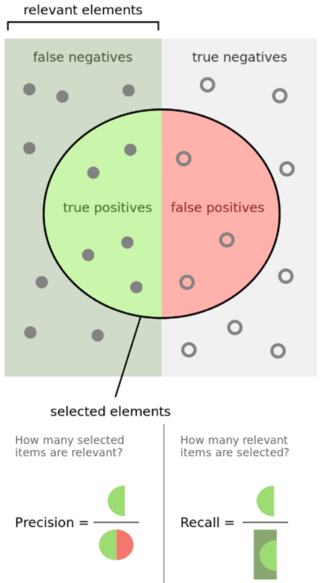

https://towardsdatascience.com/how-to-evaluate-your-machine-learning-models-with-python-code-5f8d2d8d945b